# Autoencoders

Autoencoders are a useful tool as a dimension reduction technique. 
- The input is first `compressed` down to a few neurons (bottleneck) - this is the **encoder** part
- Then the compressed data is `decompressed` to be as close to the original input as possible (based on a loss function) - this is the **decoder** part

Important properties:
- compression is learned automatically by the neural network, no need for hand-crafted compression techniques
- the compression is not lossless, we always lose some information in the process
- compression is learned from the samples, thus will be specific to the training data

In [3]:
#import tensorflow as tf
#tf.config.set_visible_devices([], "GPU")

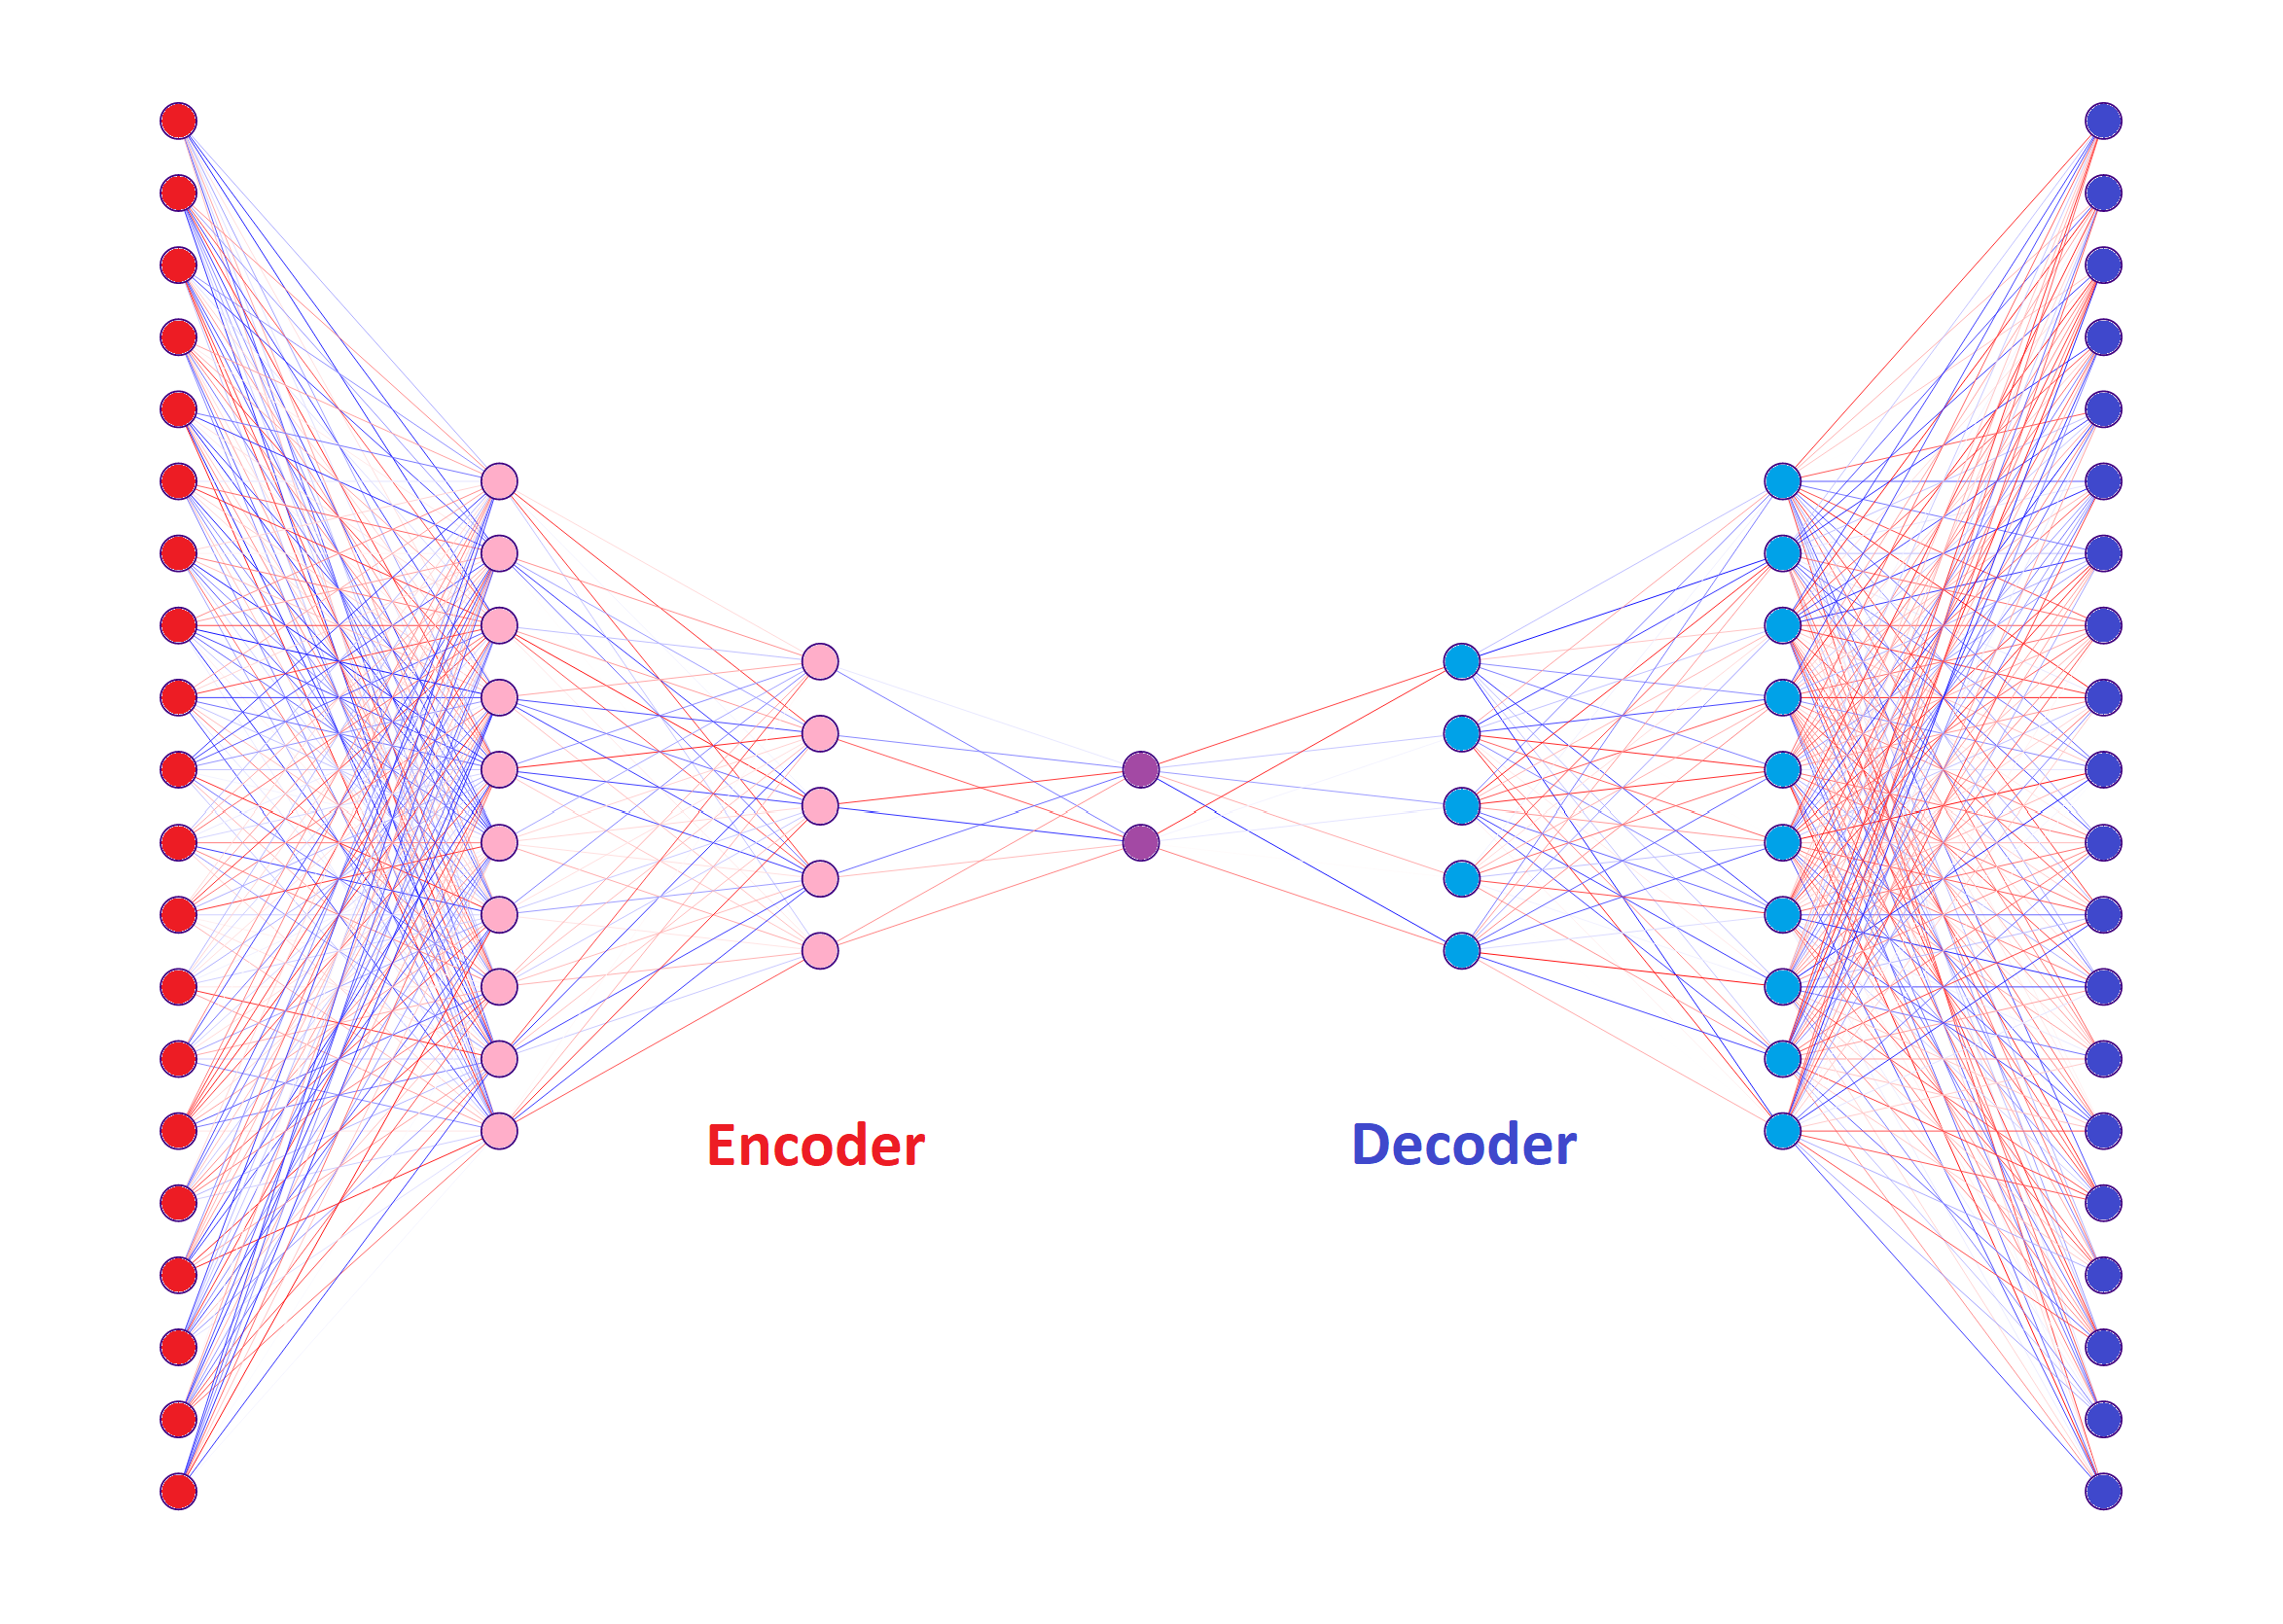

In [4]:
from IPython.display import Image
Image("autoencoder.png")

### Load the MNIST dataset (don't forget to rescale the pixel intensities!)

In [75]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Simplest autoencoder: one single hidden layer with 2 neurons and linear activation on the first layer

In [8]:
from keras.regularizers import L2
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers import Add, Input, Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, GlobalAveragePooling2D, BatchNormalization, Reshape
from keras.models import Sequential, Model
from keras.utils import plot_model

import numpy as np

# Build the model with Functional model building

inp = Input(shape=(784, ))

encoder = Dense(2, activation="linear")(inp)

decoder = Dense(784, activation="sigmoid")(encoder)   # don't use SOFTMAX!

model = Model(inputs=inp, outputs=decoder)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

### Reshape the train and test matrices, then compile and train the model

- in `model.fit()` we need `X_train` twice: as input features and as true *labels* for loss calculation, too
- we can use `(X_test, X_test)` for validation data

In [10]:
0.055**0.5

0.2345207879911715

In [9]:
model.compile(loss="mean_squared_error",
              optimizer=Adam())   
# don't use categorical_crossentropy, another good choice would have been "binary_crossentropy"

train = model.fit(X_train, X_train,
          epochs=30,
          batch_size=32,
          verbose=1,
          validation_data=(X_test, X_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - loss: 0.0885 - val_loss: 0.0603
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - loss: 0.0595 - val_loss: 0.0582
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - loss: 0.0579 - val_loss: 0.0572
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - loss: 0.0571 - val_loss: 0.0567
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - loss: 0.0567 - val_loss: 0.0564
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - loss: 0.0564 - val_loss: 0.0562
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - loss: 0.0562 - val_loss: 0.0560
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - loss: 0.0561 - val_loss: 0.0558
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 0.0560 - val_loss: 0.0557
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 0.0559 - val_loss: 0.0556
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 0.0557 - val_loss: 0.0555
Epoch 12

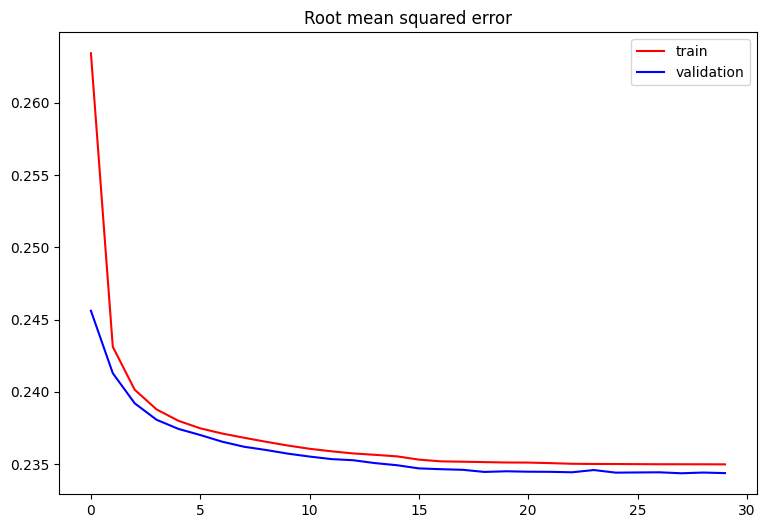

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_train(train):
    plt.figure(figsize=(9, 6))
    plt.plot(np.array(train.history['loss'])**0.5, 'r-', label='train')
    plt.plot(np.array(train.history['val_loss'])**0.5, 'b-', label='validation')
    plt.title("Root mean squared error")
    plt.legend()
    plt.show()

plot_train(train)

### Let's plot a few test samples and their representations by the autoencoder

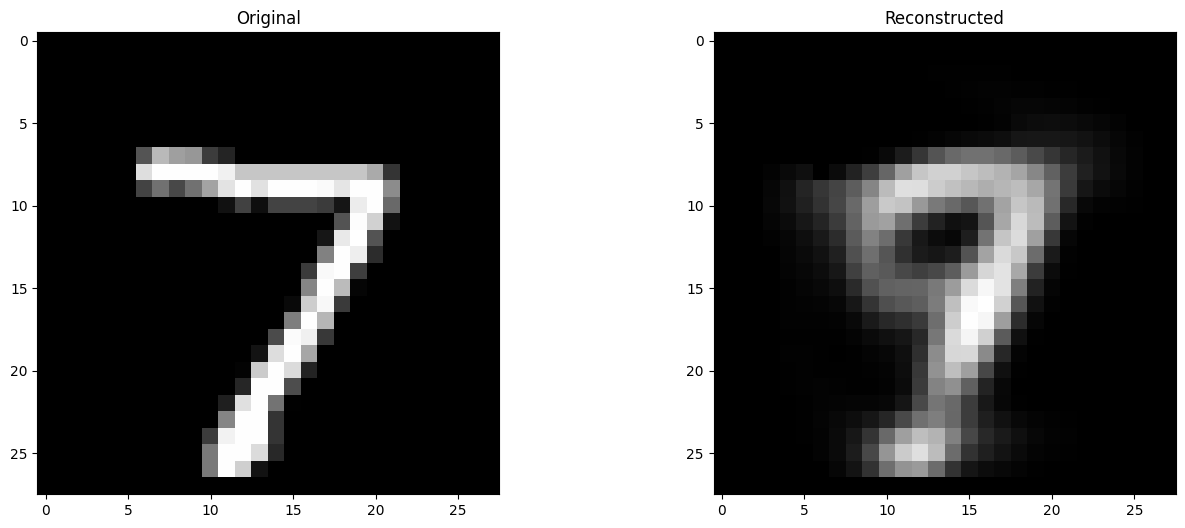

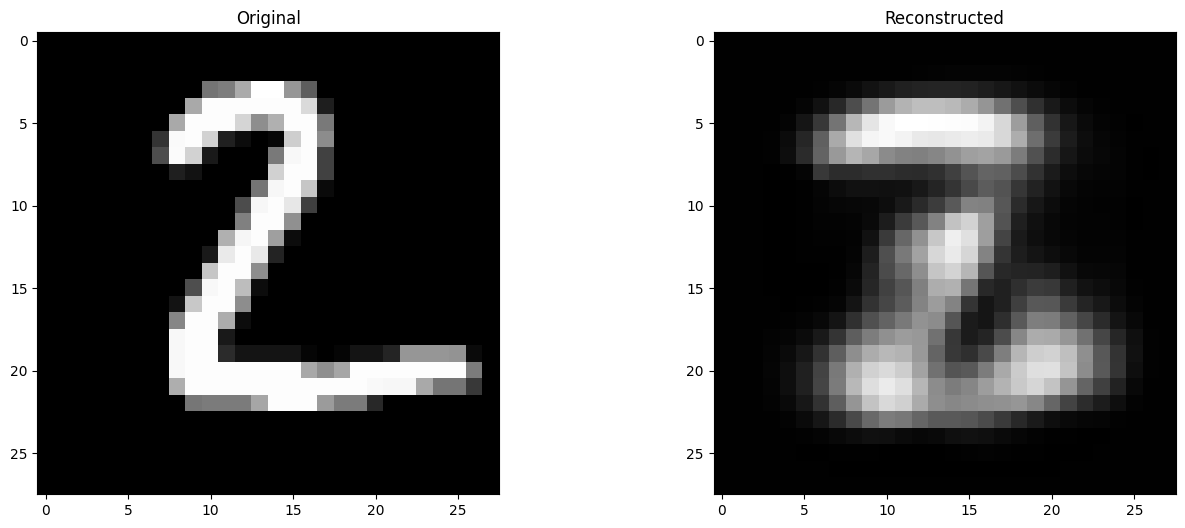

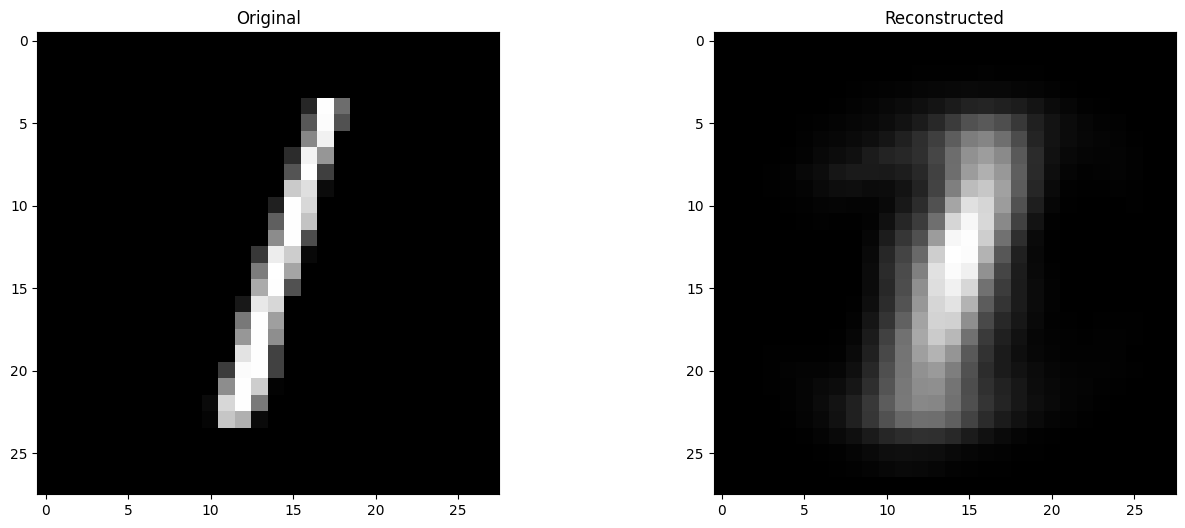

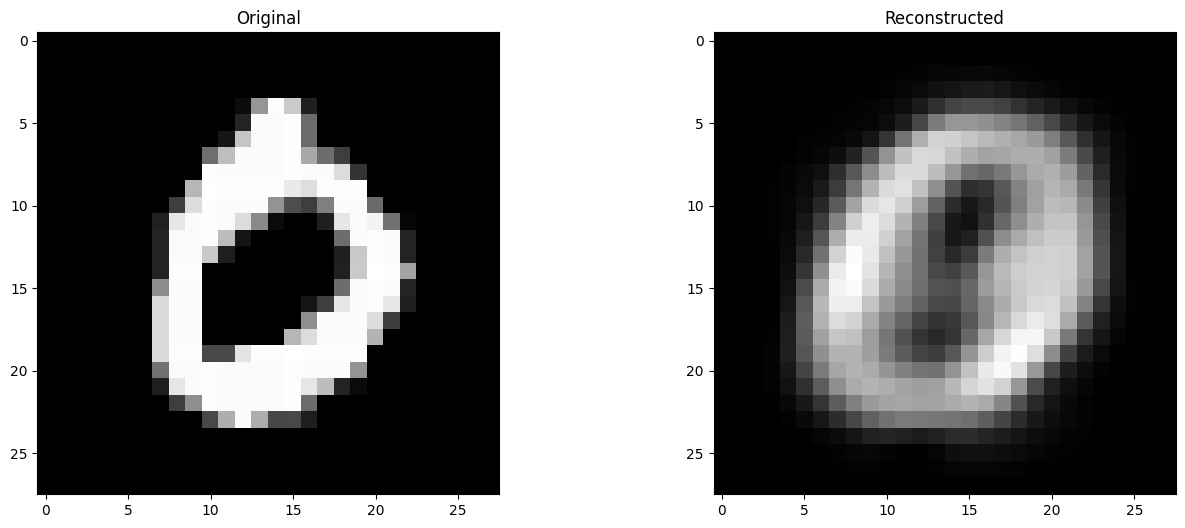

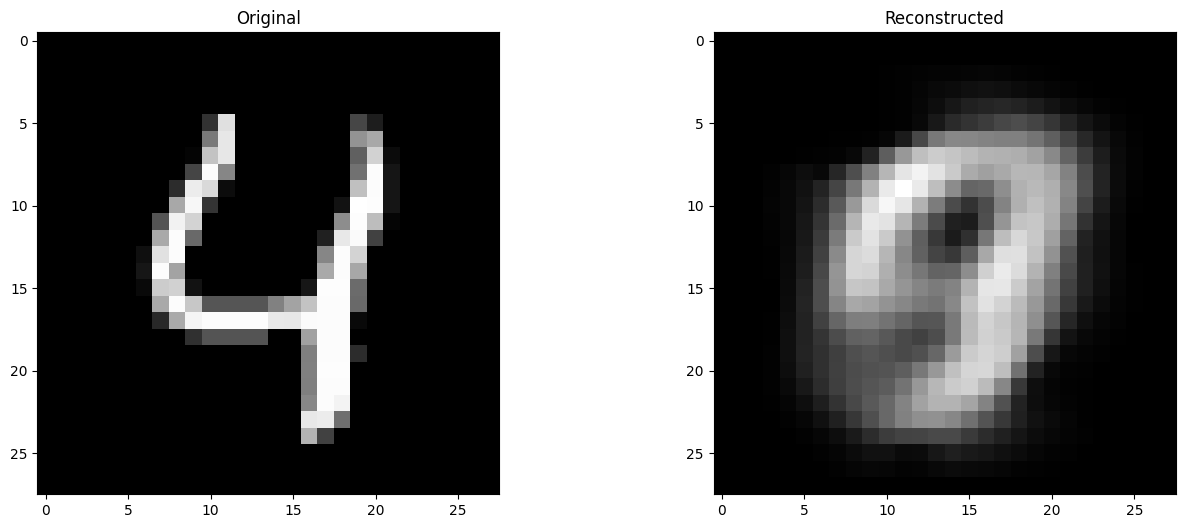

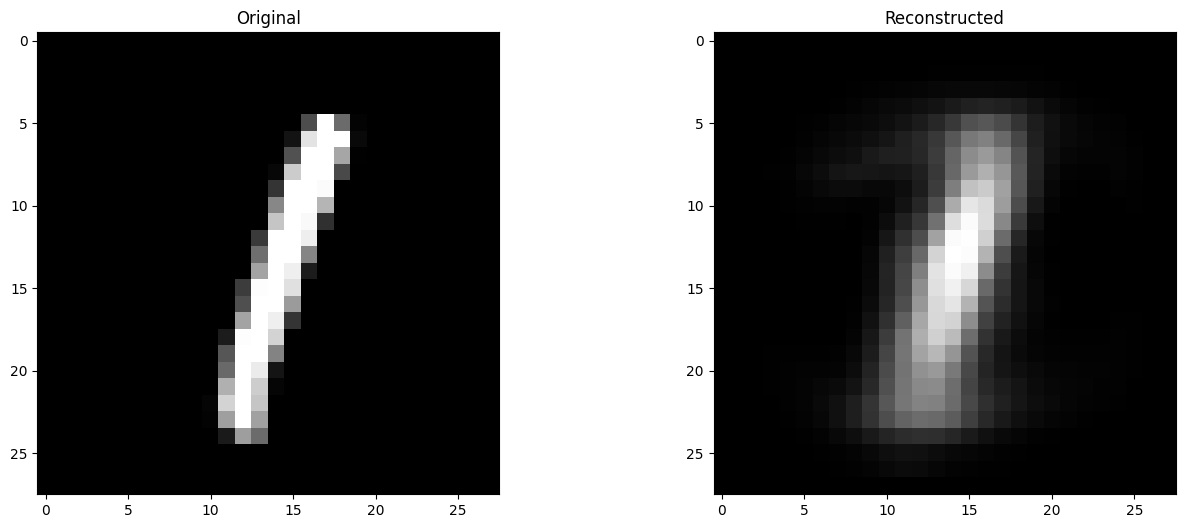

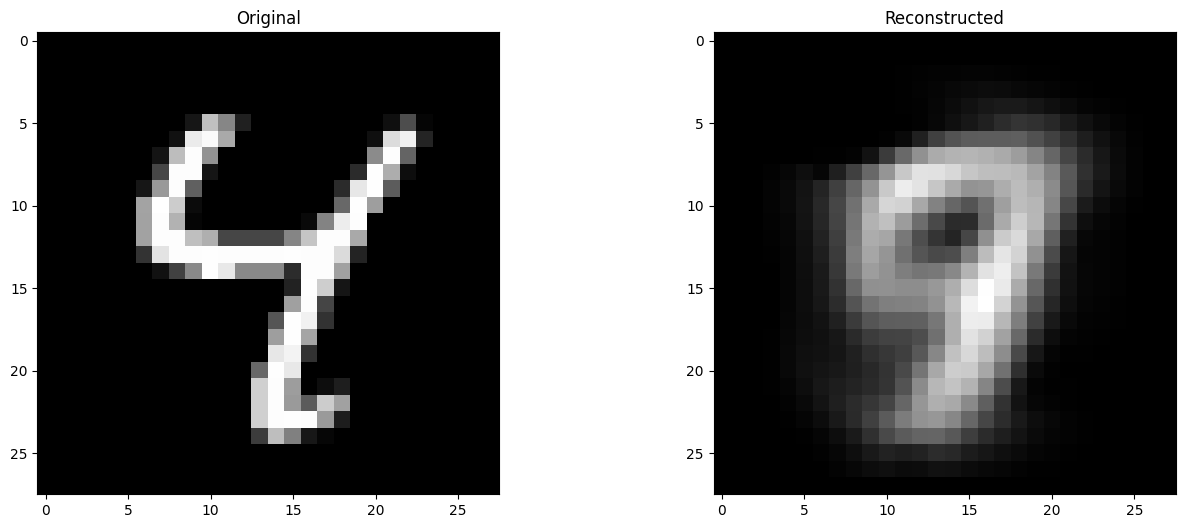

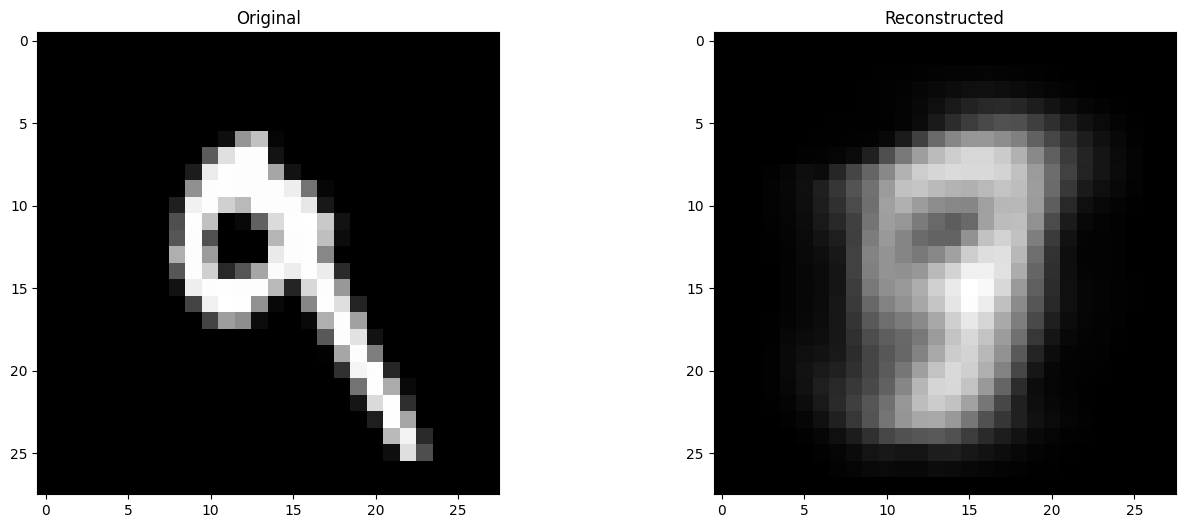

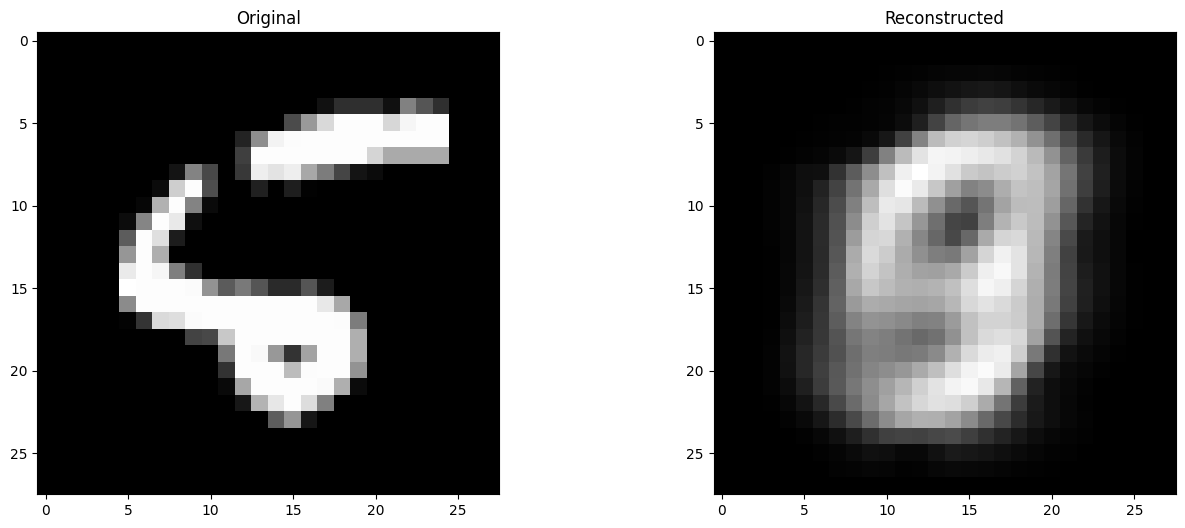

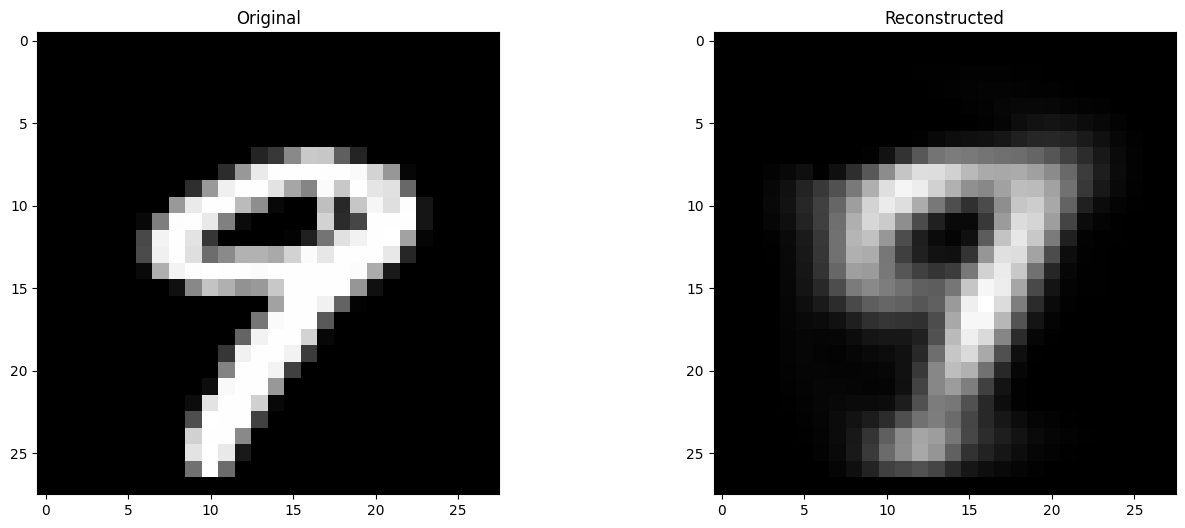

In [28]:
import matplotlib.pyplot as plt

for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 784), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


## Visualization with autoencoders

Since we reduced the number of features to $2$, we can use this as a visualization tool, similarly to t-SNE. However, in general t-SNE is more effective in such visualizations.

In [29]:
encoder_model = Model(inputs=inp, outputs=encoder)
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,570 (6.13 KB)

 Trainable params: 1,570 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
X_test_embedded = encoder_model.predict(X_test)

X_test_embedded


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step


array([[-9.699953  ,  7.0246954 ],
       [-0.24602032, -2.0697458 ],
       [-6.666047  , -5.270087  ],
       ...,
       [-6.5780993 ,  6.267766  ],
       [-4.481531  ,  2.978798  ],
       [ 1.6271992 ,  9.4660845 ]], dtype=float32)

<Axes: >

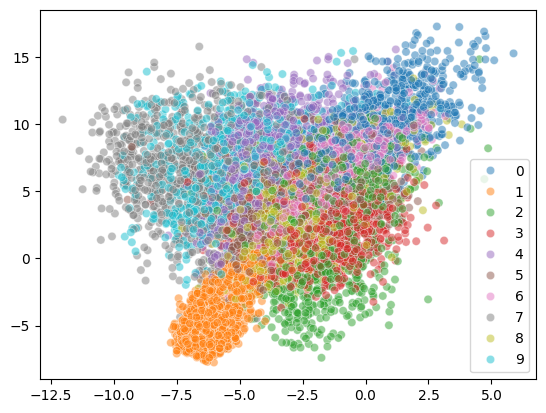

In [38]:
import seaborn as sns

sns.scatterplot(x=X_test_embedded[:, 0],
                y=X_test_embedded[:, 1],
                hue=y_test,
                palette="tab10",
                alpha=0.5)

## Let's do a t-SNE visualization just for comparison

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_test_embedded = tsne.fit_transform(X_test)
X_test_embedded.shape

(10000, 2)

<Axes: >

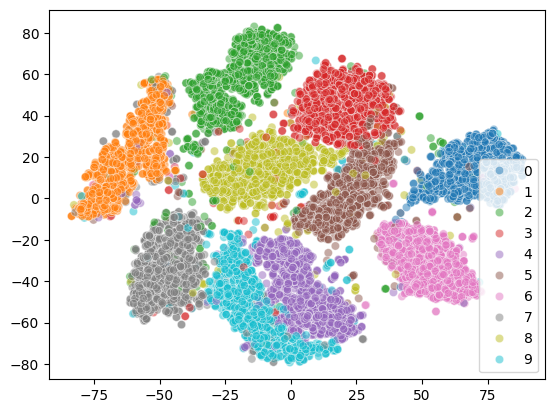

In [40]:
sns.scatterplot(x=X_test_embedded[:, 0],
                y=X_test_embedded[:, 1],
                hue=y_test,
                palette="tab10",
                alpha=0.5)

## Let's do this with more hidden neurons

In [41]:
from keras.callbacks import EarlyStopping

def create_autoencoder(n_hidden, epochs=100, batch_size=512, activation="relu"):  

    inp = Input(shape=(784, ))
    
    encoder = Dense(n_hidden, activation=activation)(inp)
    
    decoder = Dense(784, activation="sigmoid")(encoder)   # don't use SOFTMAX!
    
    model = Model(inputs=inp, outputs=decoder)
    model.summary()

    model.compile(loss="mean_squared_error",
              optimizer=Adam())   
    # don't use categorical_crossentropy, another good choice would have been "binary_crossentropy"

    early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")
    
    train = model.fit(X_train, X_train,
              epochs=epochs,
              batch_size=batch_size,
              verbose=1,
              callbacks=[early_stop],
              validation_split=0.1)
       
    return model, train

In [42]:
model, train = create_autoencoder(n_hidden=10, epochs=100, batch_size=32, activation="relu")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │         8,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,474 (64.35 KB)

 Trainable params: 16,474 (64.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0704 - val_loss: 0.0345
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - loss: 0.0342 - val_loss: 0.0326
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - loss: 0.0325 - val_loss: 0.0315
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - loss: 0.0314 - val_loss: 0.0308
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - loss: 0.0310 - val_loss: 0.0306
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - loss: 0.0306 - val_loss: 0.0302
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - loss: 0.0304 - val_loss: 0.0302
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - loss: 0.0303 - val_loss: 0.0300
Epoch 9/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - loss: 0.0302 - val_loss: 0.0300
Epoch 10/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - loss: 0.0301 - val_loss: 0.0299
Epoch 11/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - loss: 0.0301 - val_loss: 0.02

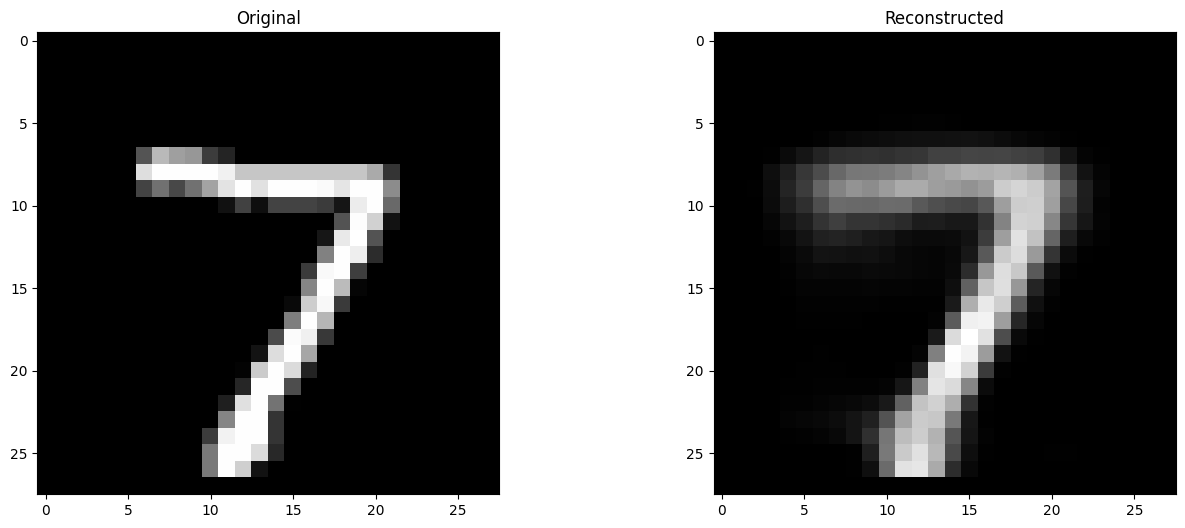

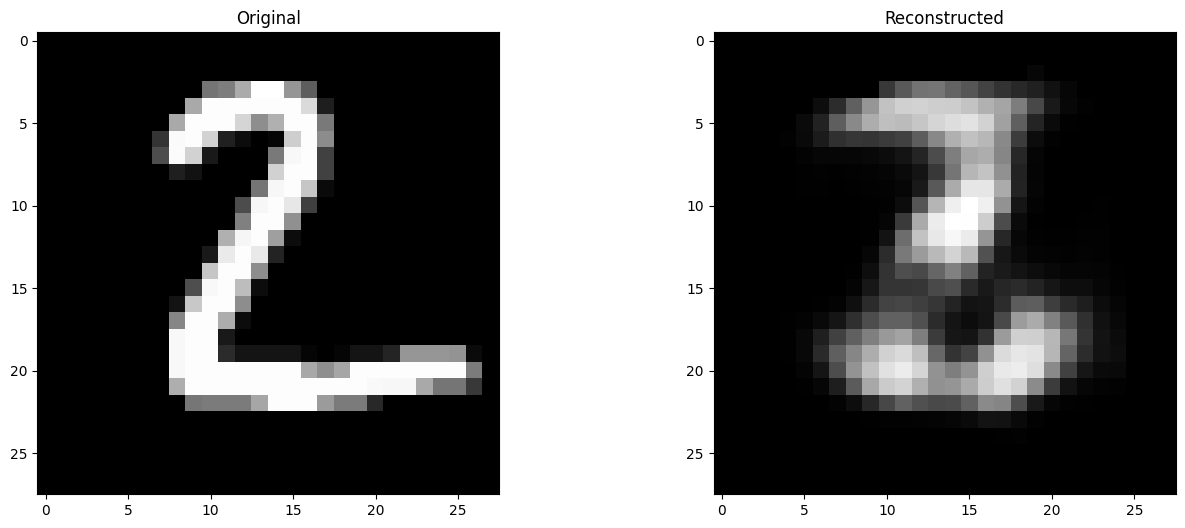

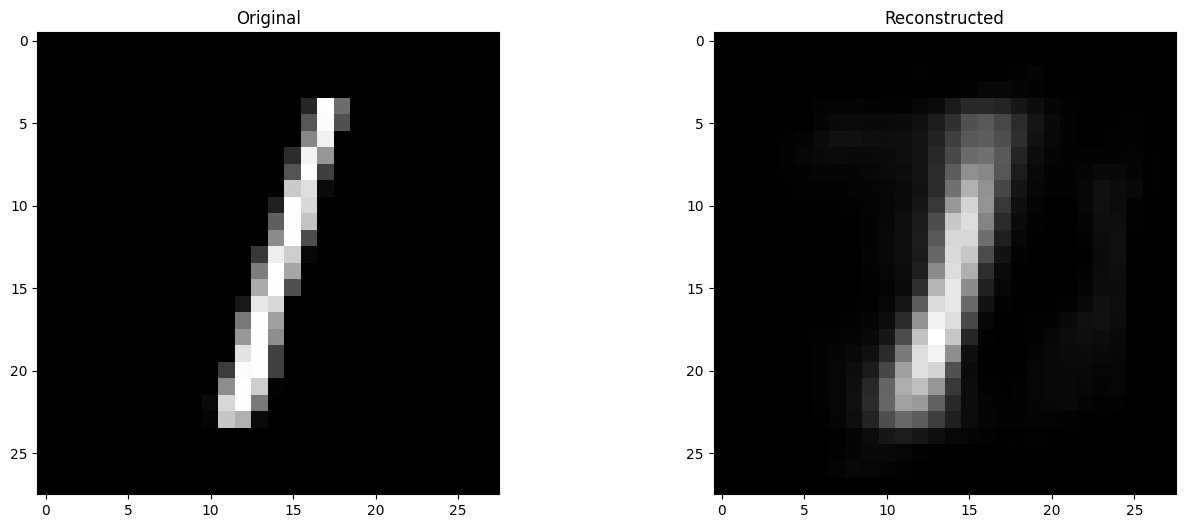

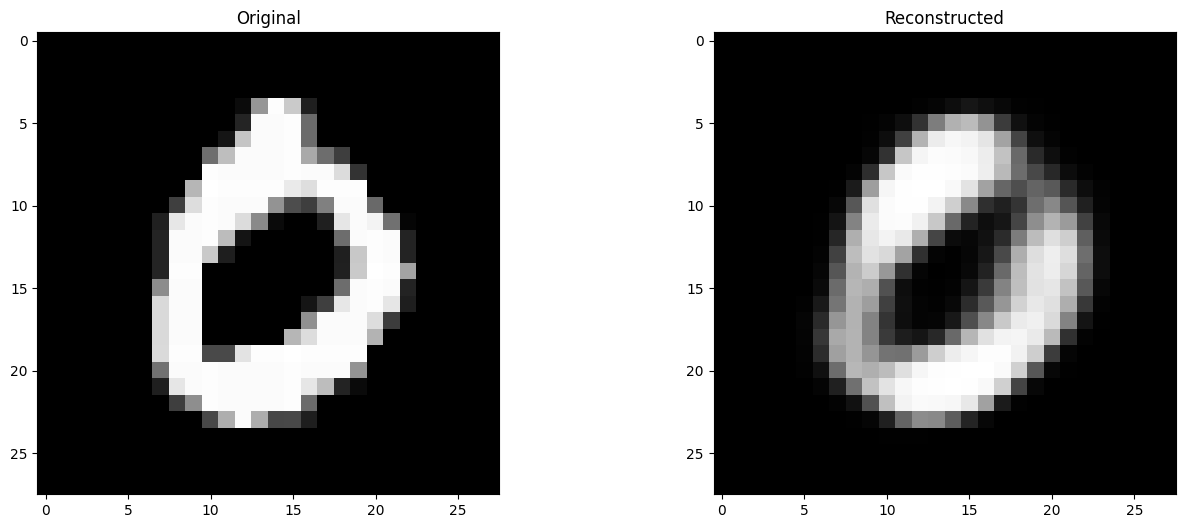

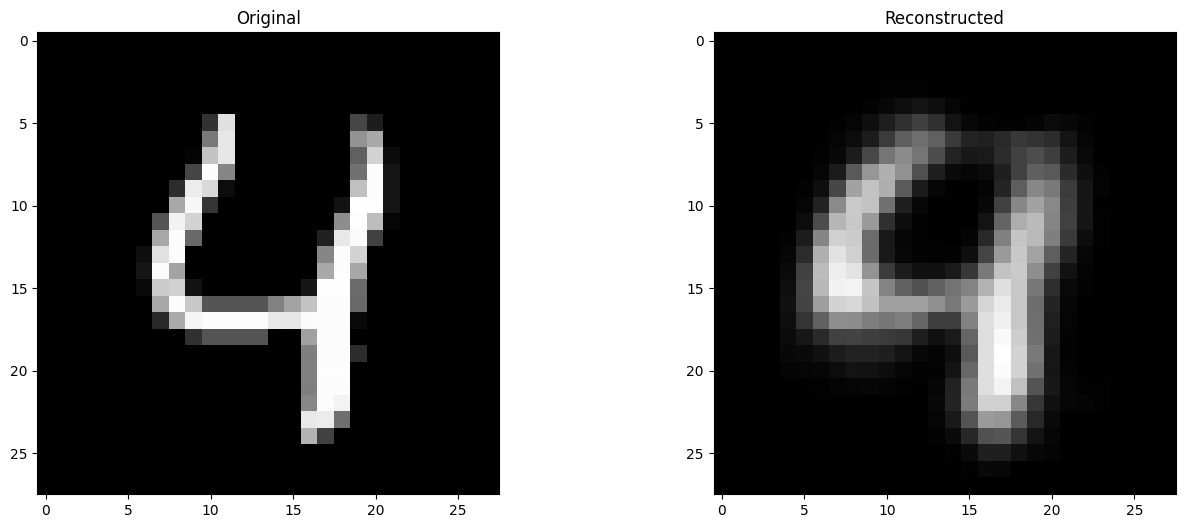

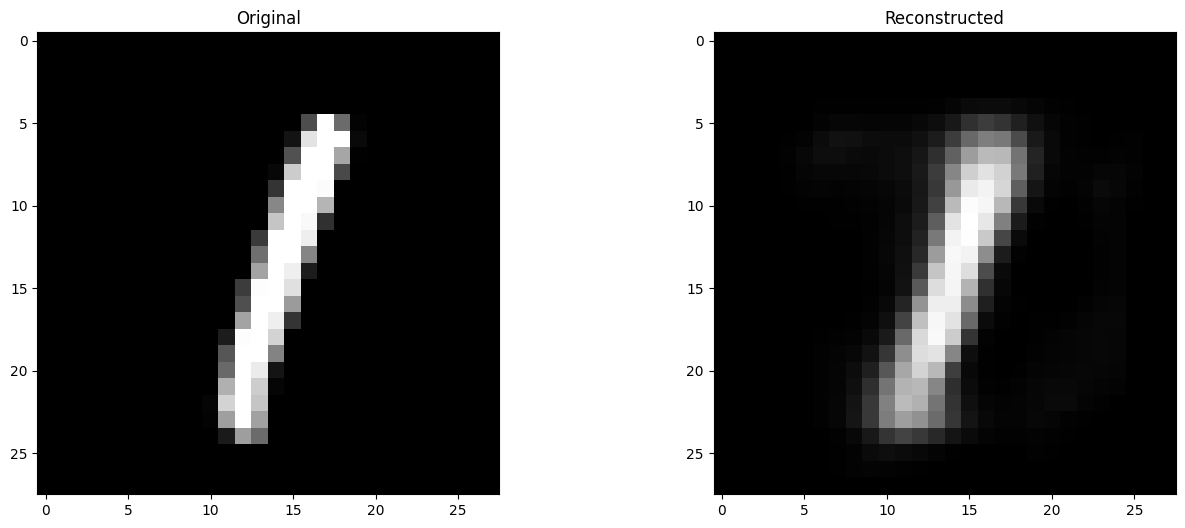

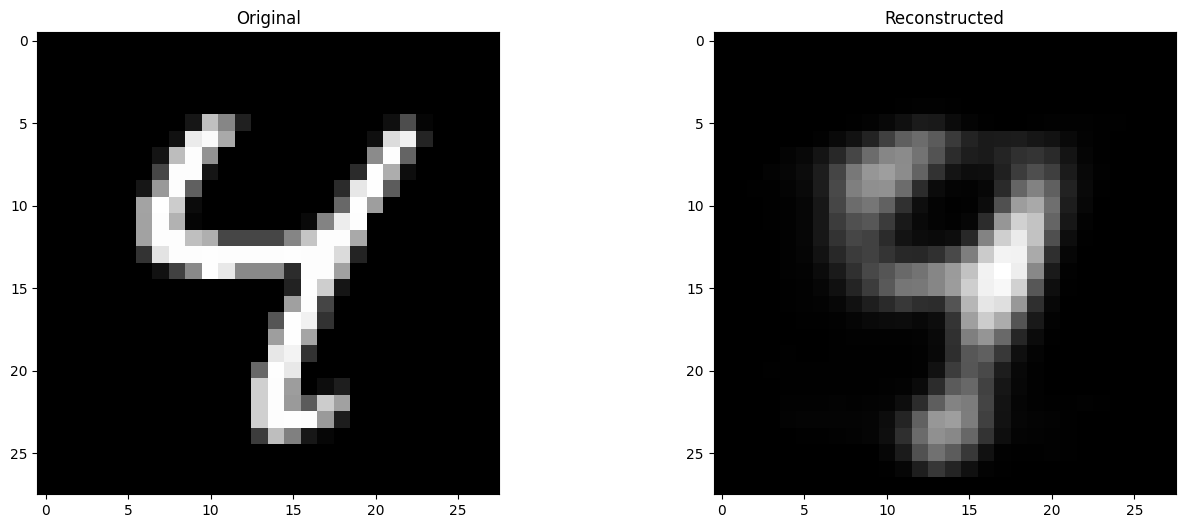

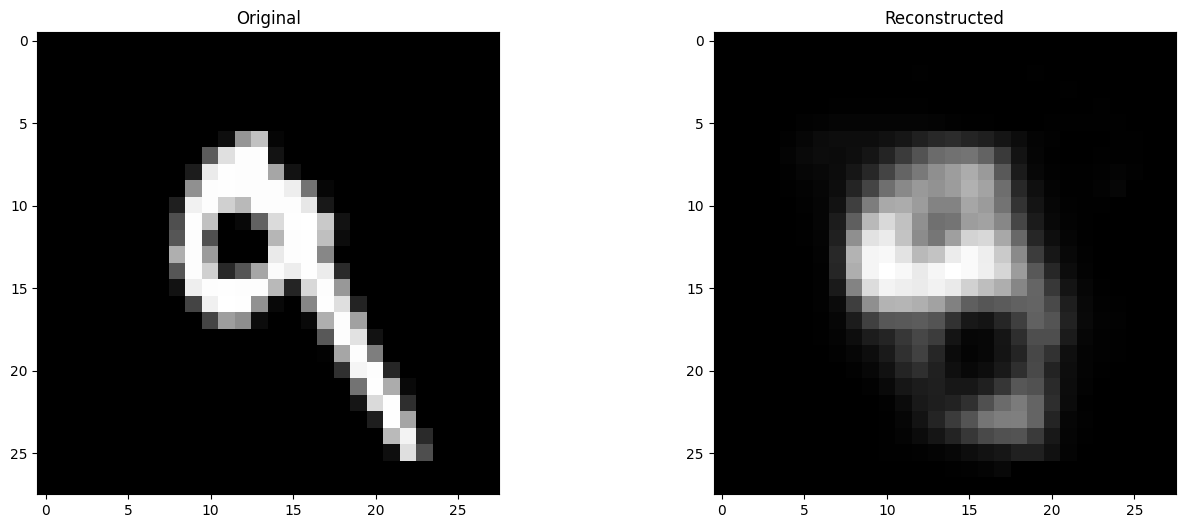

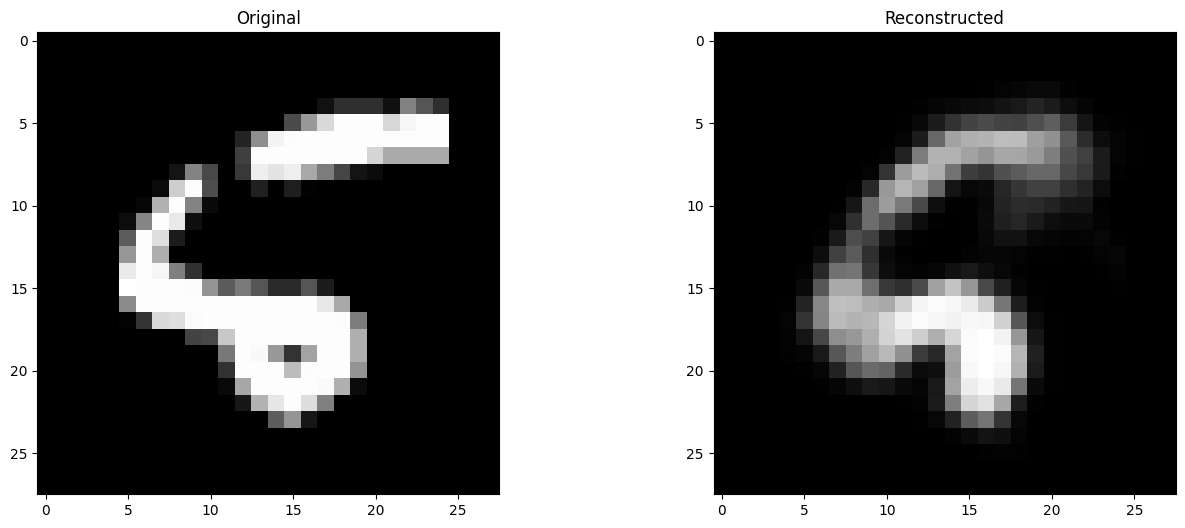

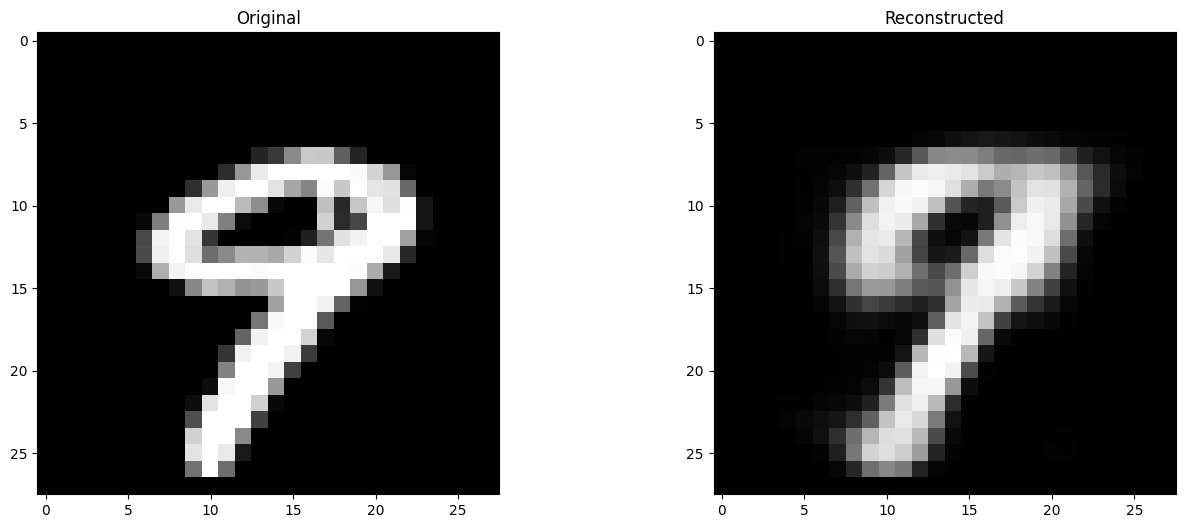

In [43]:
for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 784), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


## Number of hidden neurons = 5

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │         4,704 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,629 (33.71 KB)

 Trainable params: 8,629 (33.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - loss: 0.0810 - val_loss: 0.0474
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - loss: 0.0465 - val_loss: 0.0442
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - loss: 0.0444 - val_loss: 0.0433
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 0.0435 - val_loss: 0.0428
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - loss: 0.0431 - val_loss: 0.0426
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - loss: 0.0429 - val_loss: 0.0424
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - loss: 0.0427 - val_loss: 0.0424
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - loss: 0.0426 - val_loss: 0.0423
Epoch 9/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - loss: 0.0425 - val_loss: 0.0423
Epoch 10/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - loss: 0.0425 - val_loss: 0.0423
Epoch 11/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - loss: 0.0424 - val_loss: 0.04

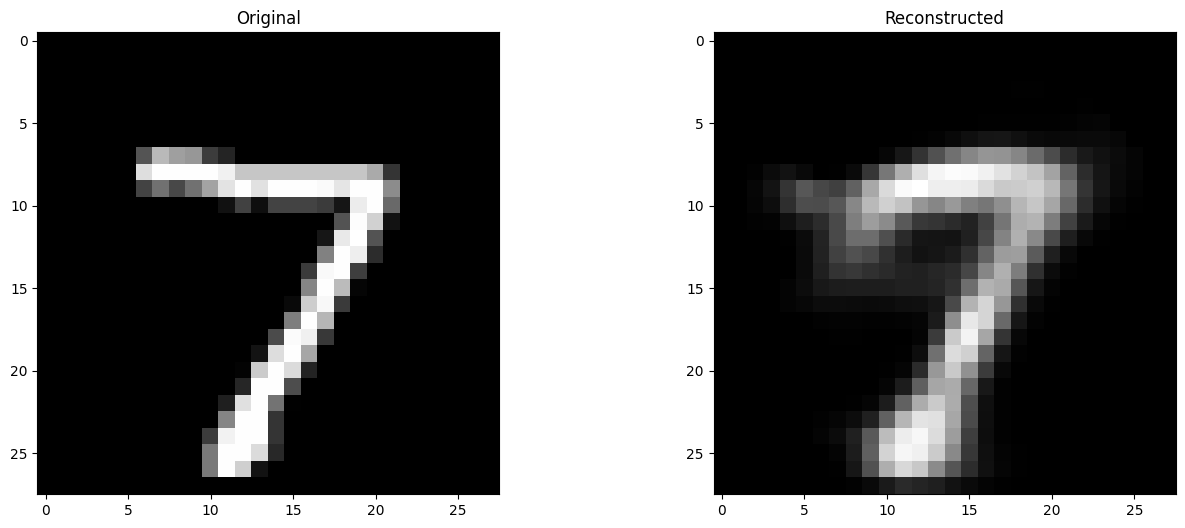

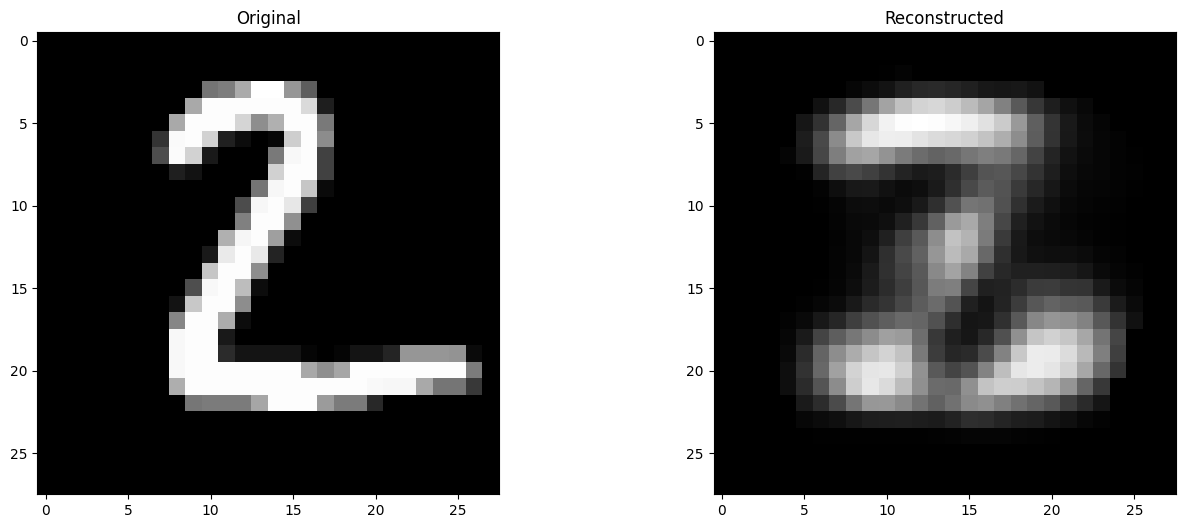

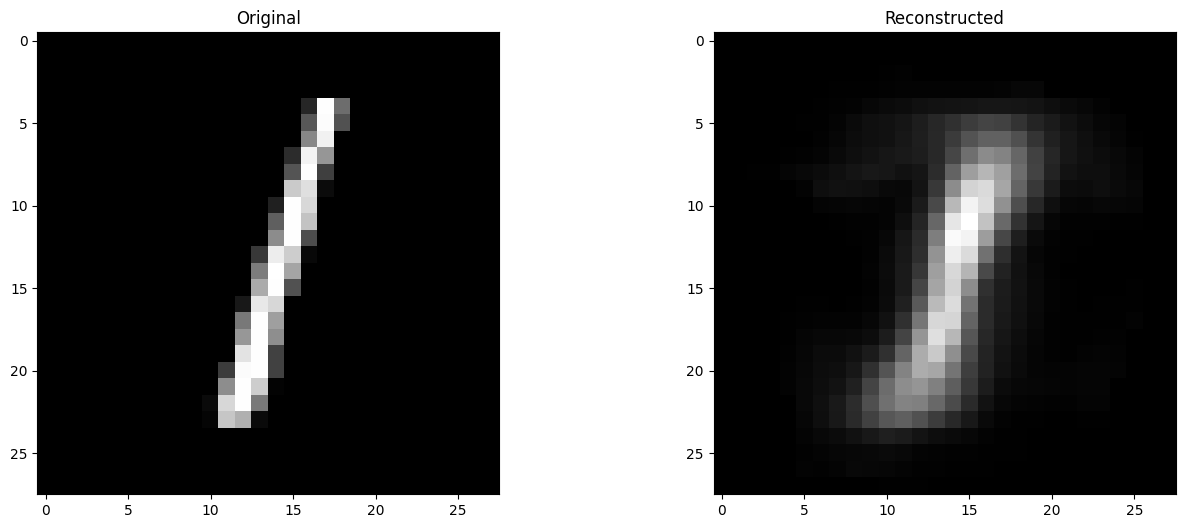

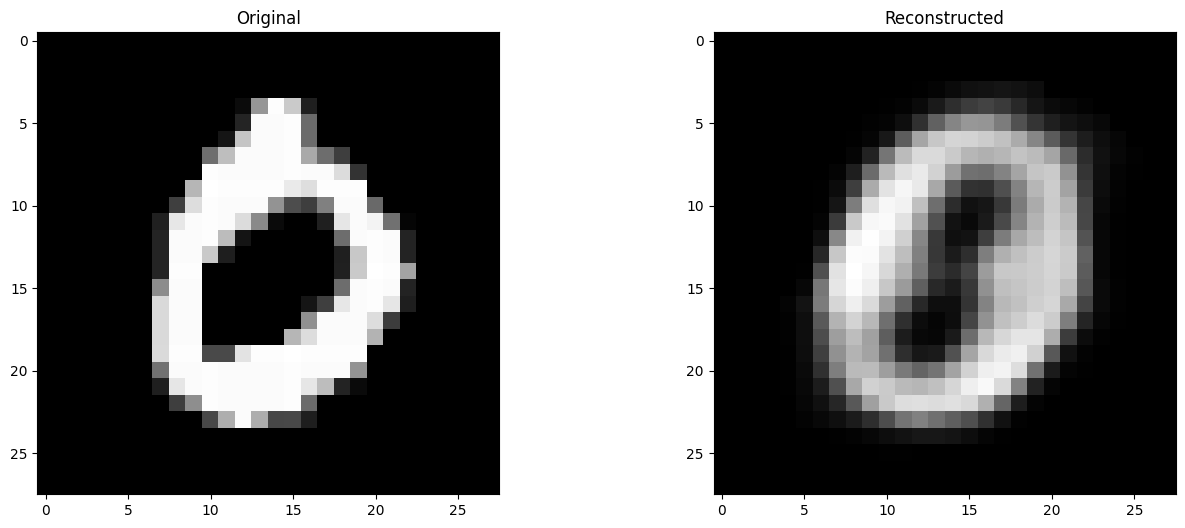

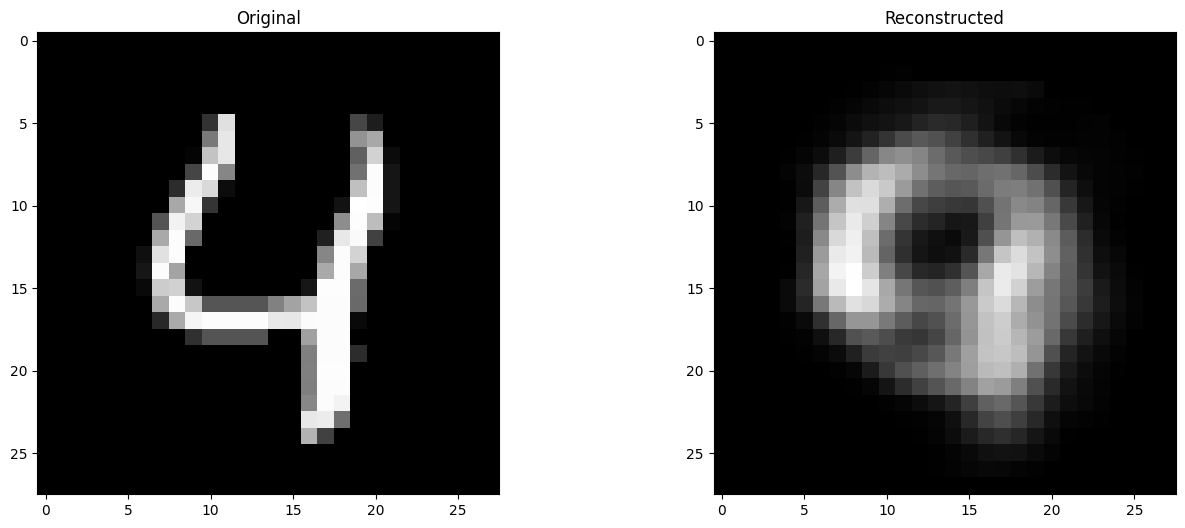

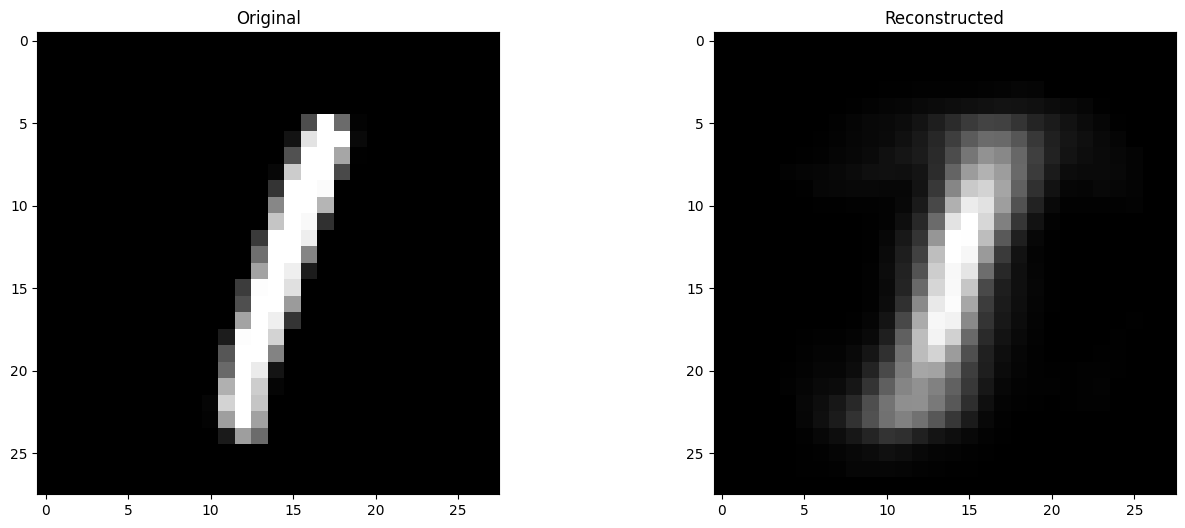

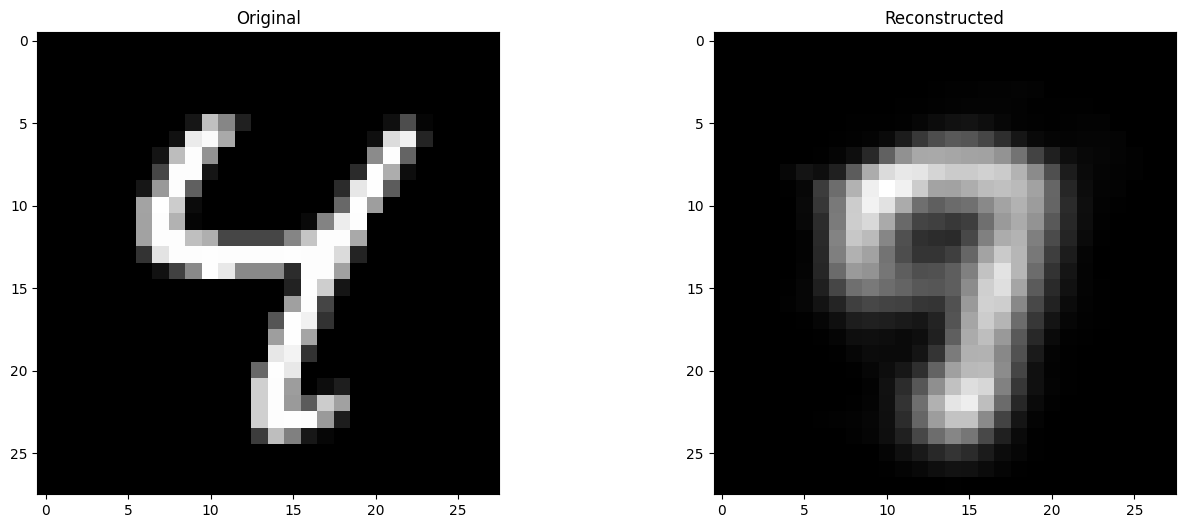

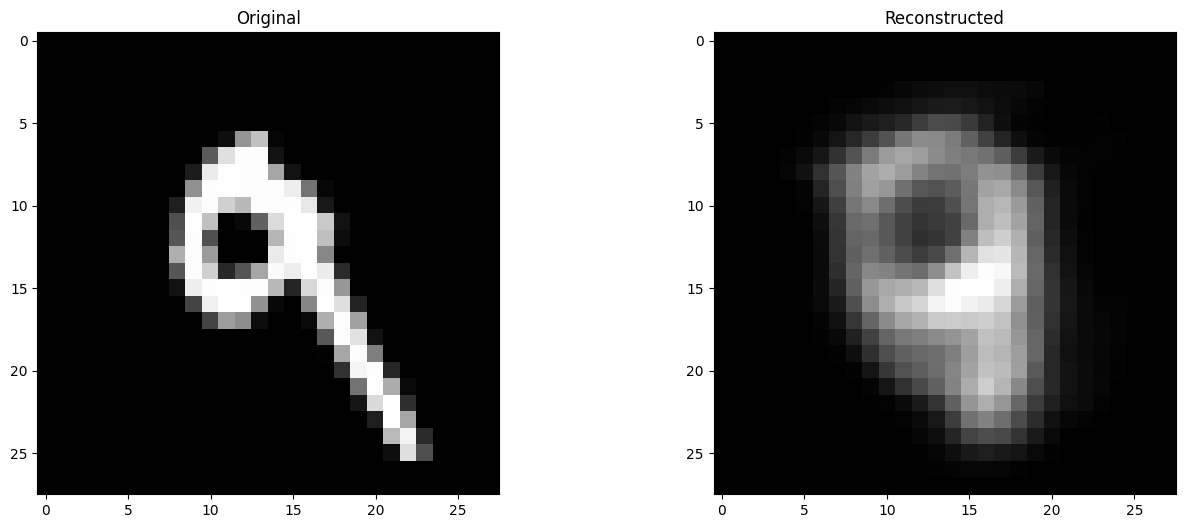

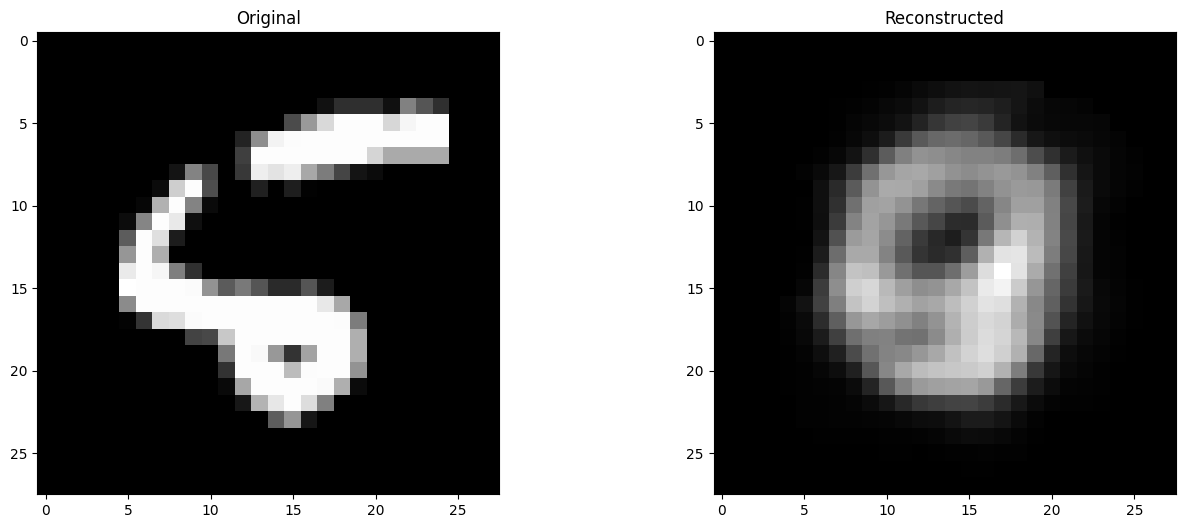

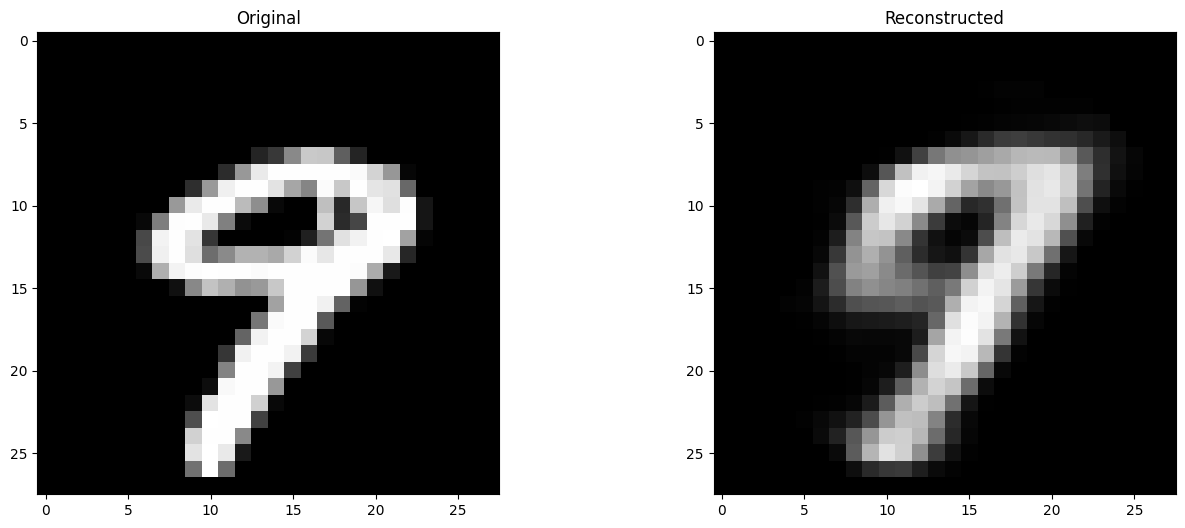

In [44]:
model, train = create_autoencoder(n_hidden=5, epochs=100, batch_size=32, activation="relu")

for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 784), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


With one single layer and linear activations  we usually end up with good approximations to the PCA (principal component analysis) embeddings.

## Autoencoders with Convolutional neural networks

- we use Conv2D and MaxPooling2D layers in the encoder part to reduce the size to (4, 4, 8)
- the bottleneck consists of $4\times4\times8 = 128$ neurons
- the decoder layers needs Conv2D and UpSampling2D layers (upsampling = repeating rows/columns to increase the dimension)

In [74]:
from keras.layers import UpSampling2D

inp = Input(shape=(28, 28, 1))

conv1 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(inp)
pool1 = MaxPooling2D(2)(conv1)

conv2 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(pool1)
pool2 = MaxPooling2D(2)(conv2)

conv3 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(pool2)
up1 = UpSampling2D(2)(conv3)

conv4 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(up1)
up2 = UpSampling2D(2)(conv4)

conv5 = Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(up2)

model = Model(inputs=inp, outputs=conv5)
model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 14, 14, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 1)      │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,905 (7.44 KB)

 Trainable params: 1,905 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

## Let's reload the data, because we need the original tensors 

In [79]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model.compile(loss="mean_squared_error",
          optimizer=Adam())   
# don't use categorical_crossentropy, another good choice would have been "binary_crossentropy"

early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")

train = model.fit(X_train, X_train,
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks=[early_stop],
          validation_split=0.1)
       

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7220.3760 - val_loss: 7180.2700
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7235.2388 - val_loss: 7180.2598
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7212.6484 - val_loss: 7180.2534
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7223.3521 - val_loss: 7180.2451
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7211.6426 - val_loss: 7180.2441
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7209.0469 - val_loss: 7180.2422
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7208.7236 - val_loss: 7180.2354
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7230.2012 - val_loss: 7180.2446
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7212.3408 - val_loss: 7180.2407
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7211.9336 - val_loss: 7180.2334


### Plot the original and reconstructed images

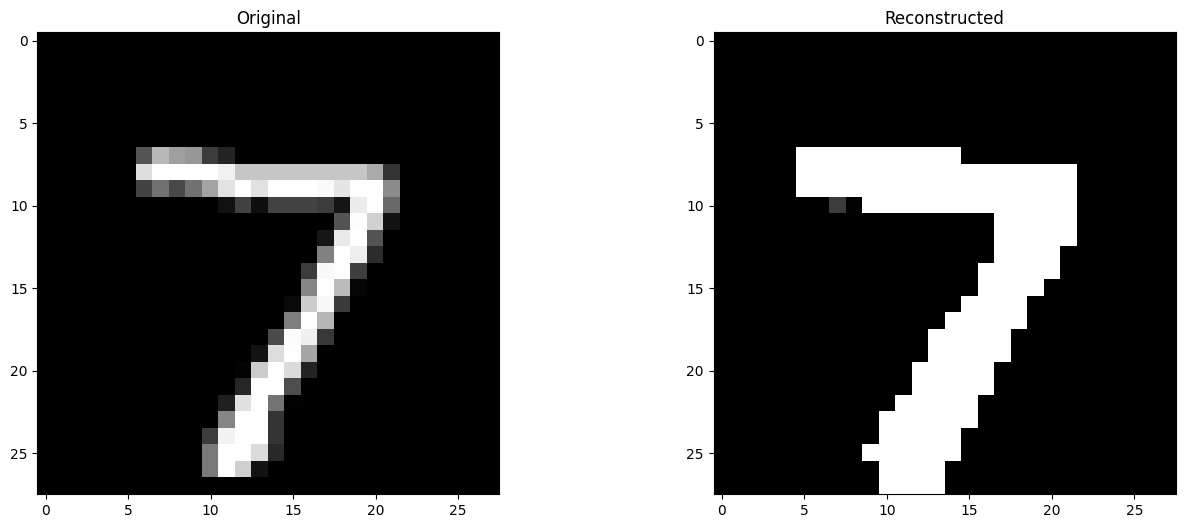

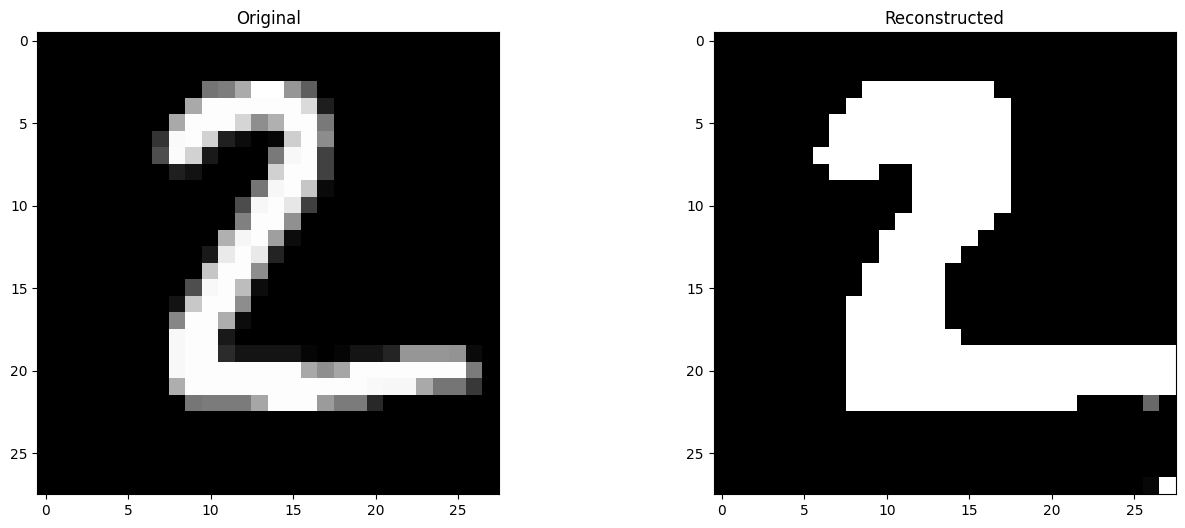

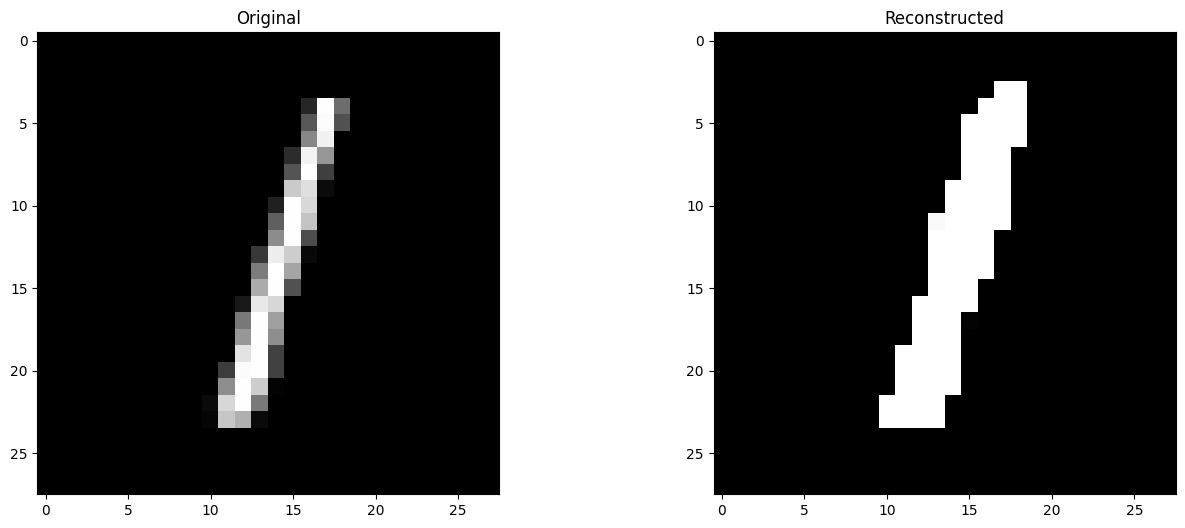

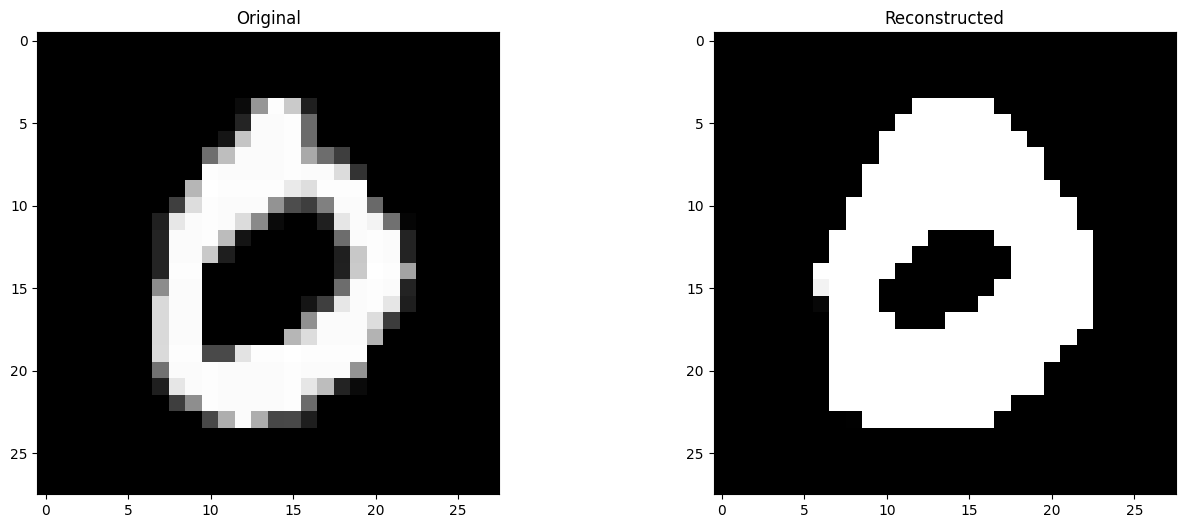

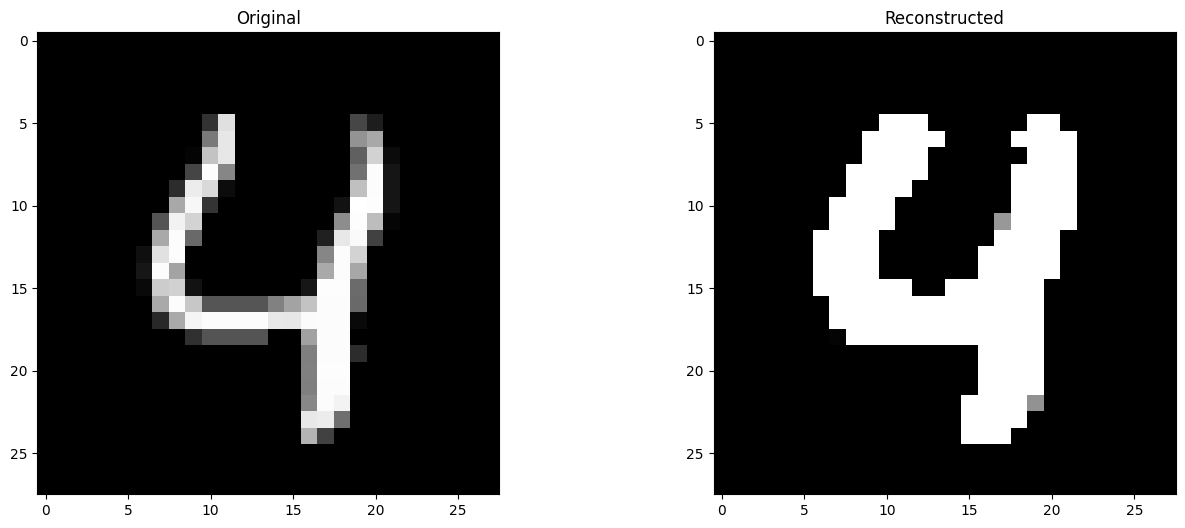

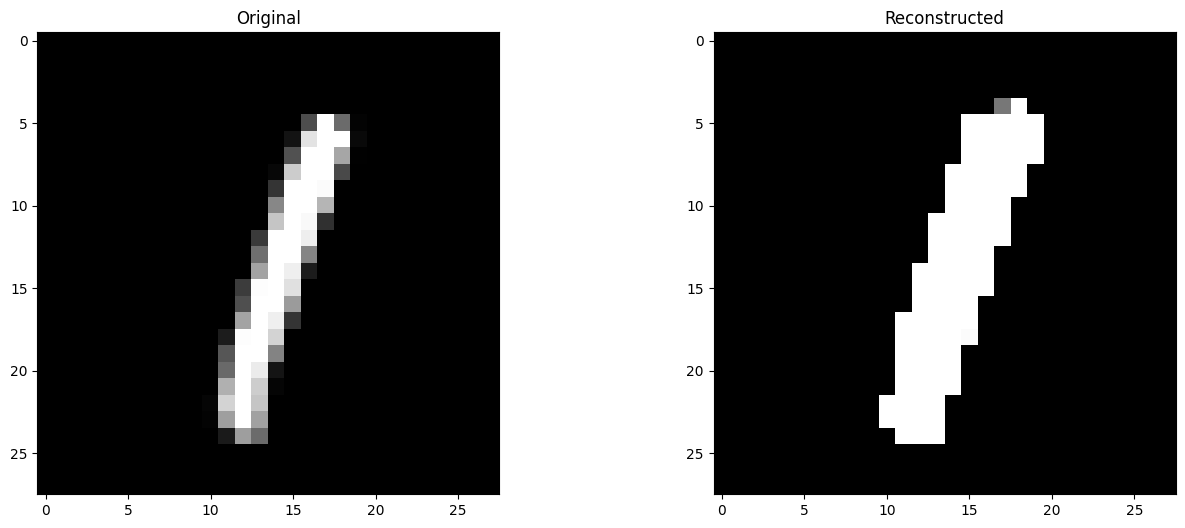

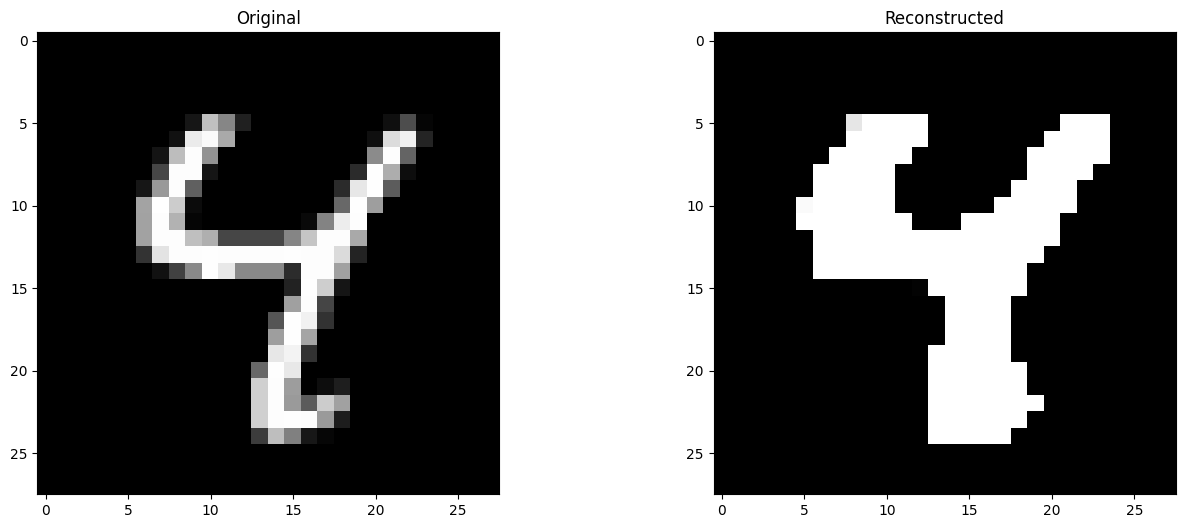

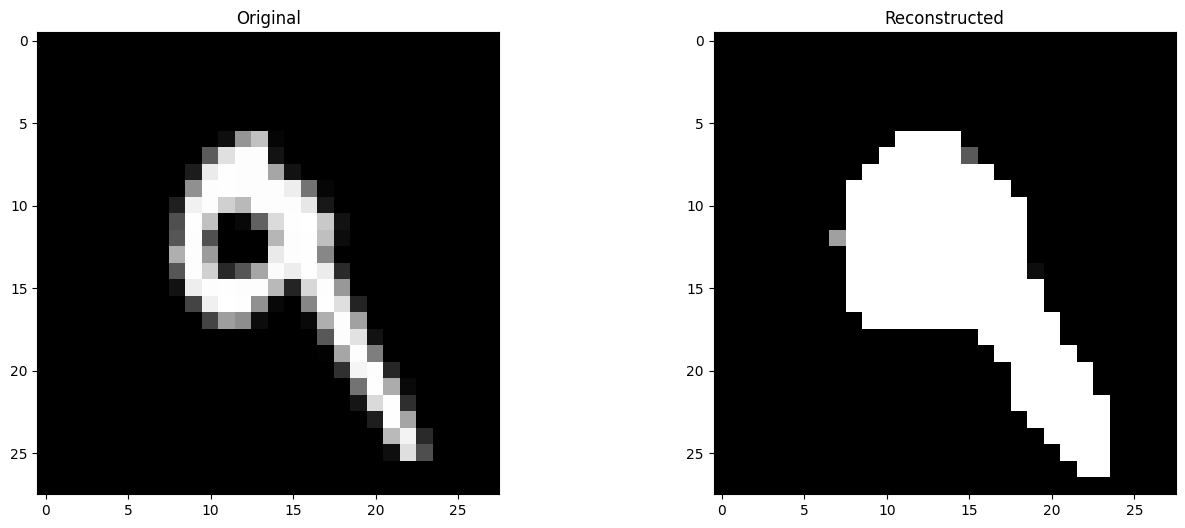

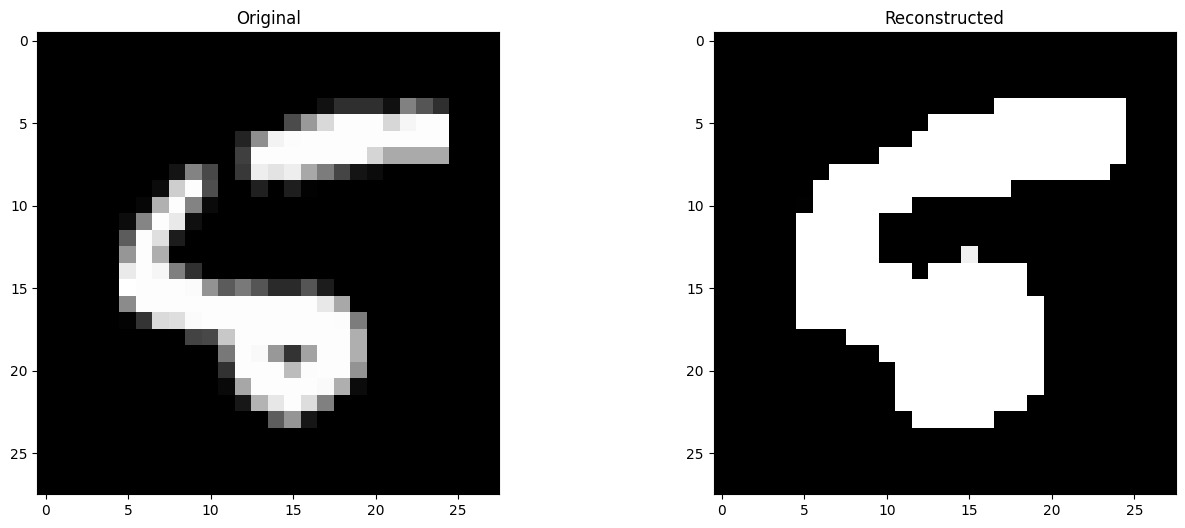

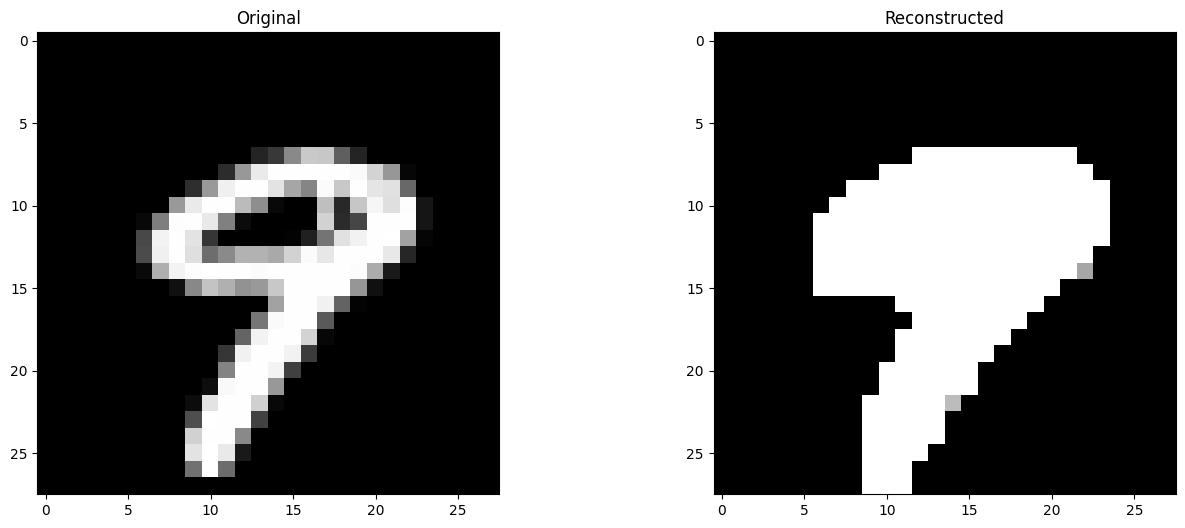

In [80]:
for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1119 - val_loss: 0.1114
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1122 - val_loss: 0.1114
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1122 - val_loss: 0.1114
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1121 - val_loss: 0.1114
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1120 - val_loss: 0.1114


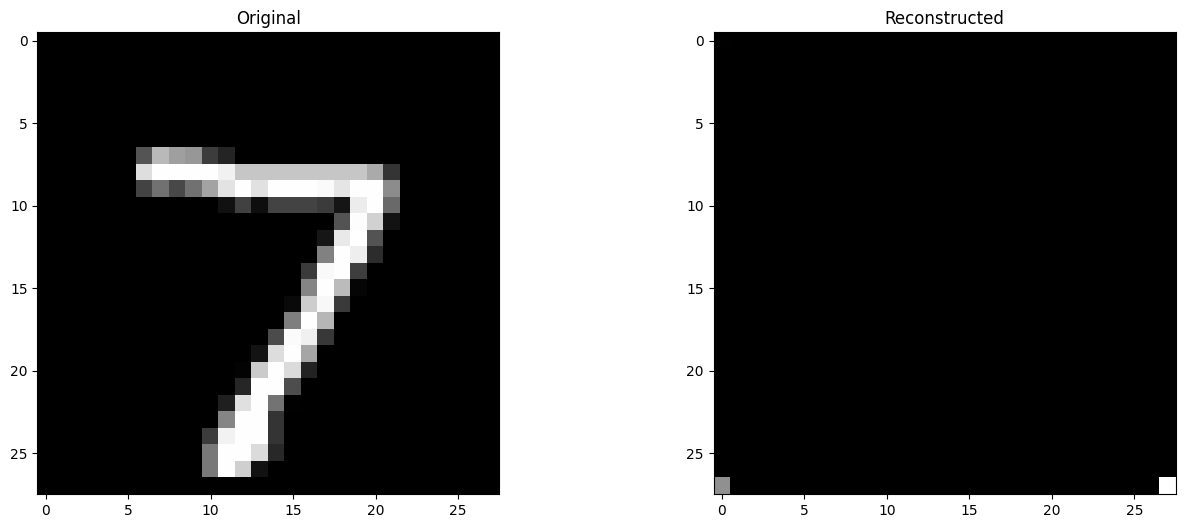

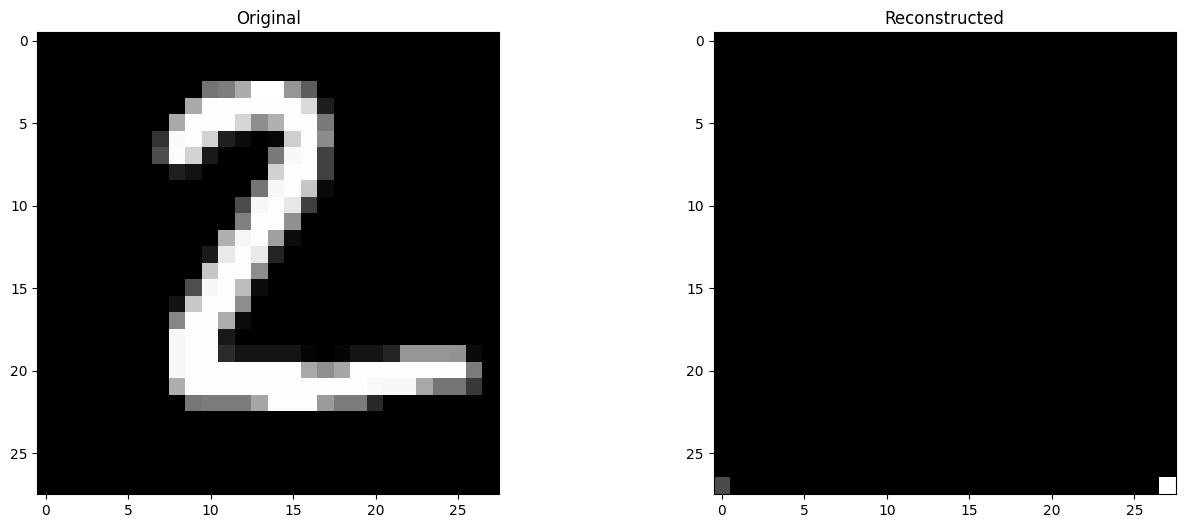

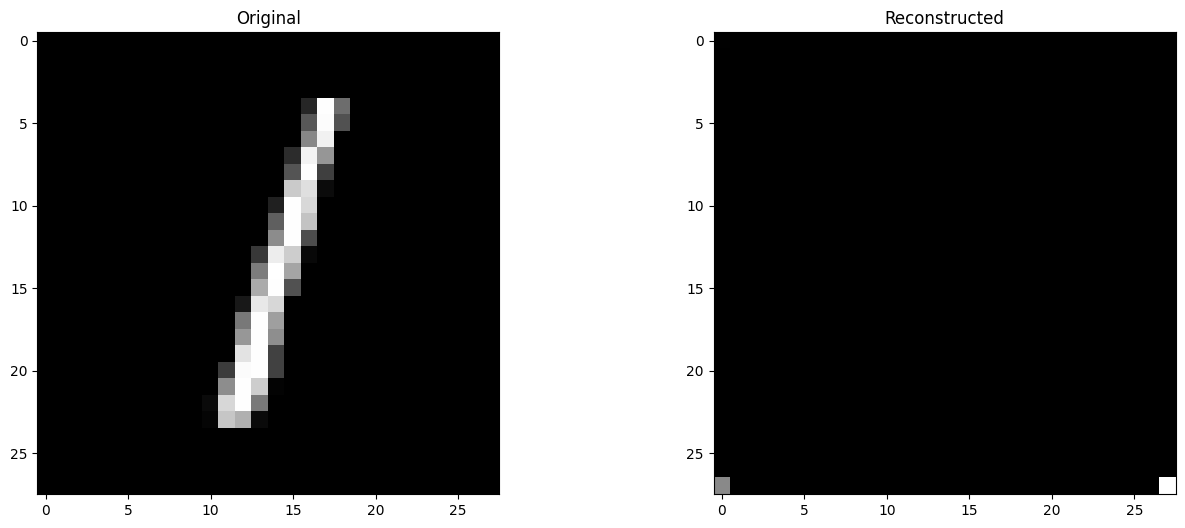

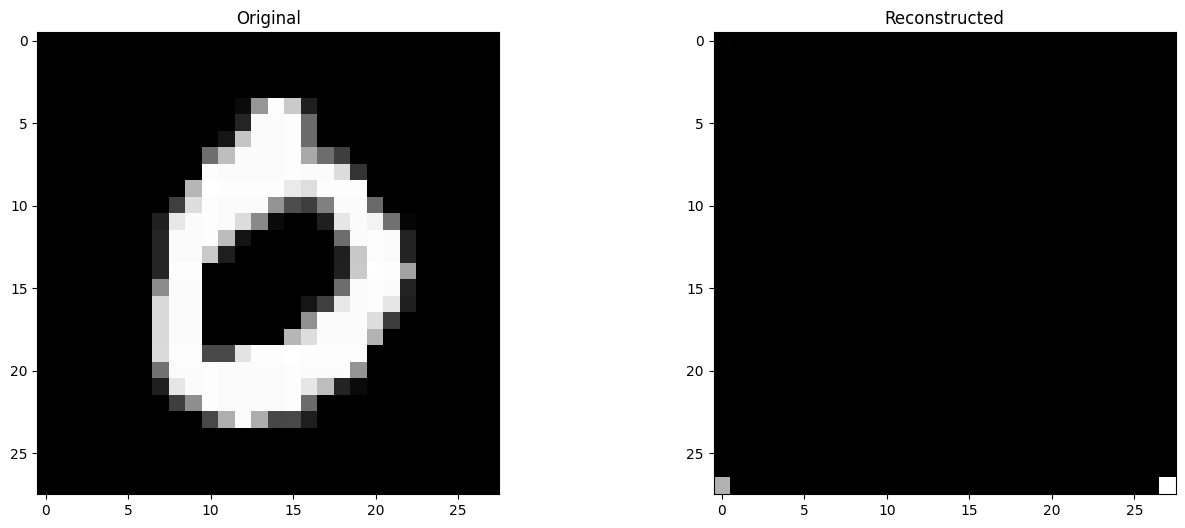

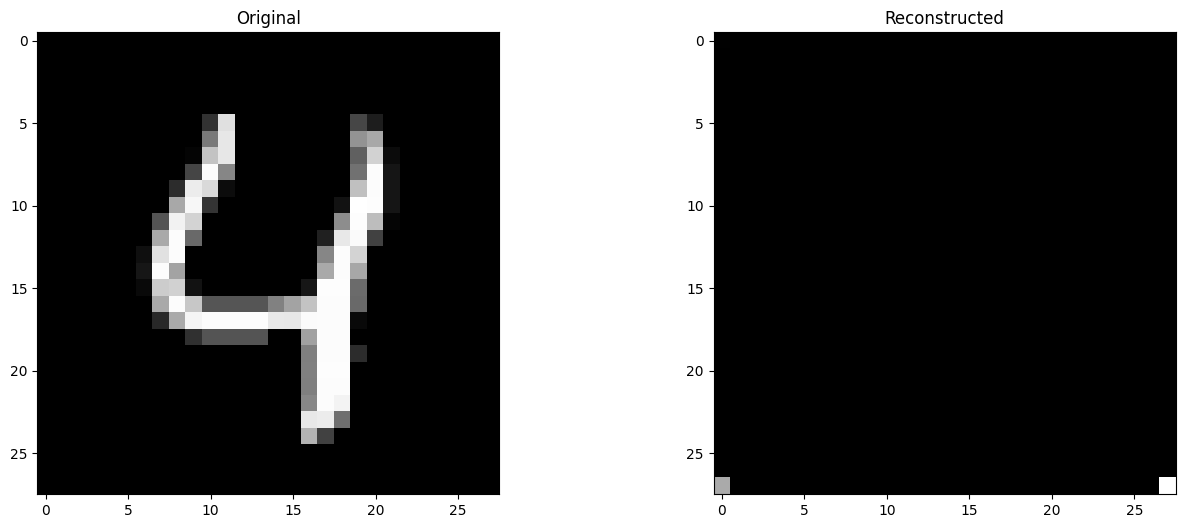

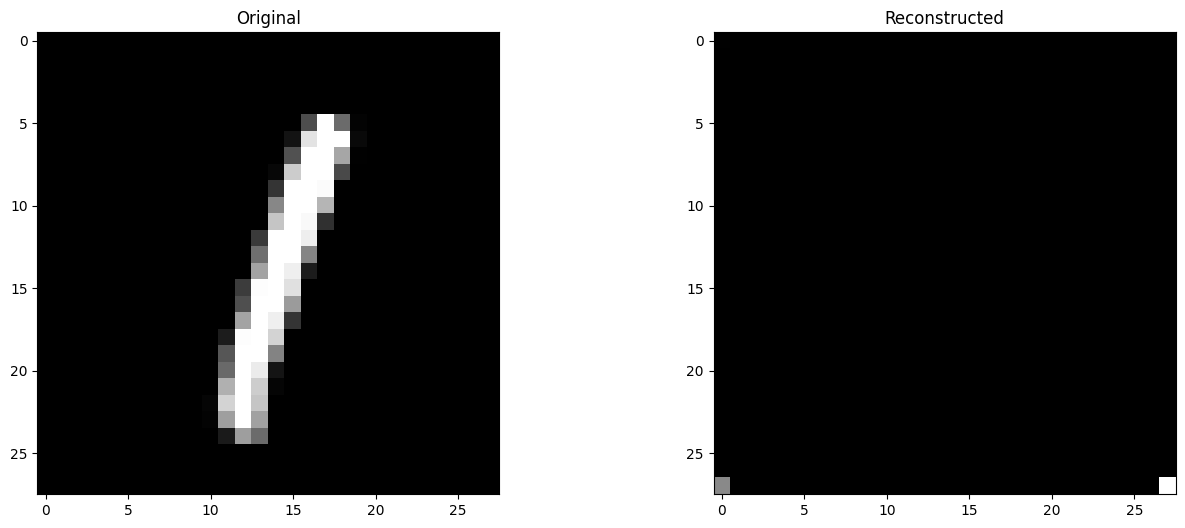

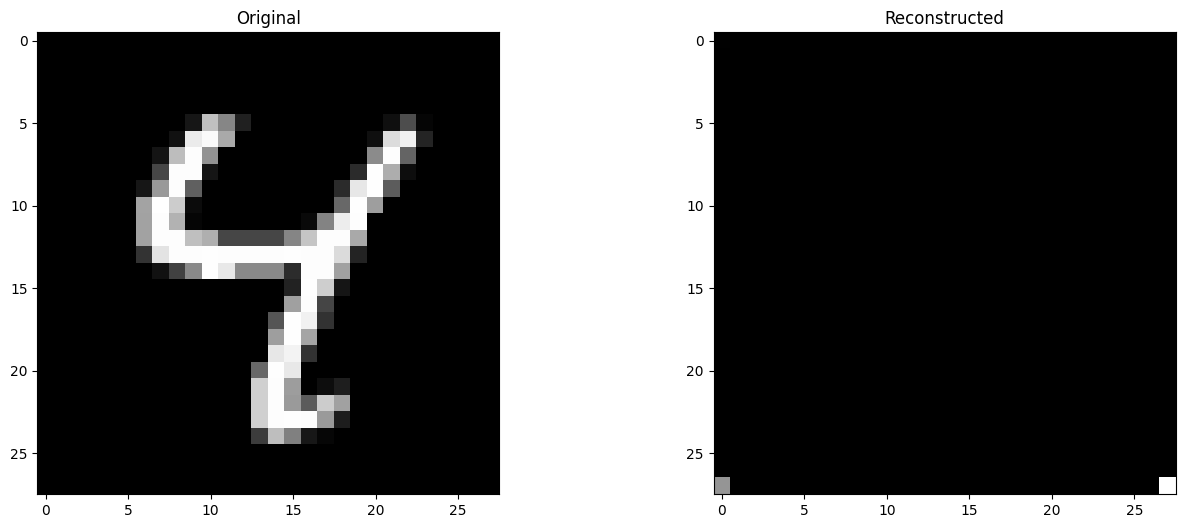

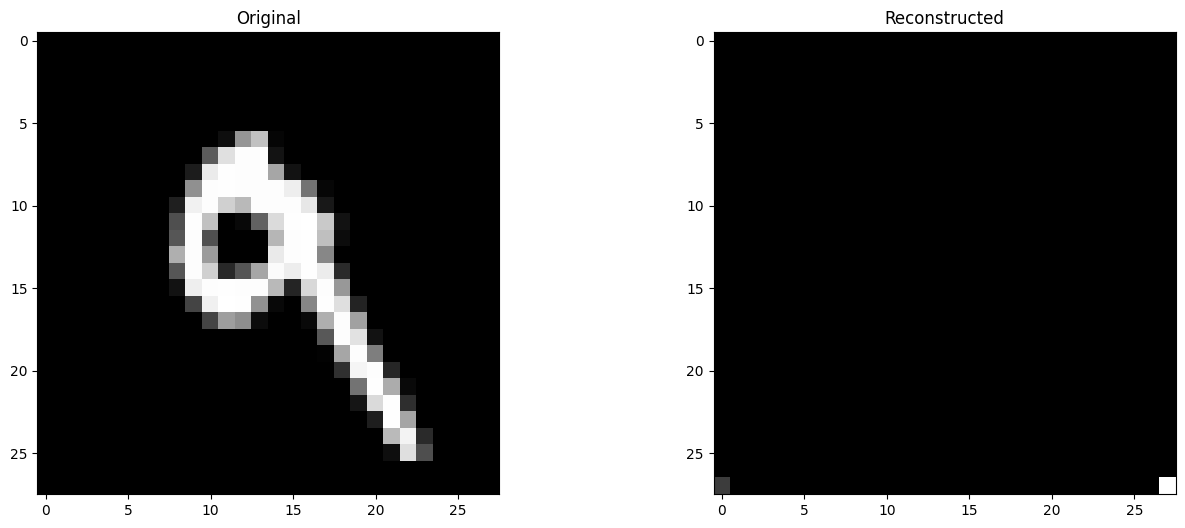

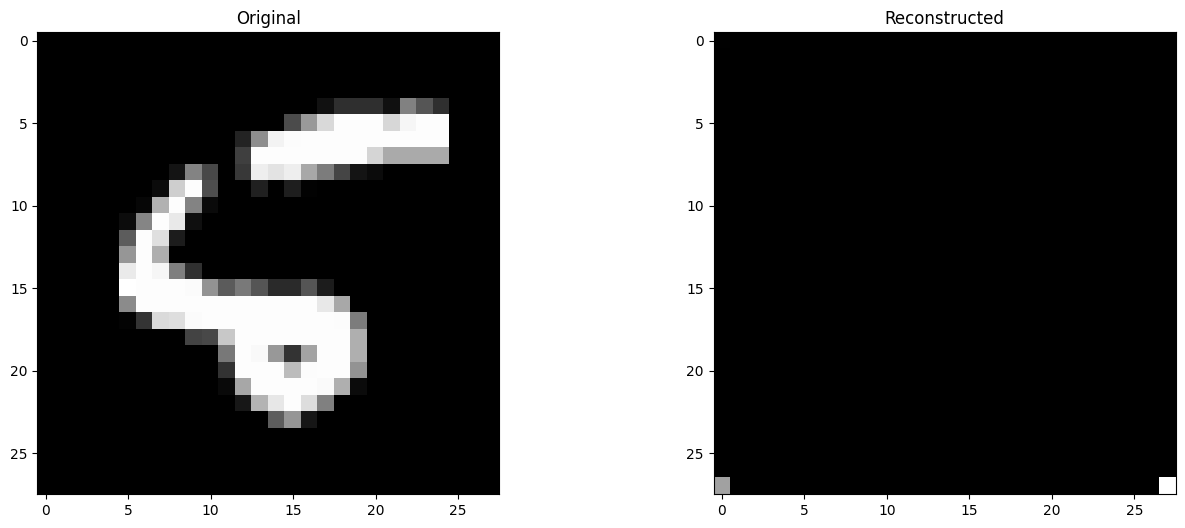

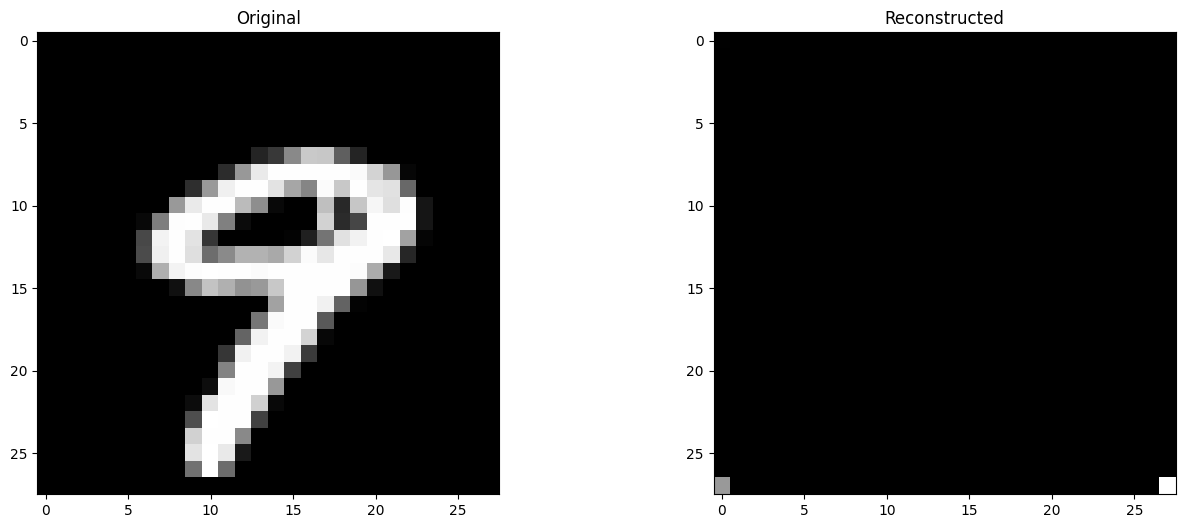

In [81]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255 # Don't forget to rescale!!

model.compile(loss="mean_squared_error",
          optimizer=Adam())   
# don't use categorical_crossentropy, another good choice would have been "binary_crossentropy"

early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")

train = model.fit(X_train, X_train,
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks=[early_stop],
          validation_split=0.1)

for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


## Change the loss function to `binary_crossentropy` to enforce larger penalties

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3457 - mean_squared_error: 0.0236 - val_loss: 0.0888 - val_mean_squared_error: 0.0089
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0858 - mean_squared_error: 0.0080 - val_loss: 0.0819 - val_mean_squared_error: 0.0067
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0802 - mean_squared_error: 0.0062 - val_loss: 0.0784 - val_mean_squared_error: 0.0056
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0774 - mean_squared_error: 0.0053 - val_loss: 0.0764 - val_mean_squared_error: 0.0049
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0755 - mean_squared_error: 0.0047 - val_loss: 0.0751 - val_mean_squared_error: 0.0045
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0742 - mean_squared_error: 0.0044 - val_loss: 0.0743 - val_mean_squared_error: 0.0043
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0737 - mean_squared_error: 0.00

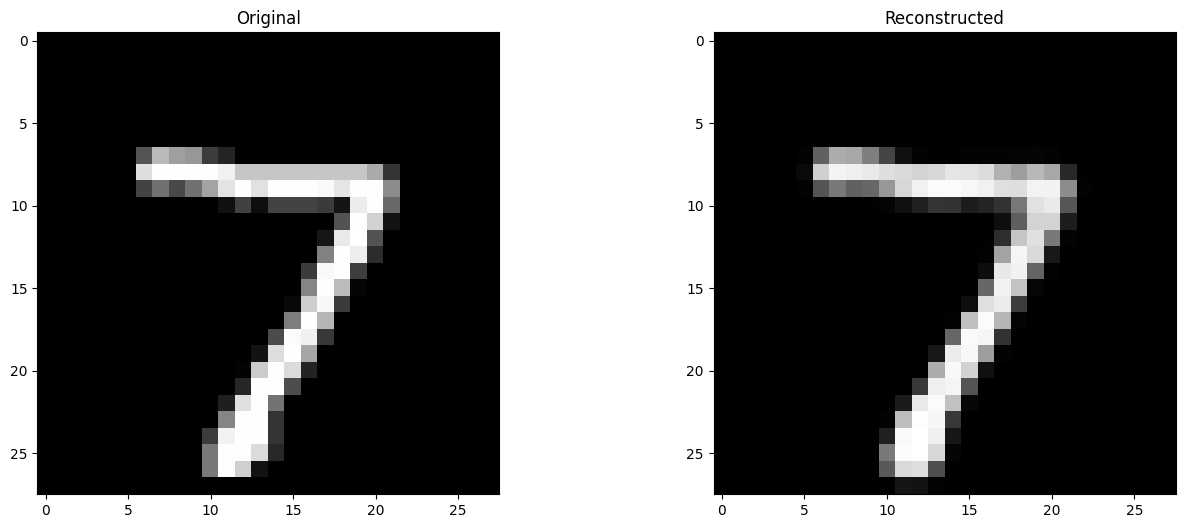

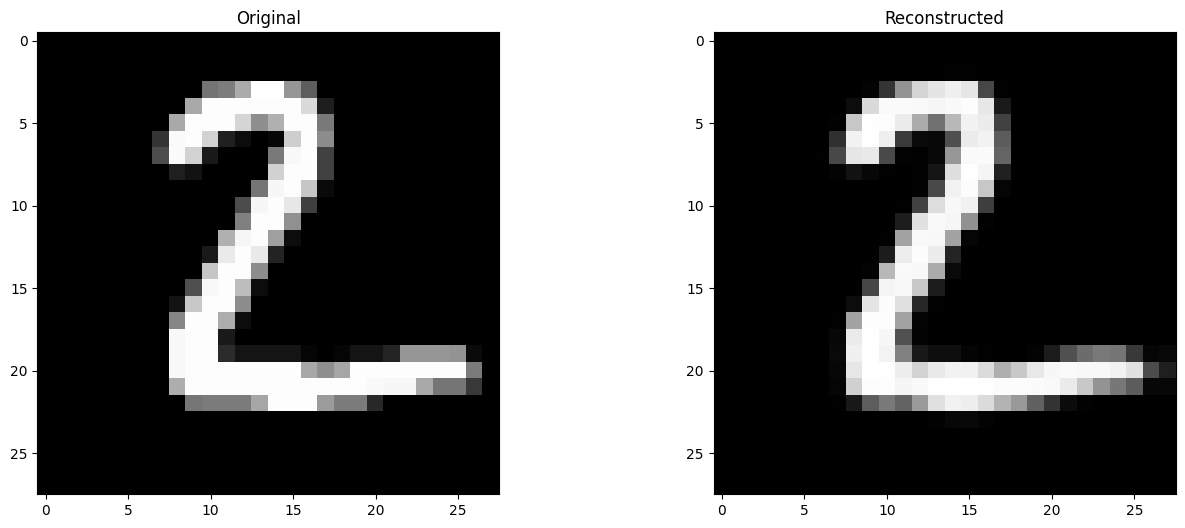

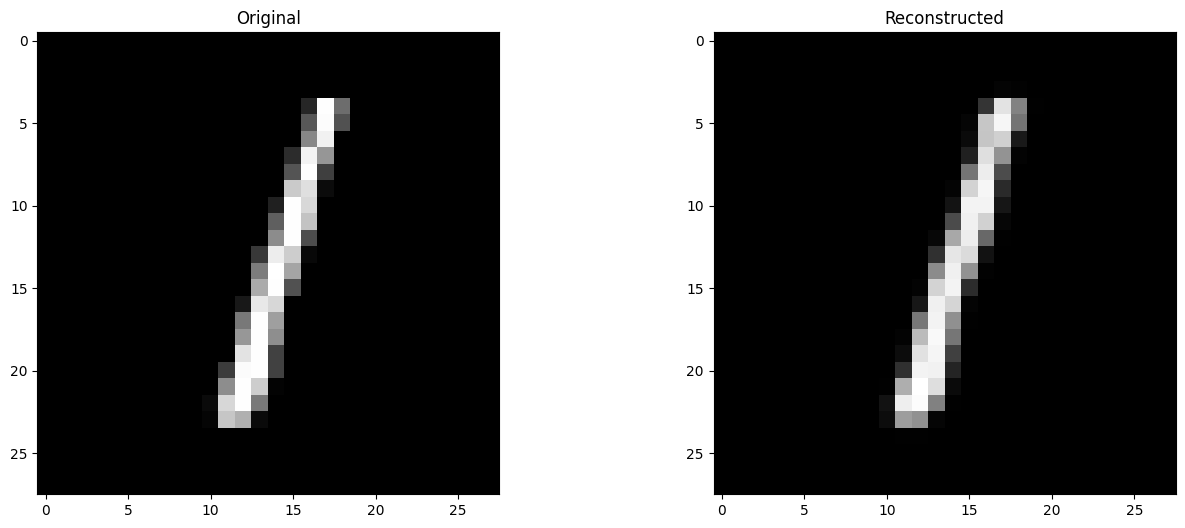

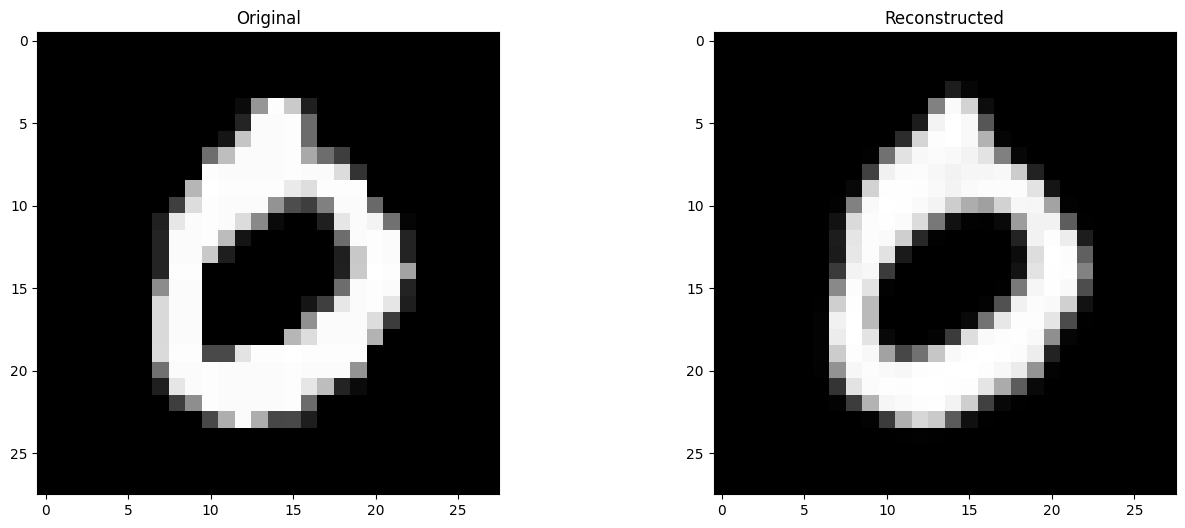

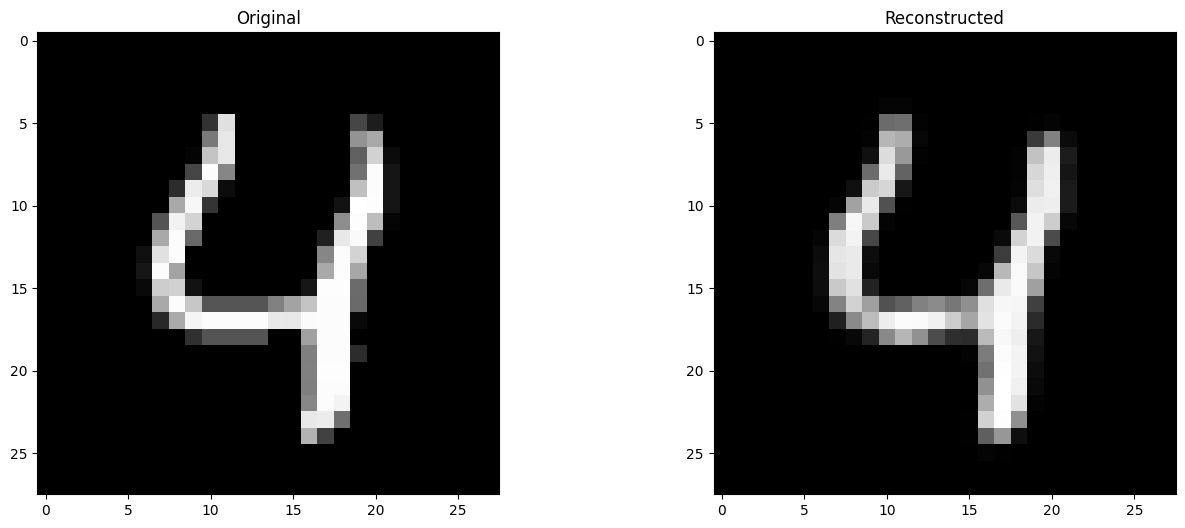

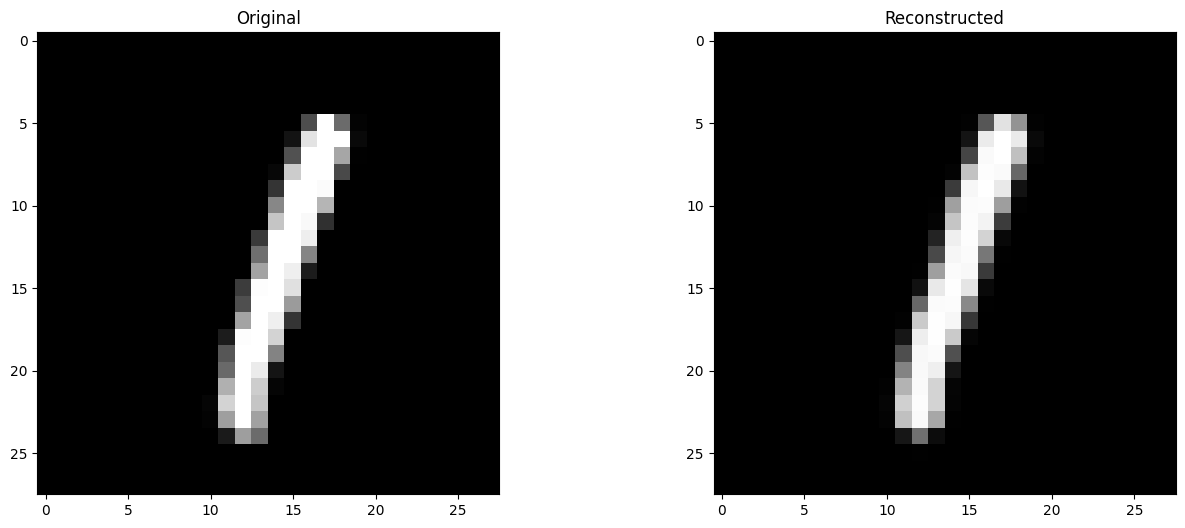

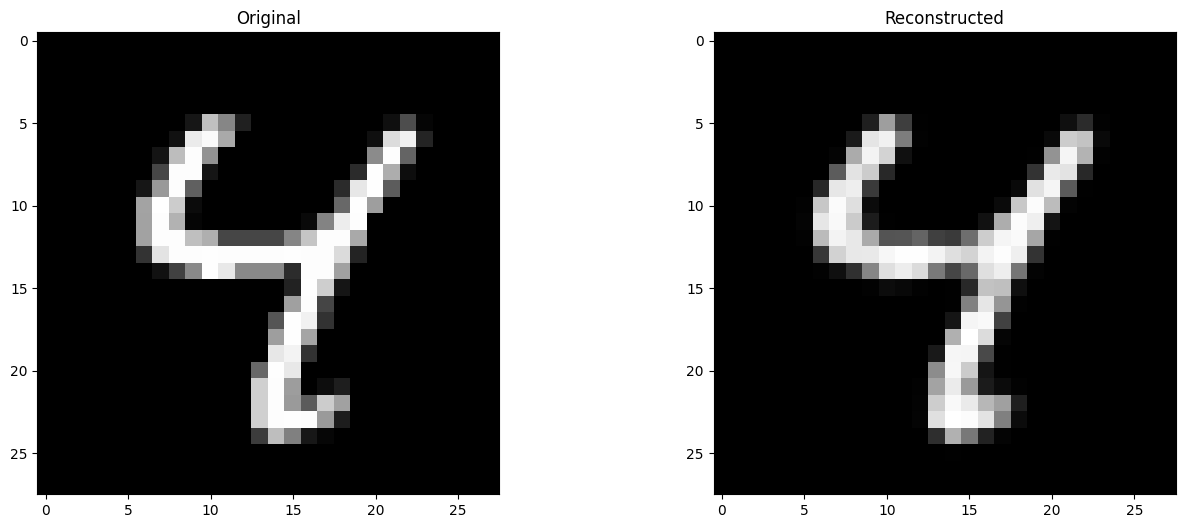

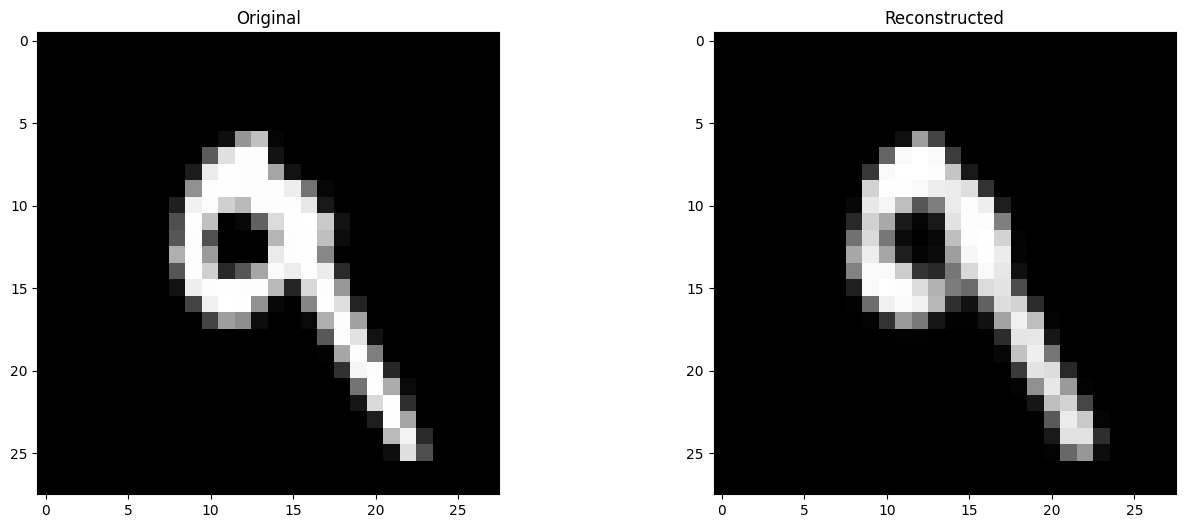

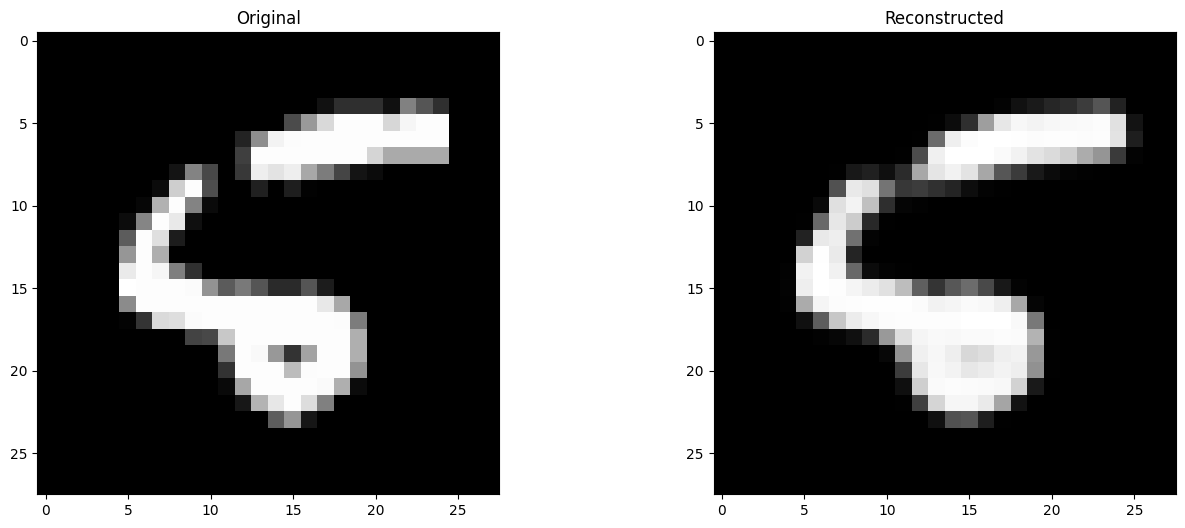

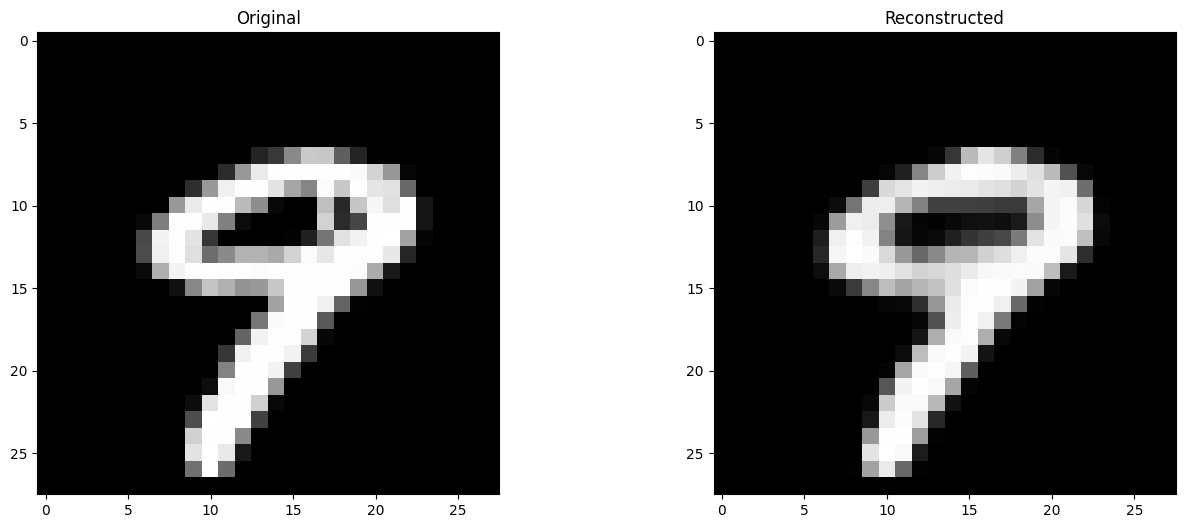

In [82]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255 # Don't forget to rescale!!

model.compile(loss="binary_crossentropy",
          metrics=["mean_squared_error"],
          optimizer=Adam())   
# don't use categorical_crossentropy, another good choice would have been "binary_crossentropy"

early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")

train = model.fit(X_train, X_train,
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks=[early_stop],
          validation_split=0.1)

for idx in range(10):
    original_image = X_test[idx].reshape(28, 28)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].imshow(original_image, cmap="gray")
    ax[0].set_title("Original")
    prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[1].imshow(prediction.reshape(28, 28), cmap="gray")
    ax[1].set_title("Reconstructed")


## Denoising images with autoencoders

We can use autoencoders to remove noise from images by training to construct clean images from noisy ones.

We start by adding random noise to train and test images.

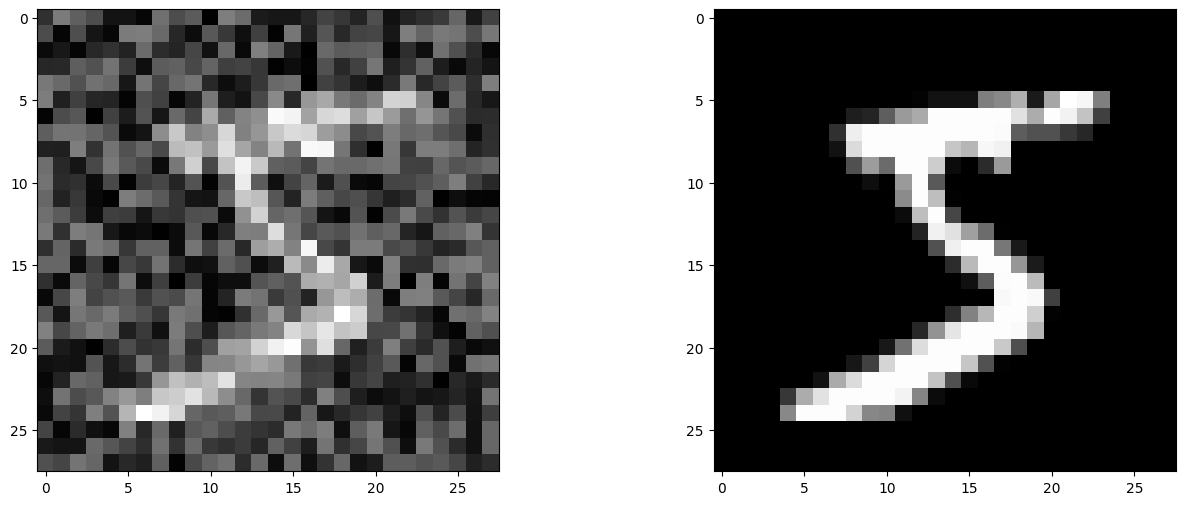

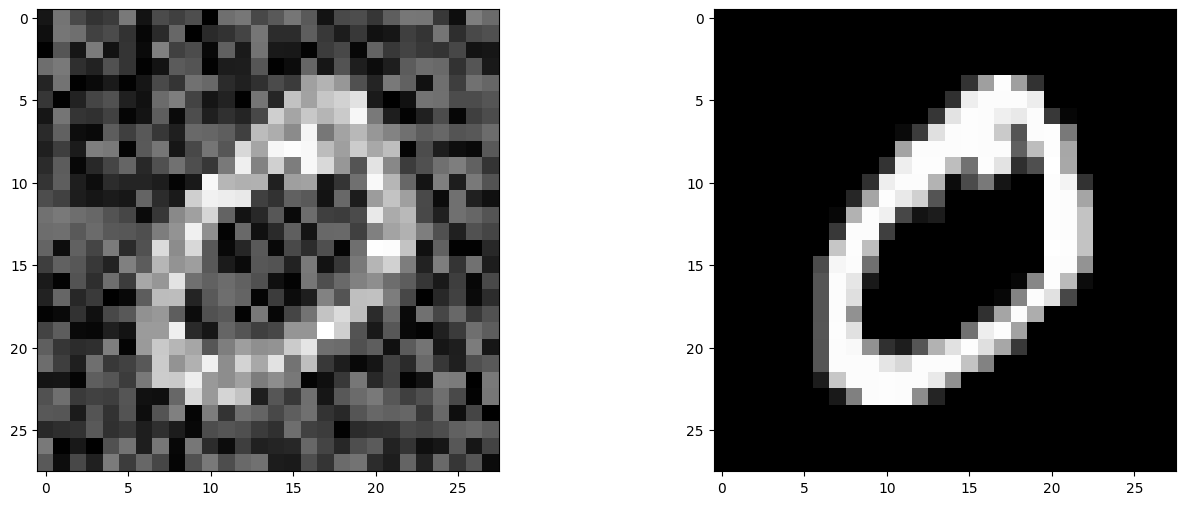

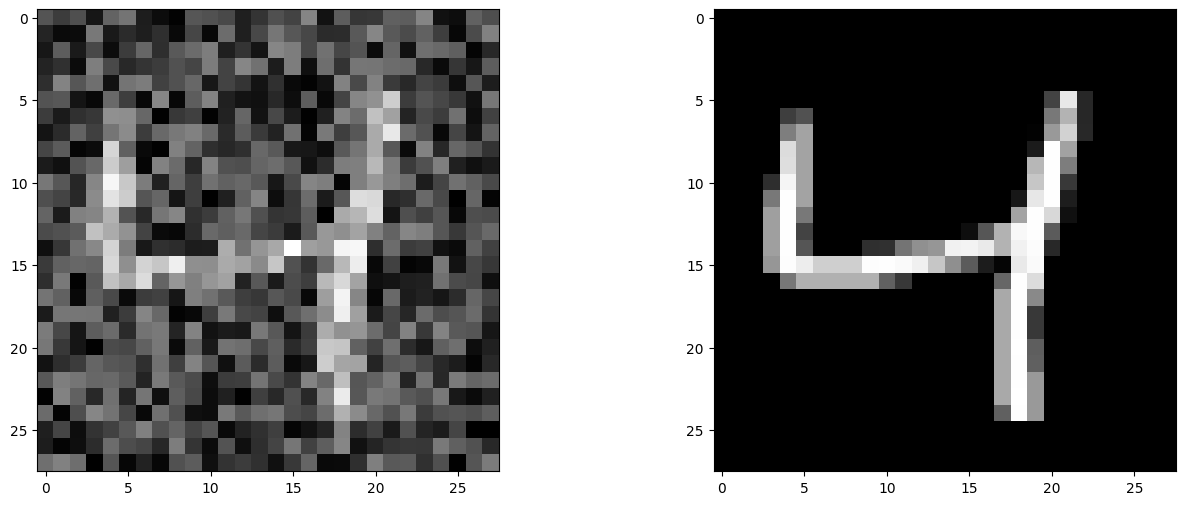

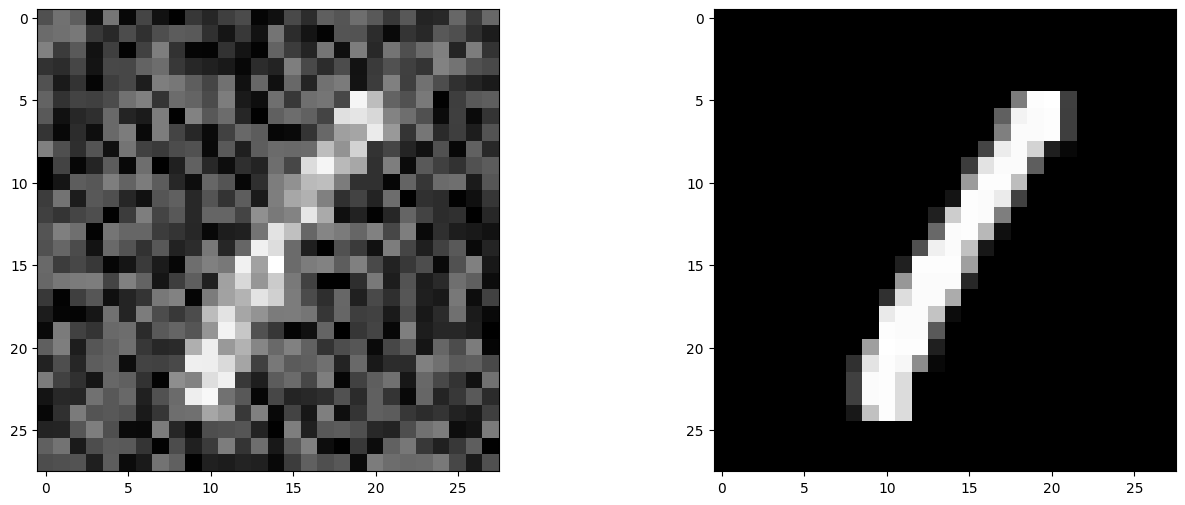

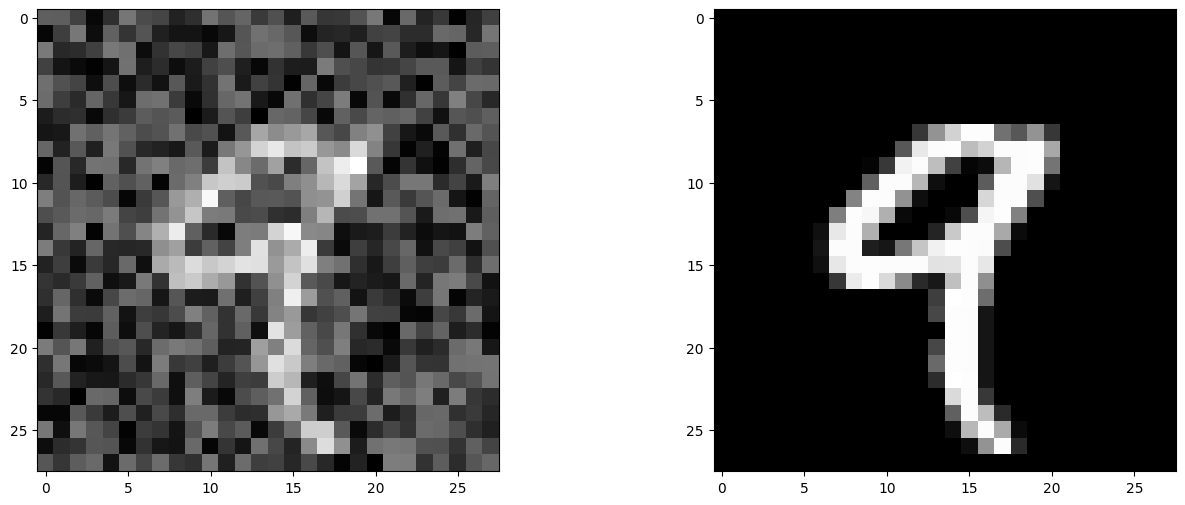

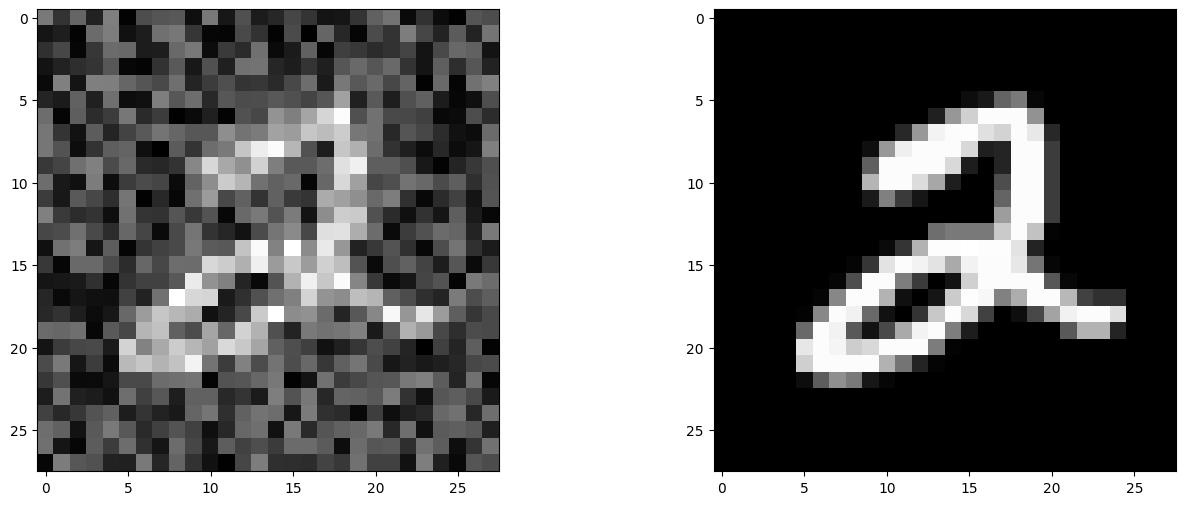

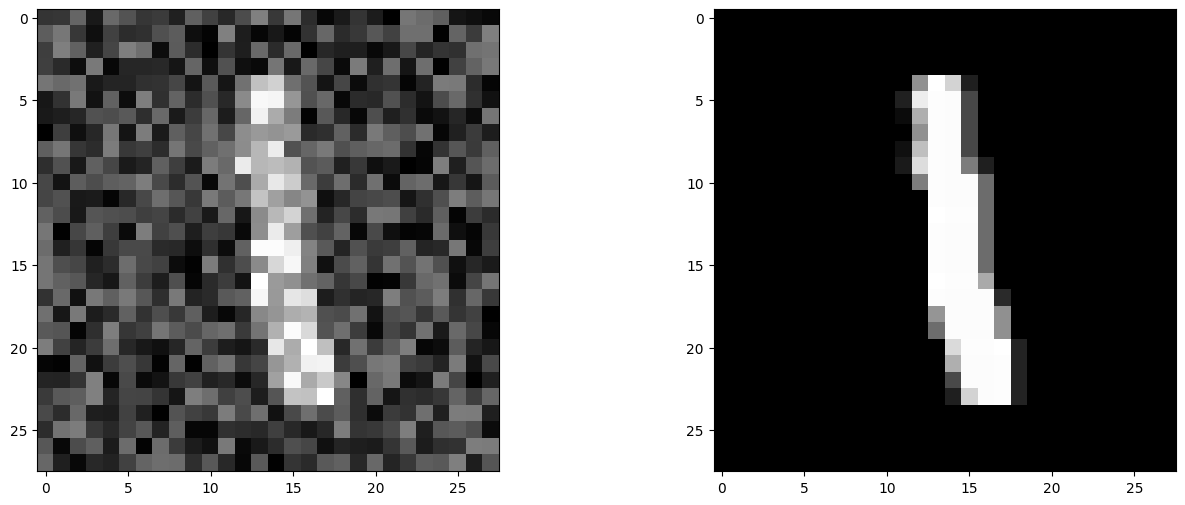

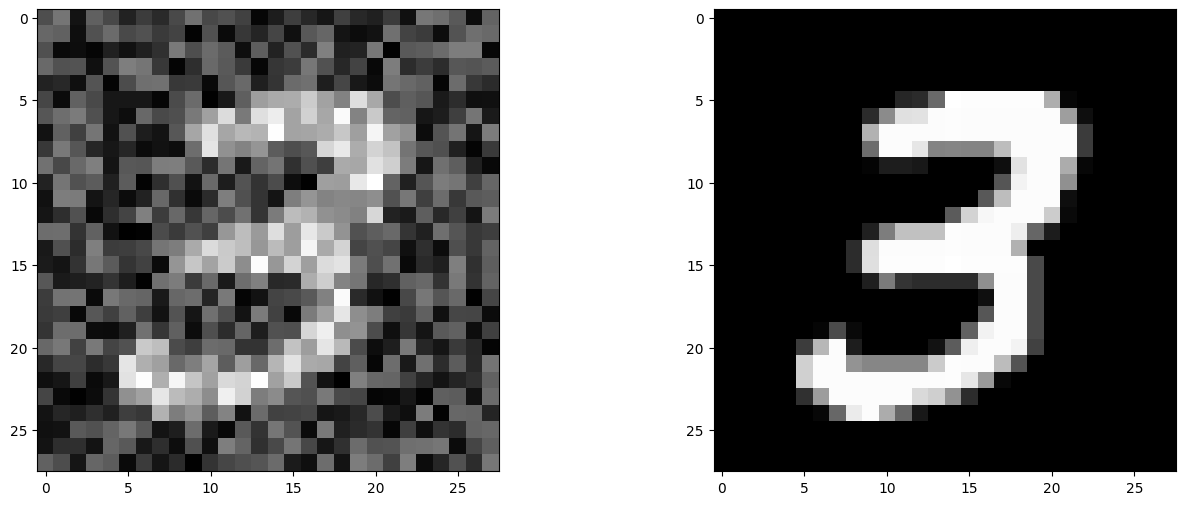

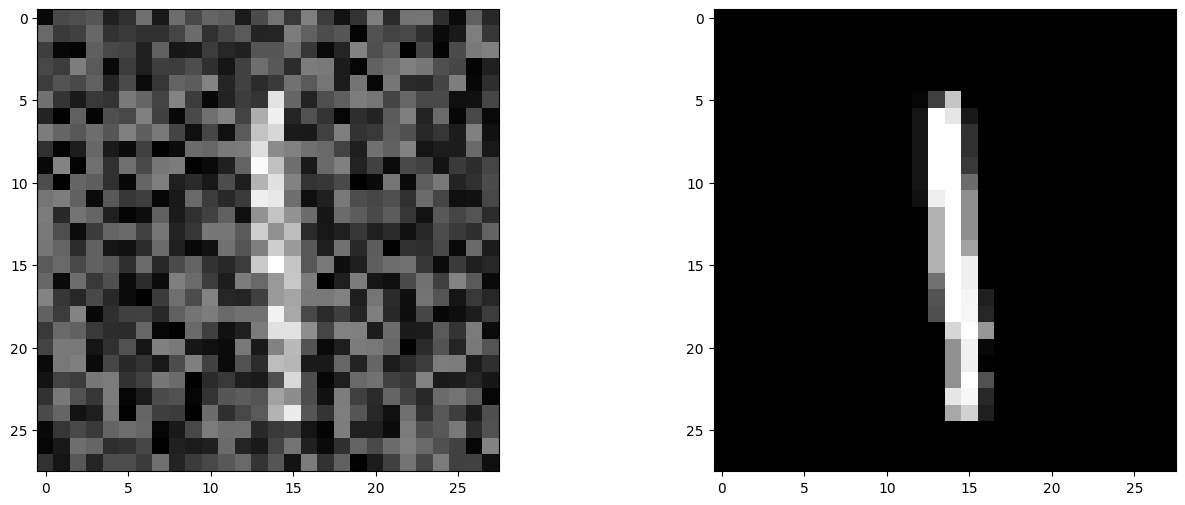

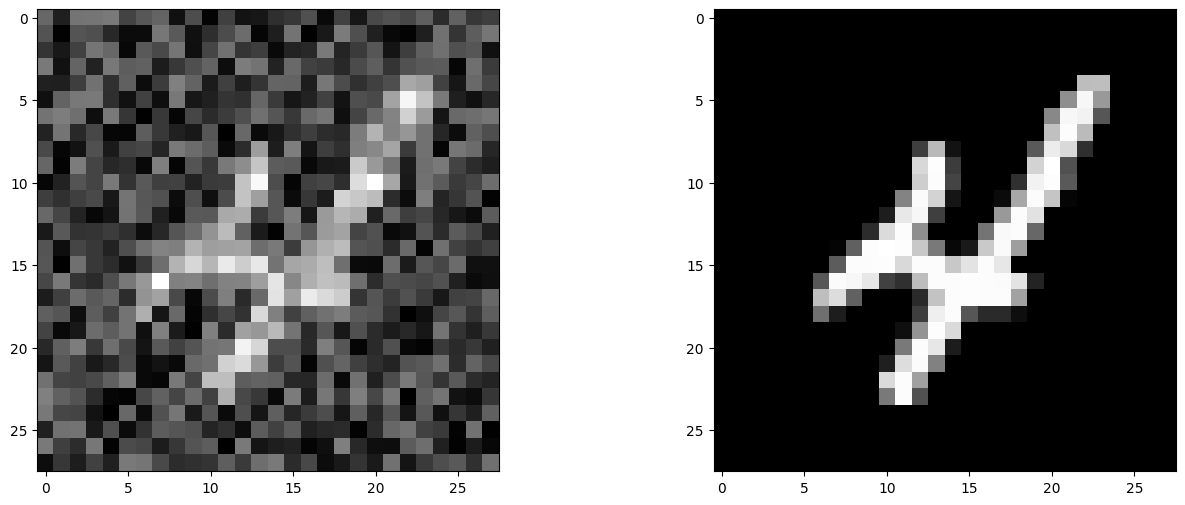

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255 # Don't forget to rescale!!

rs = np.random.RandomState(42)

factor = 1
X_train_noisy = X_train + factor * rs.random(size=X_train.shape)
X_test_noisy = X_test + factor * rs.random(size=X_test.shape)

for idx in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].imshow(X_train_noisy[idx].reshape(28, 28), cmap="gray")
    
    ax[1].imshow(X_train[idx].reshape(28, 28), cmap="gray")

## Let's create the autoencoder with Conv2D, MaxPooling2D and UpSampling2D layers

In [98]:
inp = Input(shape=(28, 28, 1))

conv1 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(inp)
pool1 = MaxPooling2D(2)(conv1)

conv2 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(pool1)
pool2 = MaxPooling2D(2)(conv2)

conv3 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(pool2)
up1 = UpSampling2D(2)(conv3)

conv4 = Conv2D(filters=8, kernel_size=(3, 3), activation="relu", padding="same")(up1)
up2 = UpSampling2D(2)(conv4)

conv5 = Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(up2)

model = Model(inputs=inp, outputs=conv5)
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_13 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_14 (UpSampling2D) │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 1)      │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,905 (7.44 KB)

 Trainable params: 1,905 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(loss="binary_crossentropy",
              metrics=["mean_squared_error"],
              optimizer=Adam())

early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")

model.fit(X_train_noisy, X_train,
          epochs=30,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stop])




Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0935 - mean_squared_error: 0.0104 - val_loss: 0.0935 - val_mean_squared_error: 0.0102
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0925 - mean_squared_error: 0.0100 - val_loss: 0.0923 - val_mean_squared_error: 0.0098
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0919 - mean_squared_error: 0.0098 - val_loss: 0.0914 - val_mean_squared_error: 0.0096
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0908 - mean_squared_error: 0.0095 - val_loss: 0.0910 - val_mean_squared_error: 0.0095
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0904 - mean_squared_error: 0.0094 - val_loss: 0.0904 - val_mean_squared_error: 0.0092
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0897 - mean_squared_error: 0.0092 - val_loss: 0.0900 - val_mean_squared_error: 0.0092
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0892 - mean_squared_error: 0.

## Plot the noisy, the reconstructed and the original images

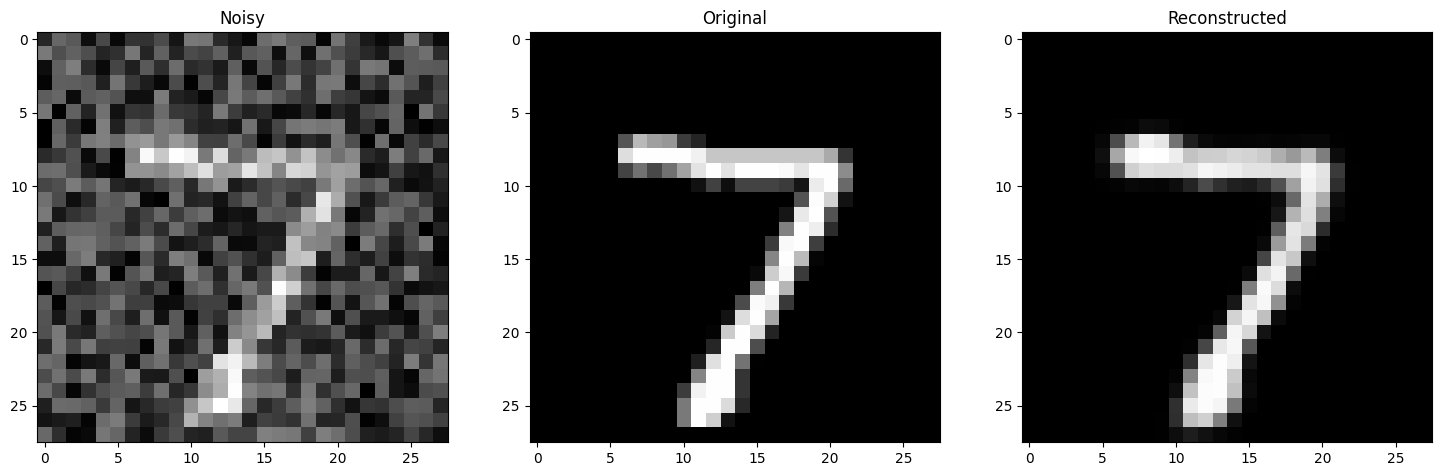

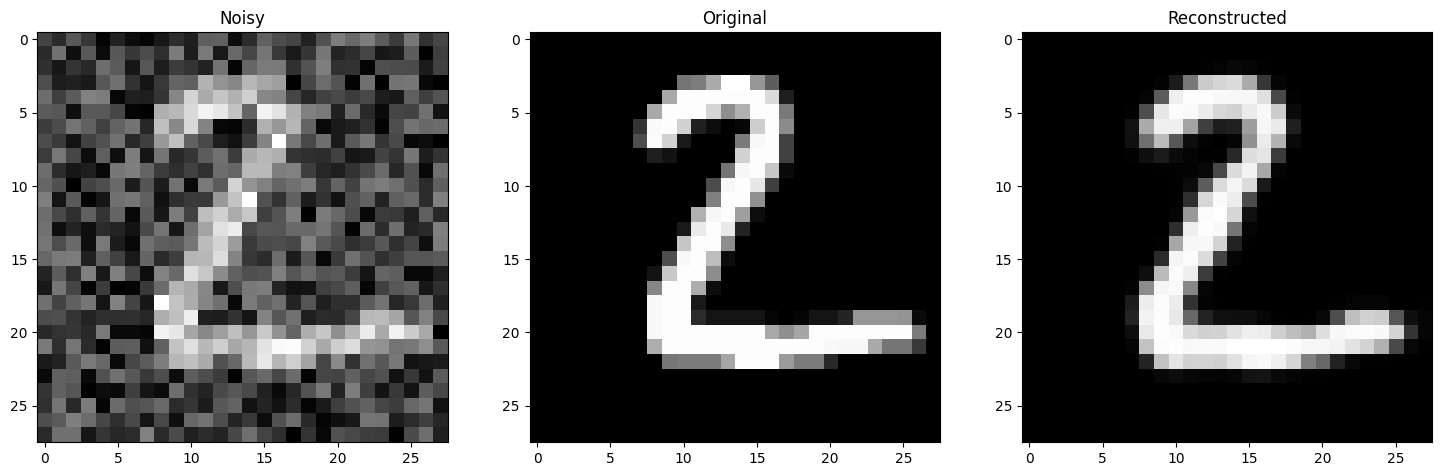

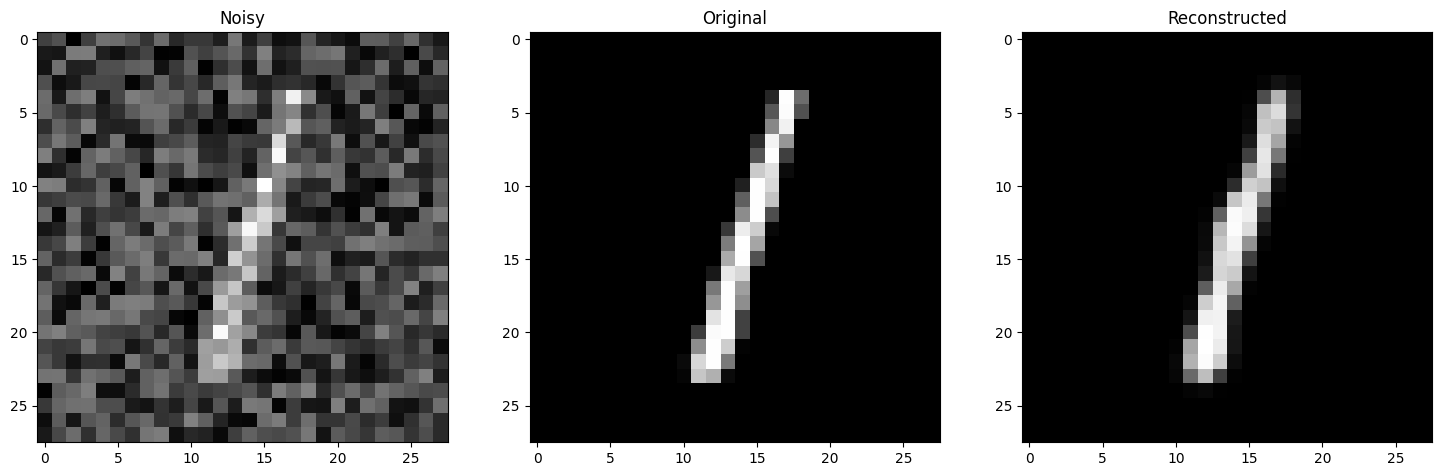

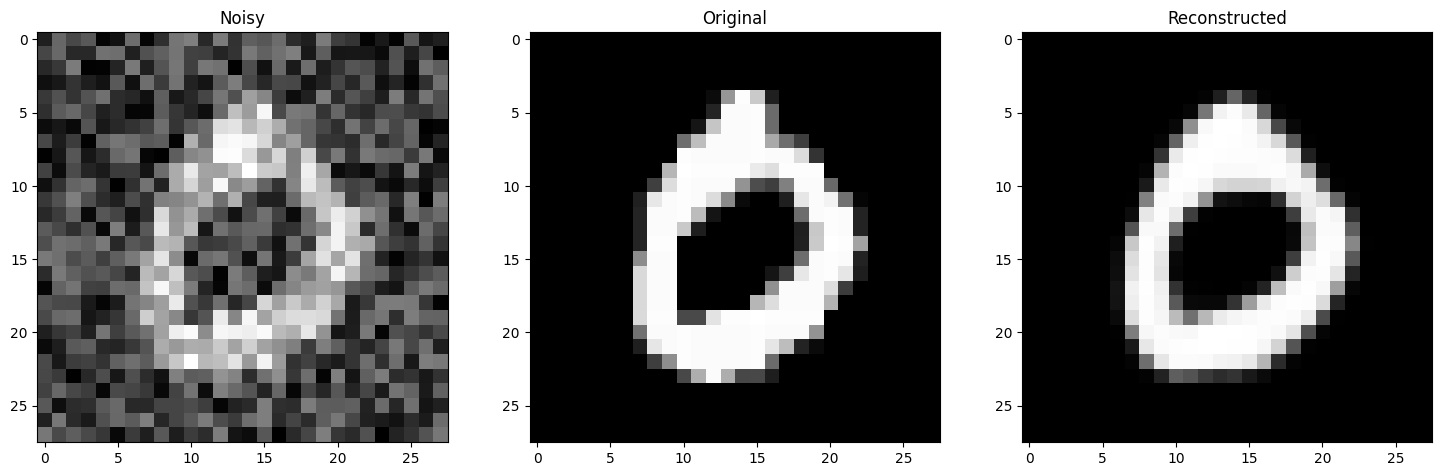

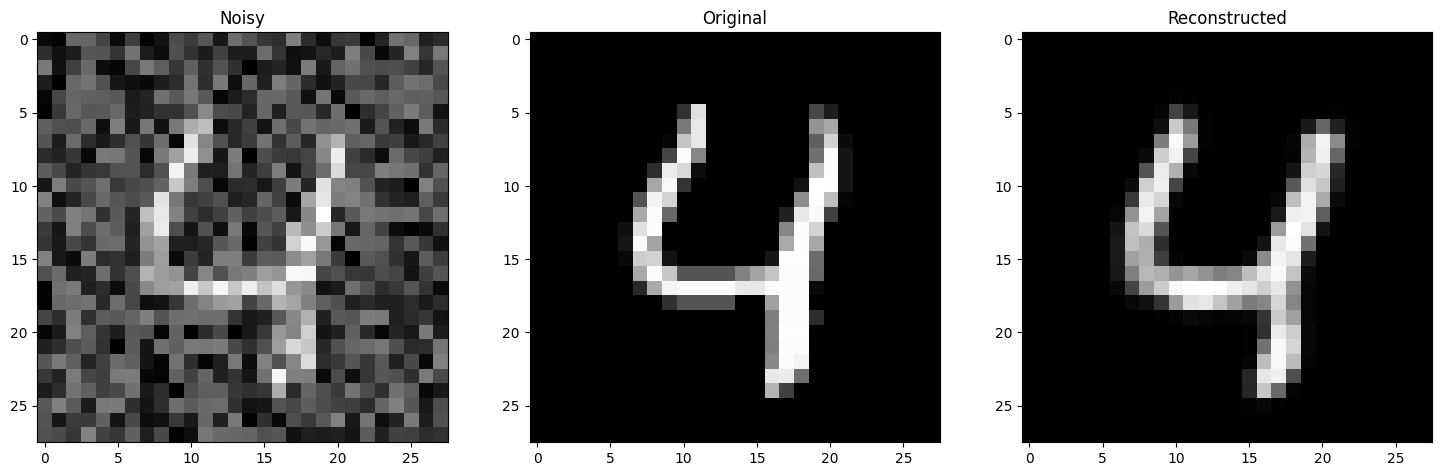

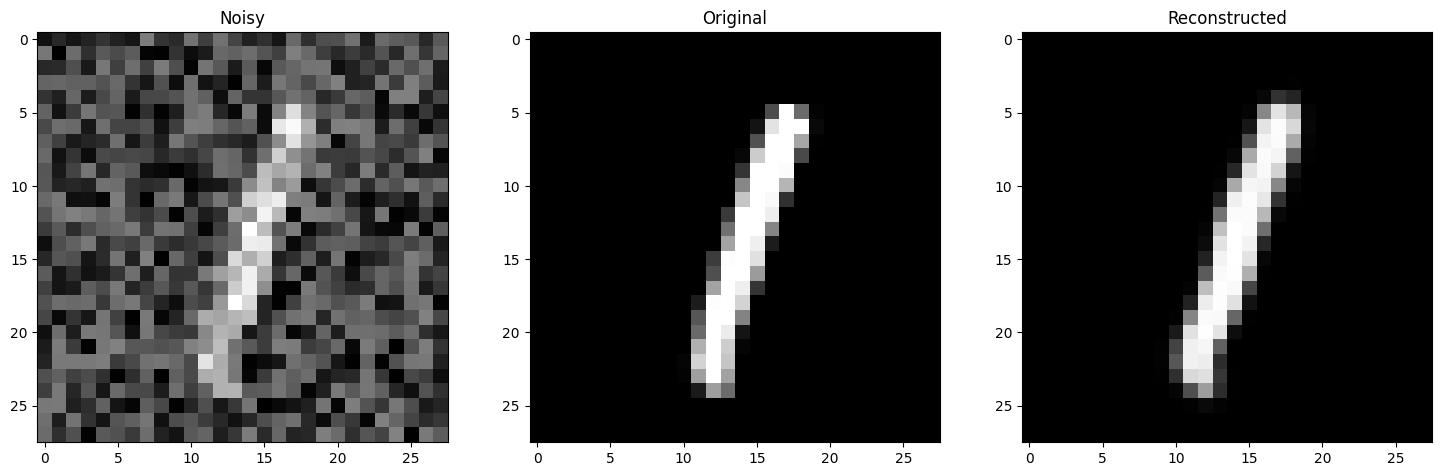

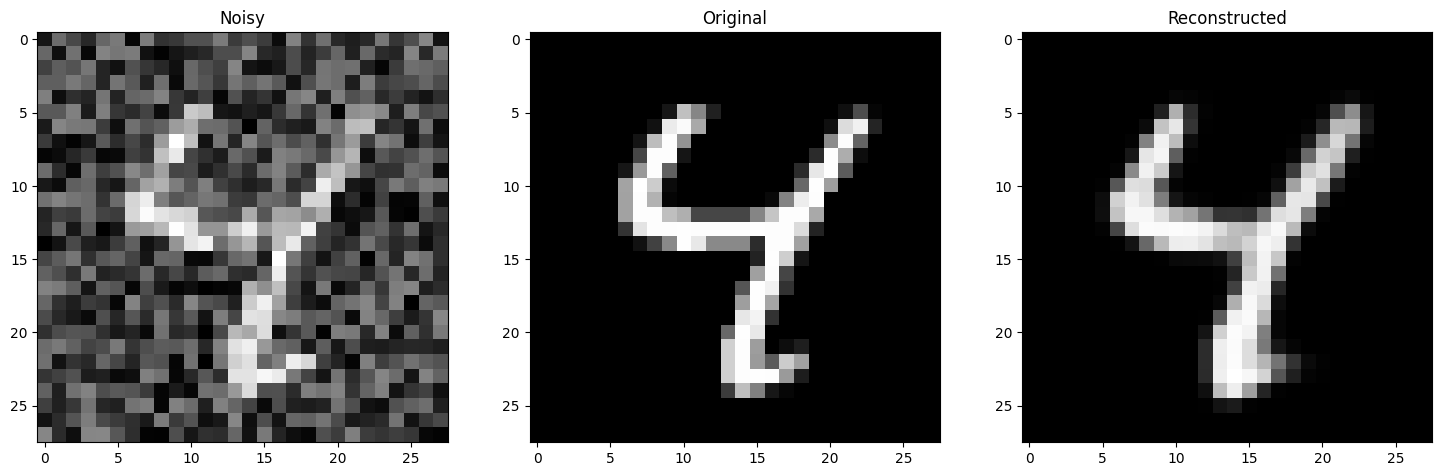

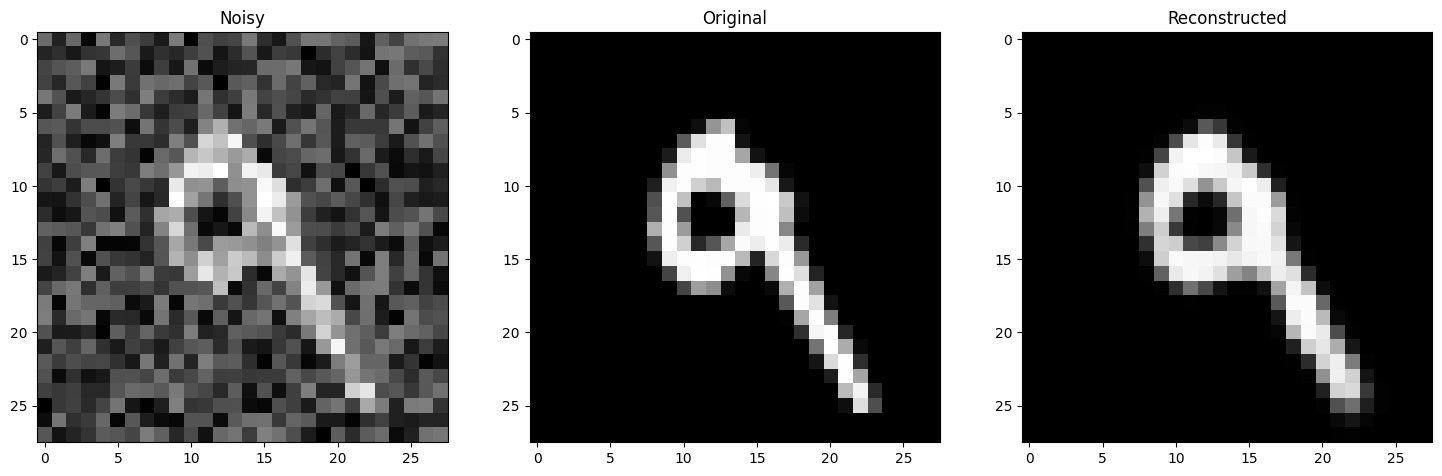

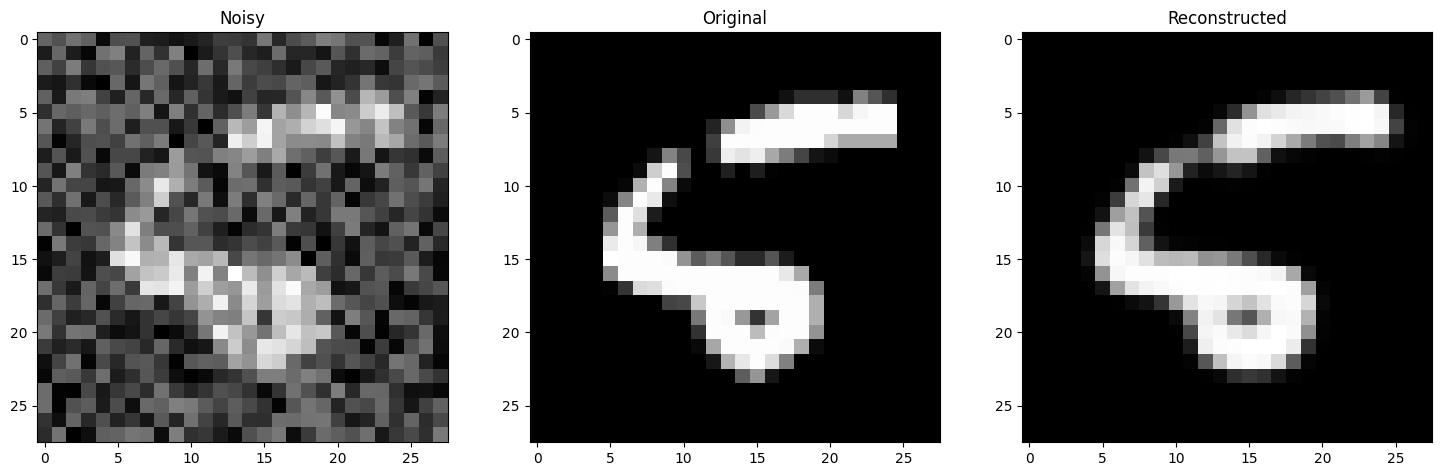

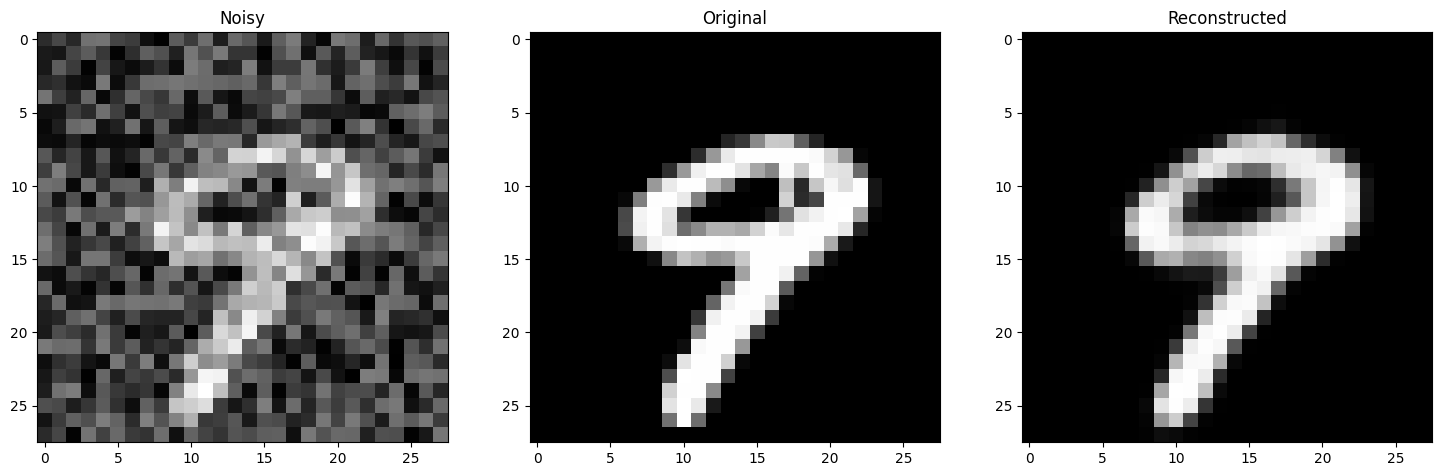

In [107]:
for idx in range(10):
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].set_title("Noisy")
    ax[1].set_title("Original")
    ax[2].set_title("Reconstructed")
    
    ax[0].imshow(X_test_noisy[idx].reshape(28, 28), cmap="gray")
    ax[1].imshow(X_test[idx].reshape(28, 28), cmap="gray")
    
    prediction = model.predict(X_test_noisy[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[2].imshow(prediction.reshape(28, 28), cmap="gray")


## Increase the noise - No re-training here!

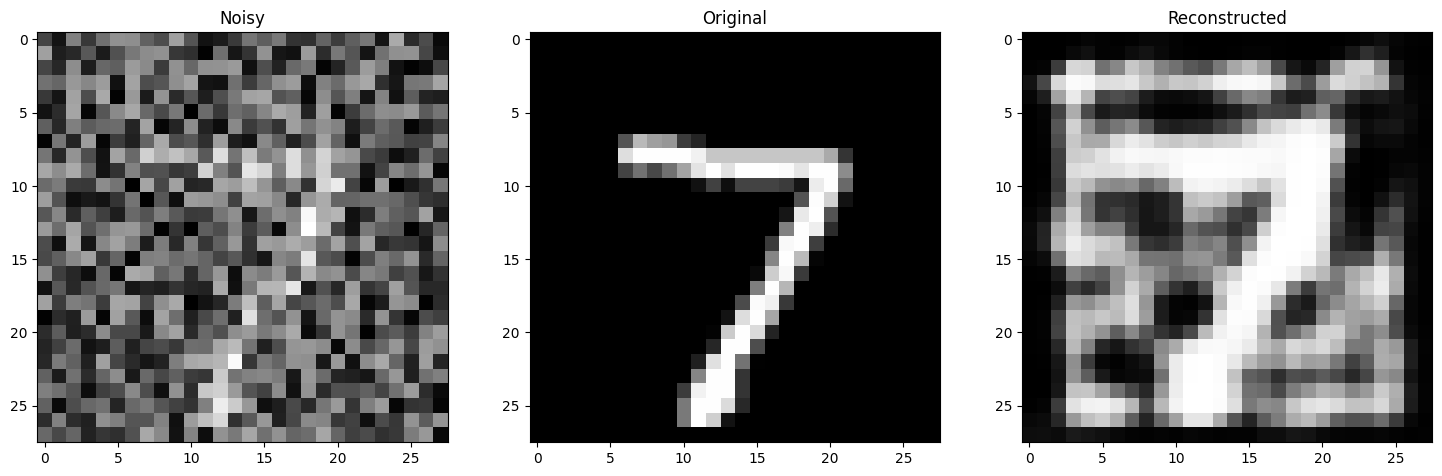

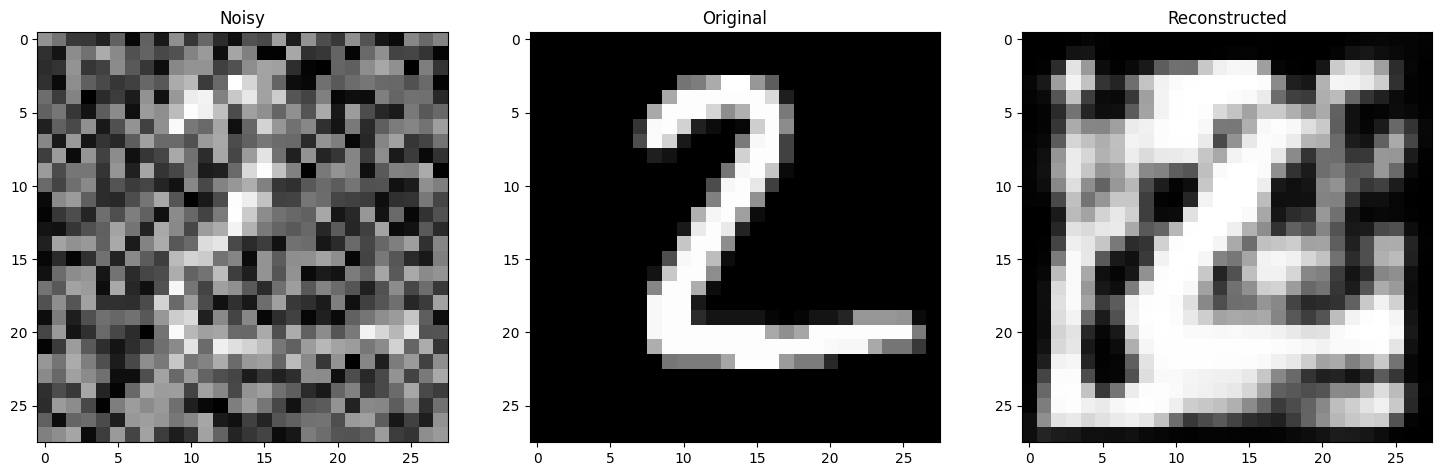

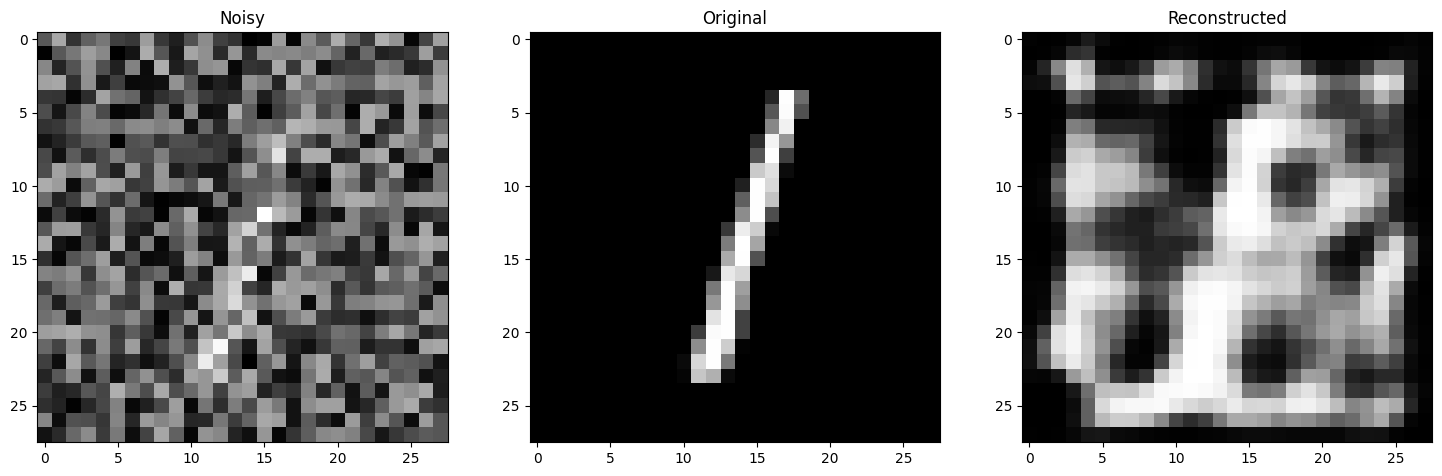

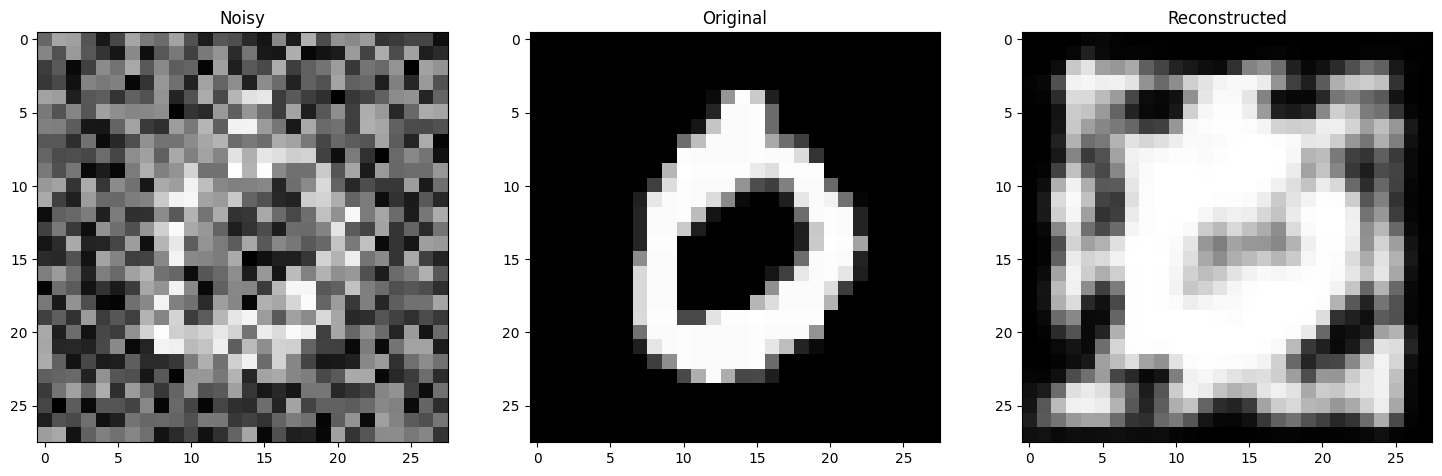

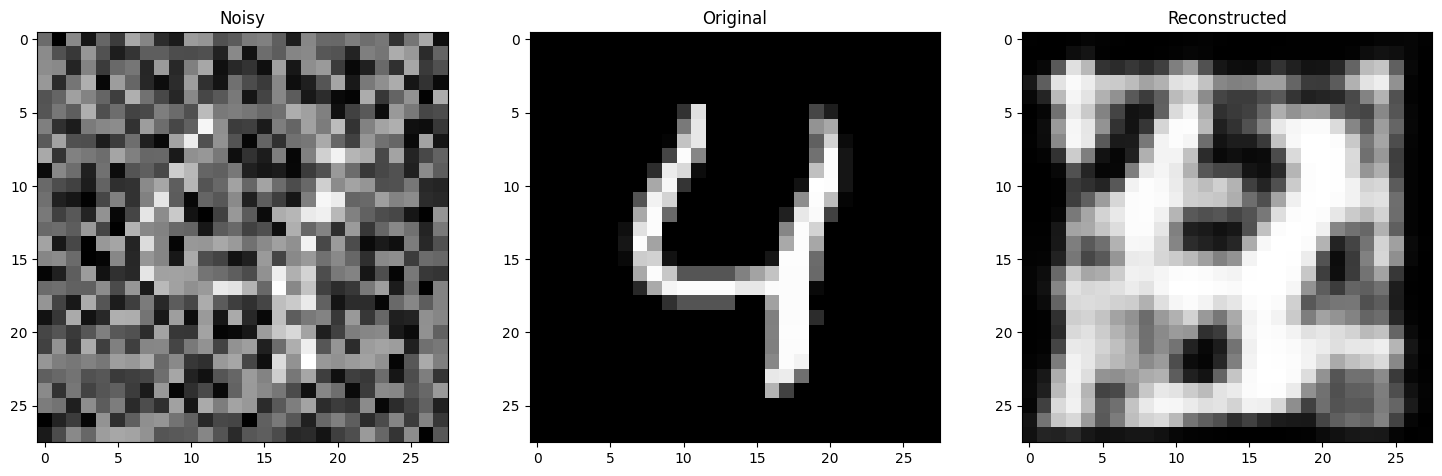

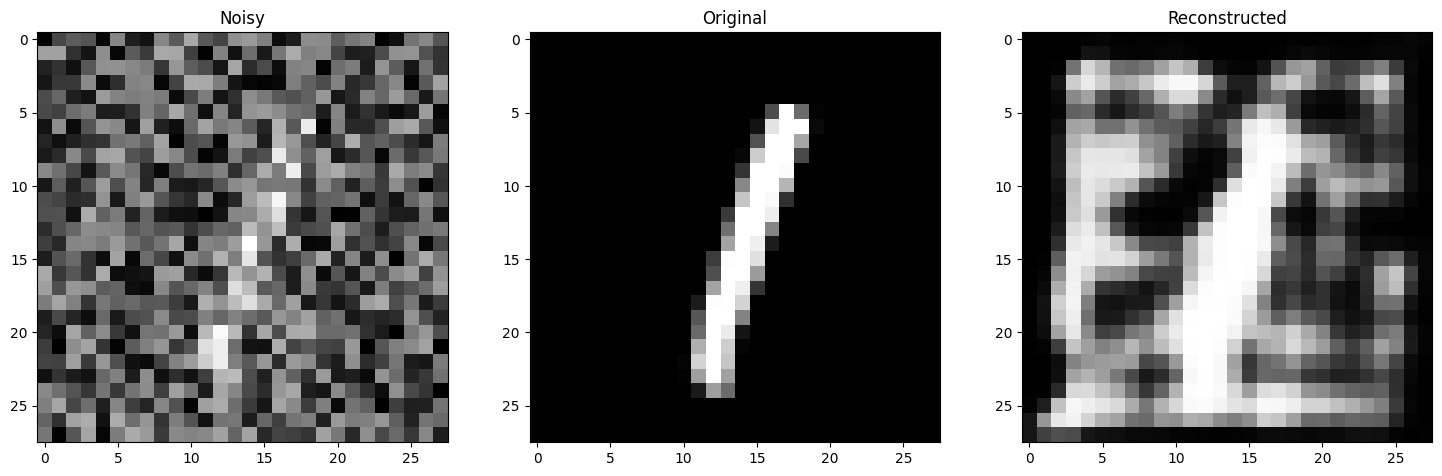

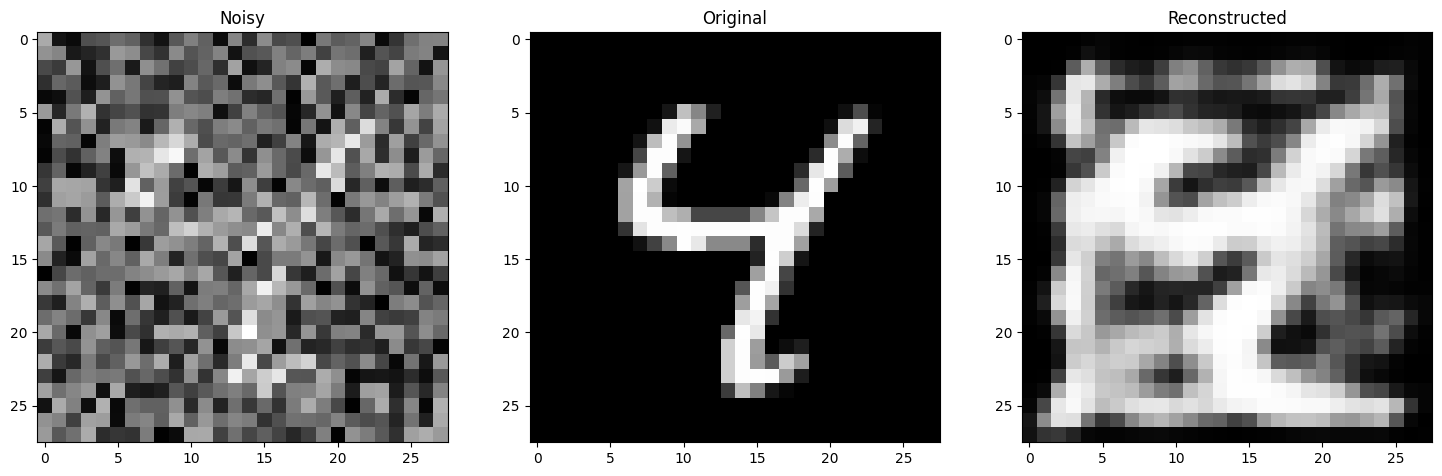

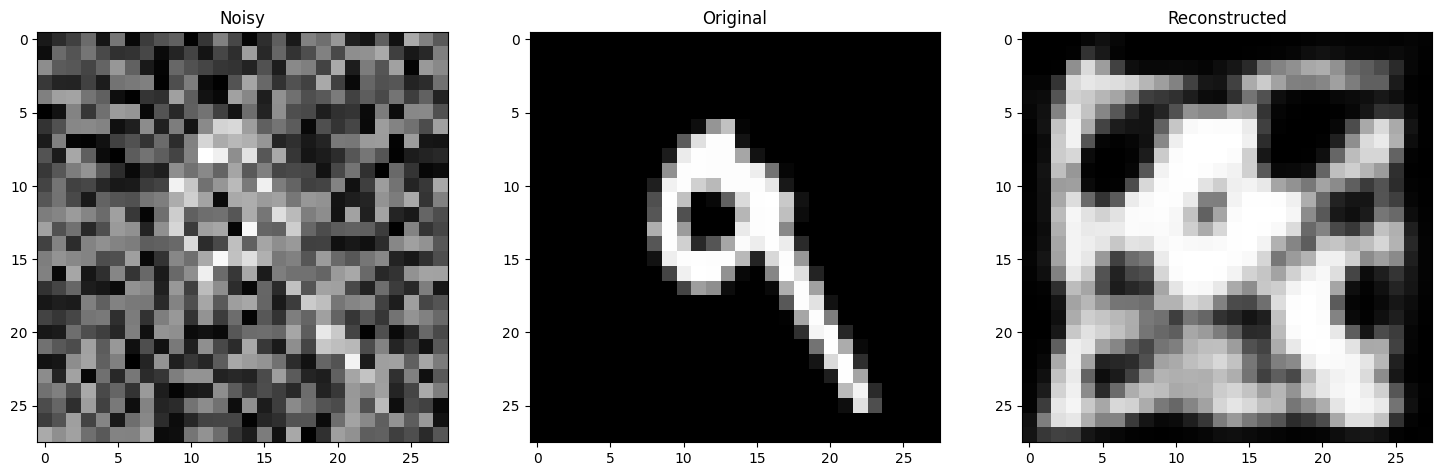

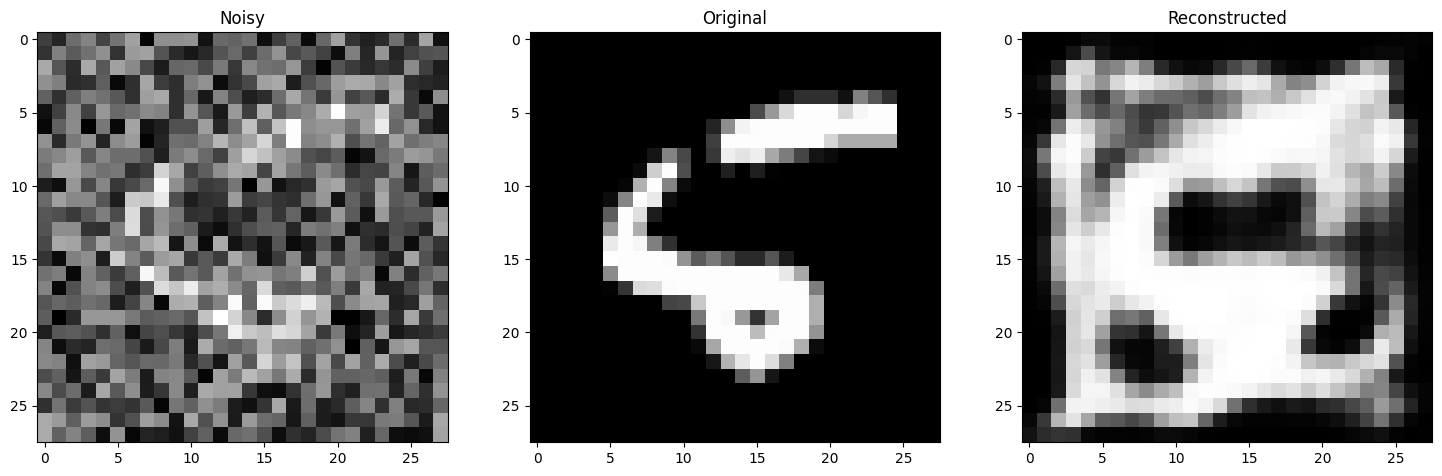

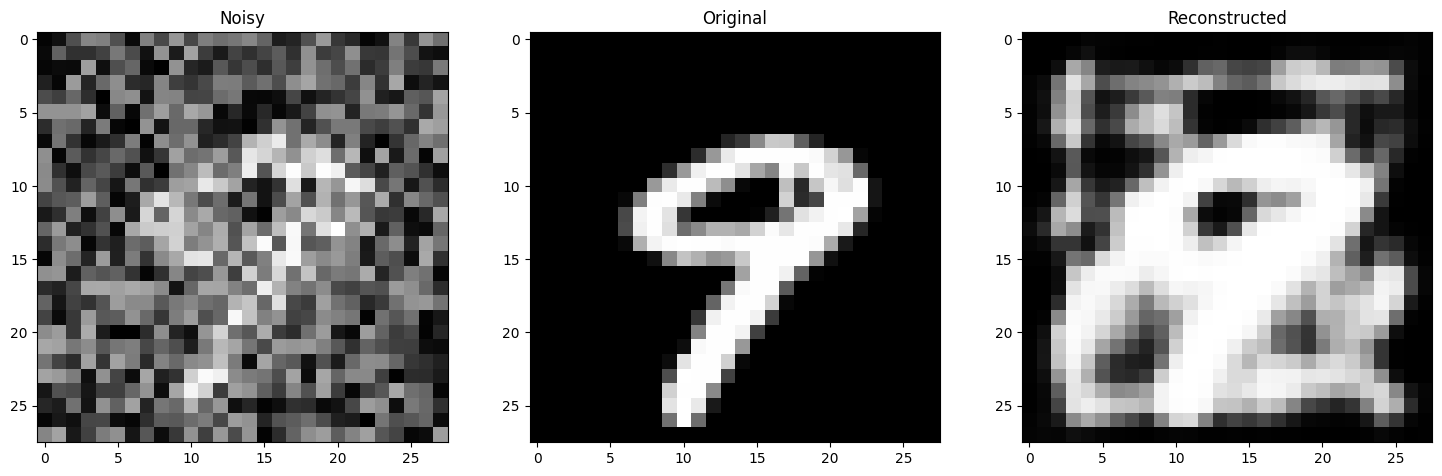

In [109]:
factor = 2
X_train_noisy2 = X_train + factor * rs.random(size=X_train.shape)
X_test_noisy2 = X_test + factor * rs.random(size=X_test.shape)

for idx in range(10):
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].set_title("Noisy")
    ax[1].set_title("Original")
    ax[2].set_title("Reconstructed")
    
    ax[0].imshow(X_test_noisy2[idx].reshape(28, 28), cmap="gray")
    ax[1].imshow(X_test[idx].reshape(28, 28), cmap="gray")
    
    prediction = model.predict(X_test_noisy2[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[2].imshow(prediction.reshape(28, 28), cmap="gray")


### Re-train the model with larger noise

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1325 - mean_squared_error: 0.0217 - val_loss: 0.1097 - val_mean_squared_error: 0.0152
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1089 - mean_squared_error: 0.0150 - val_loss: 0.1086 - val_mean_squared_error: 0.0148
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1082 - mean_squared_error: 0.0148 - val_loss: 0.1085 - val_mean_squared_error: 0.0148
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1073 - mean_squared_error: 0.0146 - val_loss: 0.1084 - val_mean_squared_error: 0.0148
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1074 - mean_squared_error: 0.0145 - val_loss: 0.1084 - val_mean_squared_error: 0.0148
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1071 - mean_squared_error: 0.0144 - val_loss: 0.1067 - val_mean_squared_error: 0.0142
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1051 - mean_squared_error: 0.0139 - 

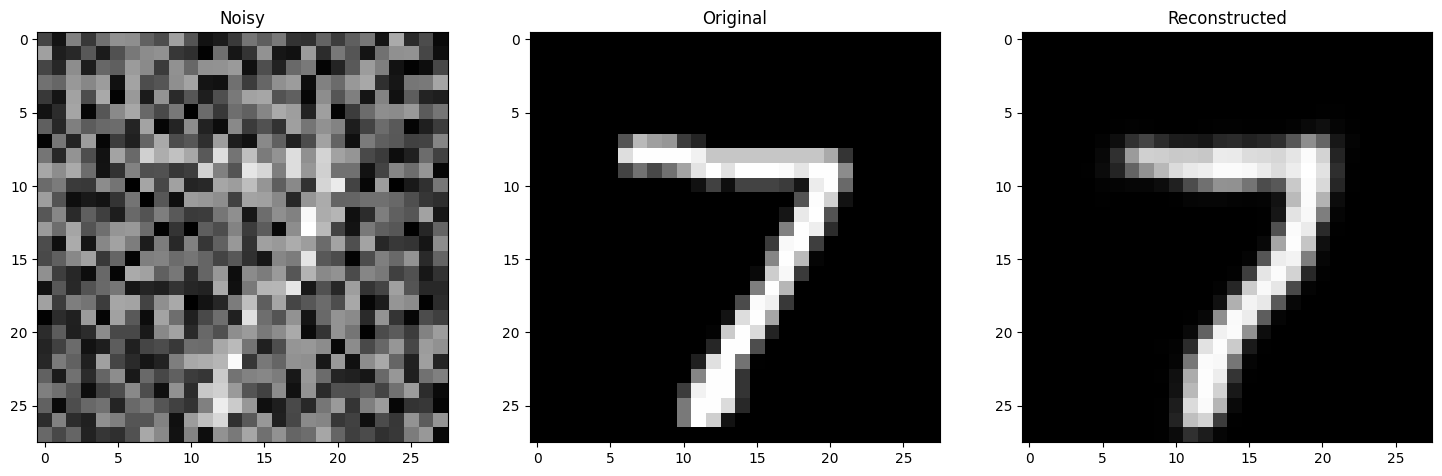

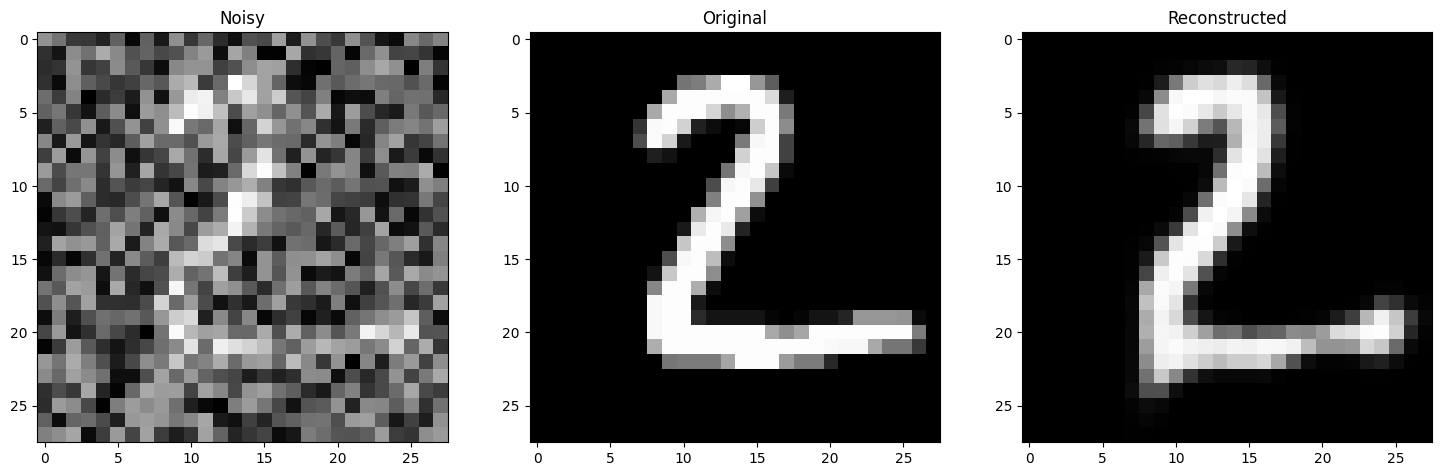

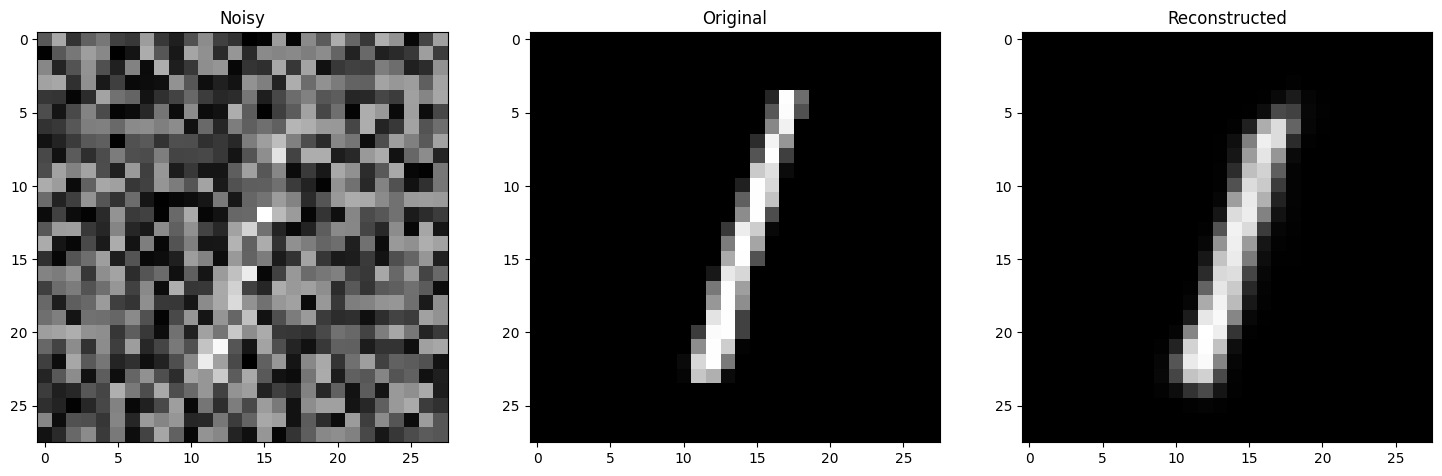

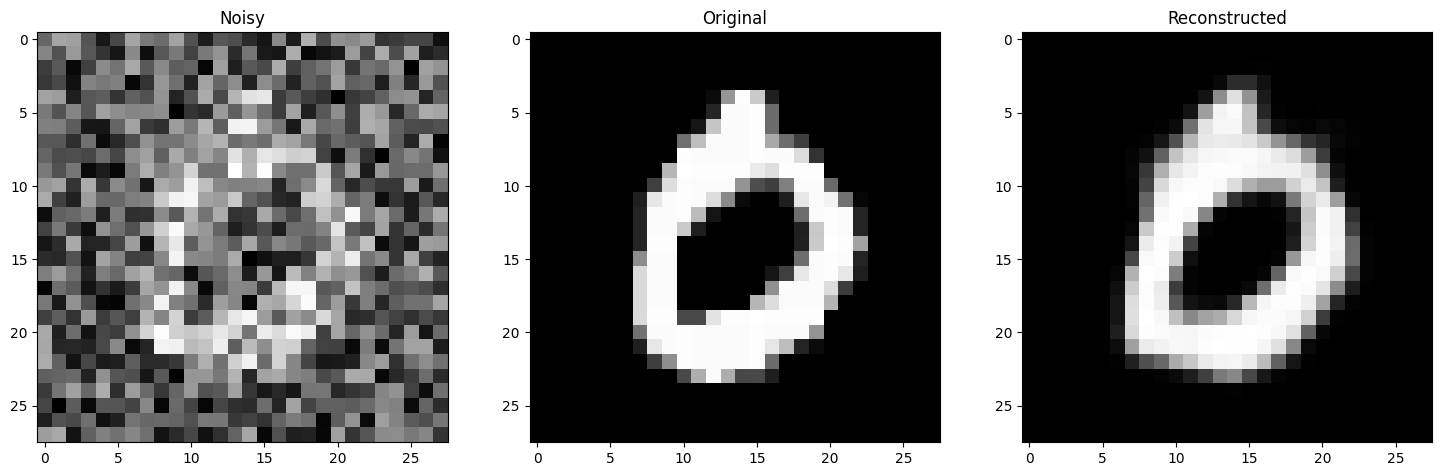

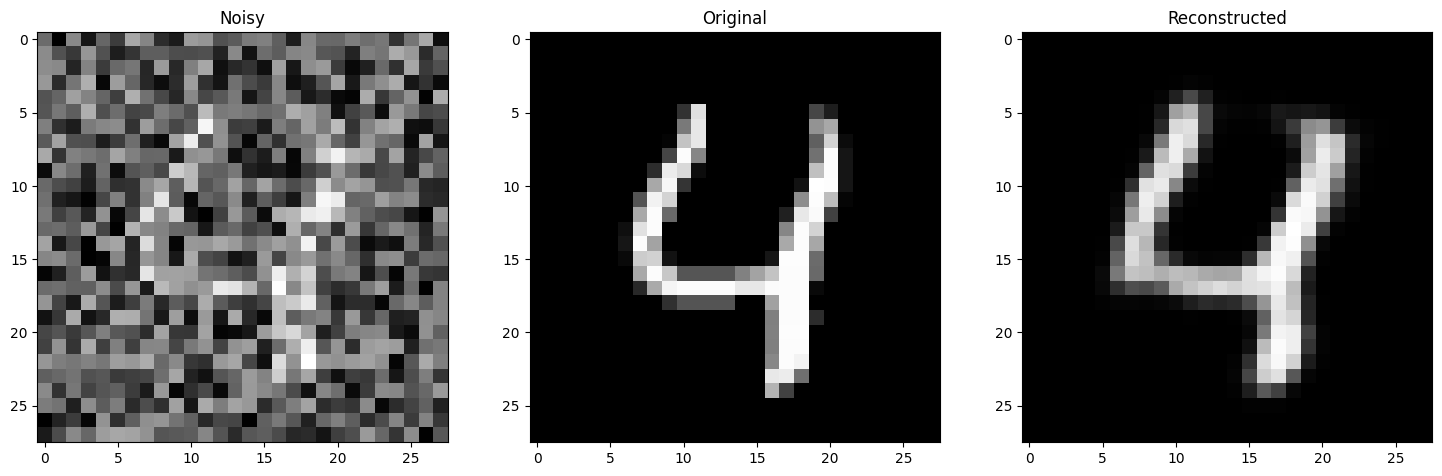

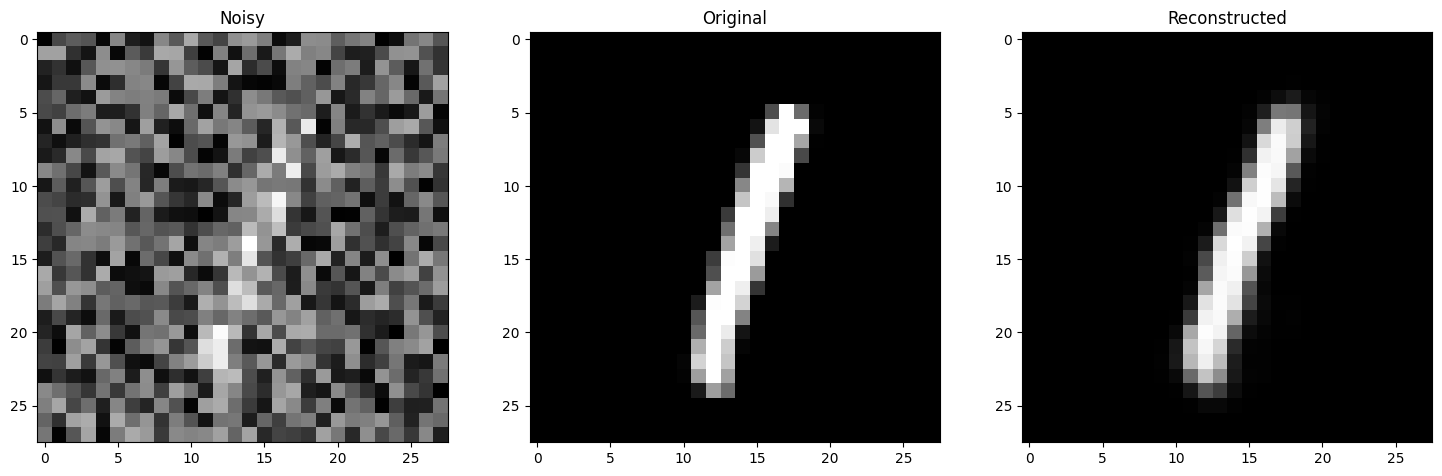

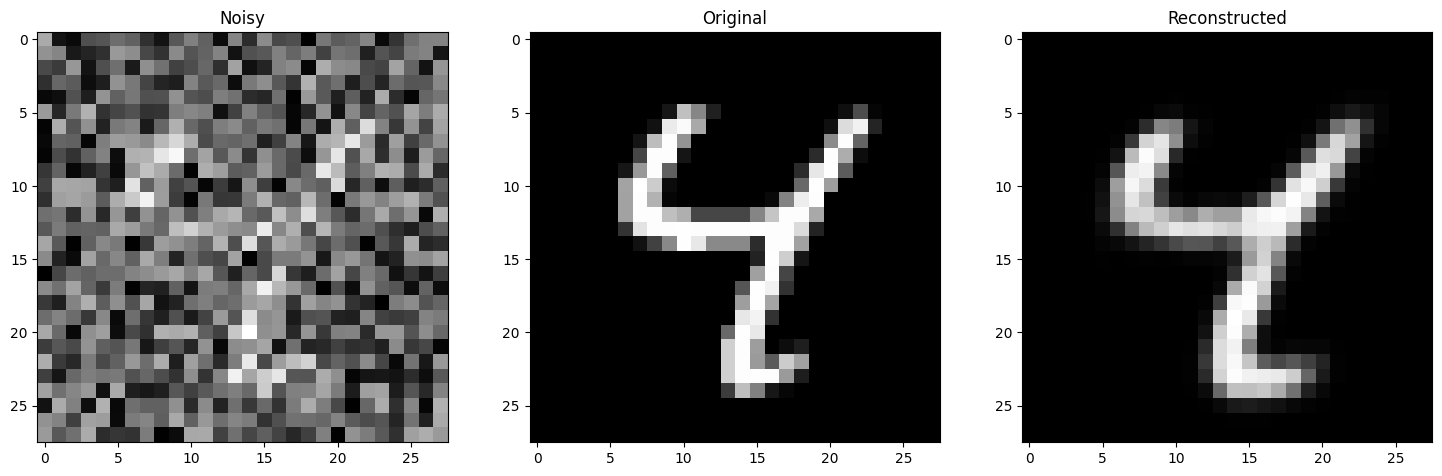

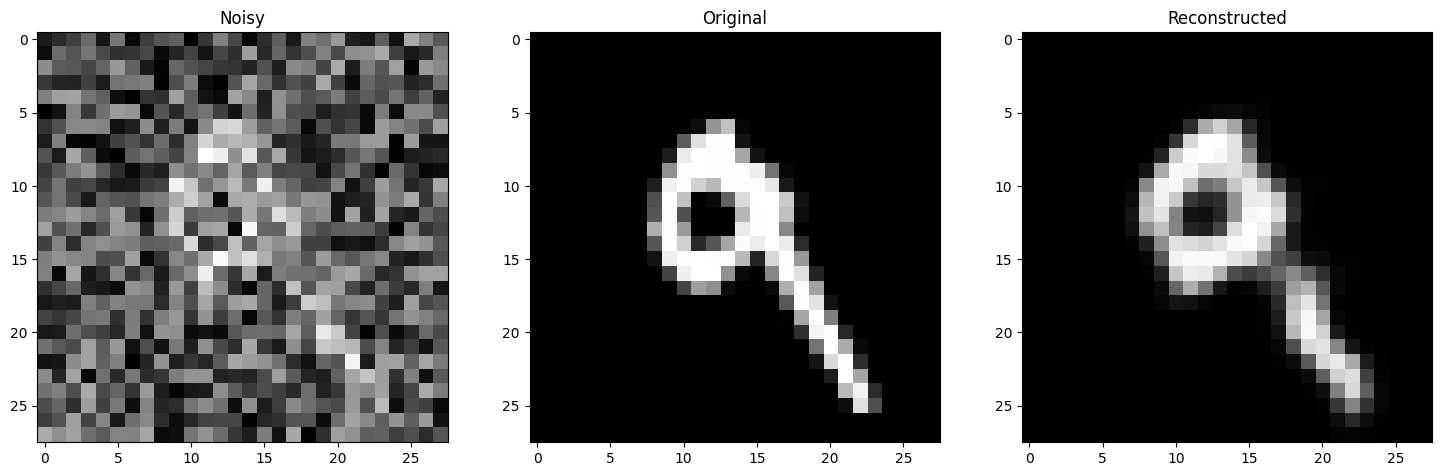

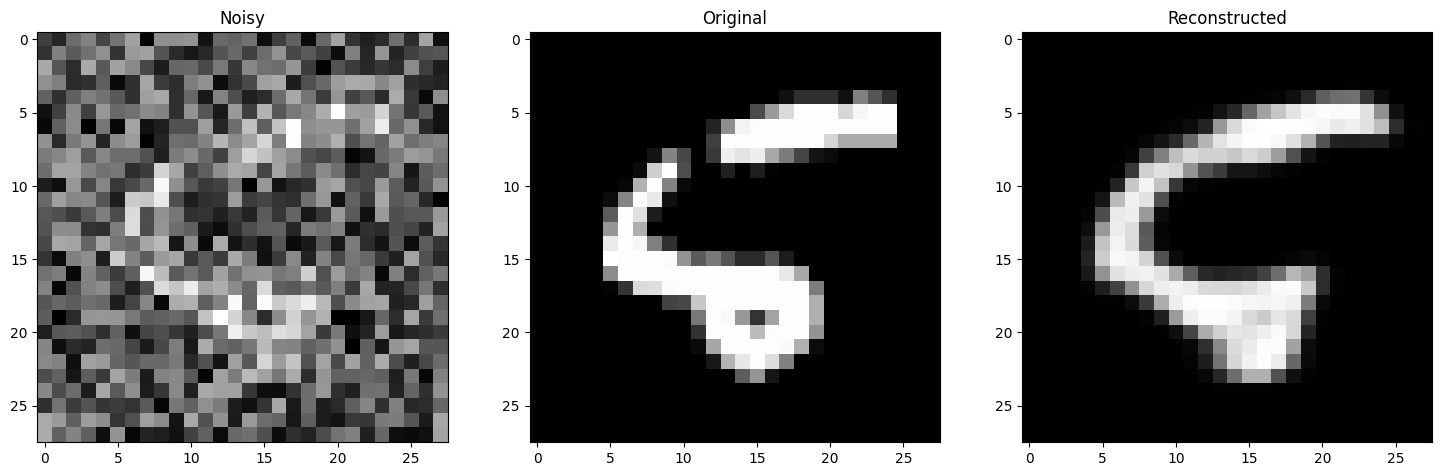

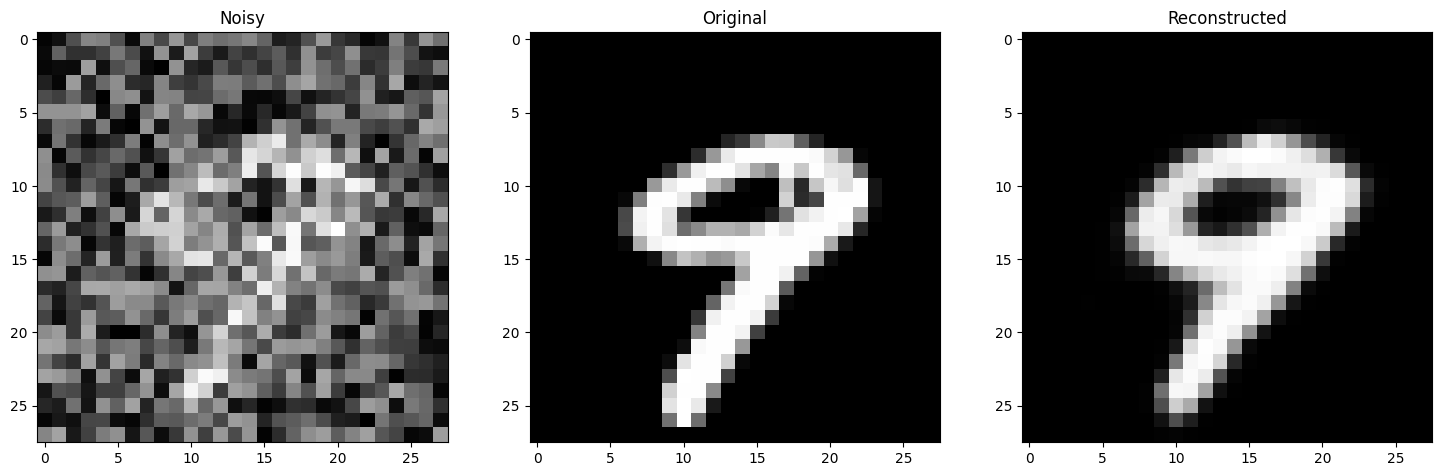

In [110]:
model.compile(loss="binary_crossentropy",
              metrics=["mean_squared_error"],
              optimizer=Adam())

early_stop = EarlyStopping(patience=5, monitor="val_loss", mode="min")

model.fit(X_train_noisy2, X_train,
          epochs=30,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stop])

for idx in range(10):
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].set_title("Noisy")
    ax[1].set_title("Original")
    ax[2].set_title("Reconstructed")
    
    ax[0].imshow(X_test_noisy2[idx].reshape(28, 28), cmap="gray")
    ax[1].imshow(X_test[idx].reshape(28, 28), cmap="gray")
    
    prediction = model.predict(X_test_noisy2[idx].reshape(1, 28, 28, 1), verbose=0)
    ax[2].imshow(prediction.reshape(28, 28), cmap="gray")


